# Script for Multi-Run Data Extraction

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('/Volumes/JanEstrada Disk/Desktop/Configurational_Entropy_Publication/data/df_aggregated_spc.csv')
df.topology.unique()

array(['4h', 'ferredoxin', 'beta_grasp', 'thio', 'fold2', 'coil', 'fold4',
       'HHH', 'EEHEE', 'EHEE', 'HEEH', 'NTF2'], dtype=object)

In [30]:
#visualize trends in data
def topology_specified_plot(topology_list_df,score_metric='clf'):
    clf_scores_names = ['Accuracy','Balanced Accuracy','AUC Score','Average Precision','F1 Score','Precision','Recall']
    rgr_scores_names = ['R-Squared','RMSE']
    
    
    #TODO: Fix it so that it only needs one input. Figure out if it is a clf or rgr from the dataframes
    
    metric_list = None
    if score_metric=='clf':
        metric_list = clf_scores_names
    elif score_metric=='rgr':
        metric_list = rgr_scores_names
    else:
        print("Invalid score metric. Choose either 'clf' or 'rgr'")
        return
        
    
    
    
    top_rs = topology_list_df[topology_list_df['model']=='RS']
    top_r = topology_list_df[topology_list_df['model']=='R']
    top_s = topology_list_df[topology_list_df['model']=='S']



    # sort dataframes for plots
    top_rs = top_rs.sort_values(by='Samples In Test',ascending=False)
    top_r = top_r.sort_values(by='Samples In Test',ascending=False)
    top_s = top_s.sort_values(by='Samples In Test',ascending=False)

    for i in range(len(metric_list)):
            sns.set_style('white')

            fig,ax = plt.subplots()

            score_rs = top_rs[metric_list[i]].values
            score_r = top_r[metric_list[i]].values
            score_s = top_s[metric_list[i]].values

            sns.set(rc={'figure.figsize':(35,15)})


            sns.barplot(x=top_rs['topology'].values,y=top_rs['Samples In Test'],ax=ax,color='white',edgecolor='black',linewidth=4)
            sns.barplot(x=top_r['topology'].values,y=top_r['Samples In Test'],ax=ax,color='white',edgecolor='black',linewidth=4)
            sns.barplot(x=top_s['topology'].values,y=top_s['Samples In Test'],ax=ax,color='white',edgecolor='black',linewidth=4)
            ax2 = ax.twinx()


            sns.pointplot(x=top_rs['topology'].values,y=score_rs,color='blue',join=False,scale=1)
            sns.pointplot(x=top_r['topology'].values,y=score_r,color='orange',join=False,scale=1)
            sns.pointplot(x=top_s['topology'].values,y=score_s,color='green',join=False,scale=1)


            ax2.legend(handles=ax2.collections, labels=["R+S","R","S"],prop={'size':'20'})


            plt.title("%s per topology"%metric_list[i],fontsize=30)
            ax.set_xlabel("Topology ",fontsize=22)
            ax.set_xticklabels(ax2.get_xticklabels(),fontsize=20)
            plt.ylabel("%s"%metric_list[i],fontsize=22)
            ax.set_ylabel("Number of samples in test group",fontsize=22)
            plt.show()
            #plt.close('all')

In [59]:
def get_count_percentiles_list(df):
    total_n_features = len(df)
    percentiles = [.65,.5,.25,.15]

    count_percentiles_list = []

    for i in range(len(percentiles)):
        #get the number of features in a given percentile
        n_percentile = round(total_n_features*percentiles[i])

        #print(n_percentile)
        #get subset of dataframe in that percentile
        df_percentile  = df.iloc[:n_percentile,:]

        #get number of entropy features in subset
        count_percentile = len(df_percentile[df_percentile['Feature'].isin(entropy_features)])

        #add it to the list
        count_percentiles_list.append(count_percentile)
    
    return count_percentiles_list

In [60]:
def check_only_one_true(lst): 
    #stolen gracefully from https://stackoverflow.com/questions/16801322/how-can-i-check-that-a-list-has-one-and-only-one-truthy-value
    true_found = False
    for v in lst:
        if v and not true_found:
            true_found=True
        elif v and true_found:
             return False #"Too Many Trues"
    return true_found

In [61]:
def overall_results(file_path, loo_run,topology_run,general_run, model_description_column):
    #check only one is true
    assert check_only_one_true([loo_run,topology_run,general_run]),"Only one of 'loo_run','topology_run', or 'general_run', can be True"
    
    
    # load the leaderboard dataframe
    leaderboard_dataframe = pd.read_html(file_path)[0]

    # make an rs, r, and s subset
    dataframe_rs = leaderboard_dataframe[leaderboard_dataframe[model_description_column]=='RS']
    dataframe_r = leaderboard_dataframe[leaderboard_dataframe[model_description_column]=='R']
    dataframe_s = leaderboard_dataframe[leaderboard_dataframe[model_description_column]=='S']


    #define variables for visualizations
    if loo_run:
        variables_name = 'Test Group'
        plotting_function = loo_plot
        plotting_input = [dataframe_rs,dataframe_r,dataframe_s]

    elif topology_run:
        variables_name = 'topology'
        plotting_function = topology_specified_plot
        plotting_input = None #TODO: make this a function that will return a topology_df_list 

    elif general_run:
        pass


    #print number of datapoints
    print("Printing number of instances per group:")
    print(dataframe_rs[variables_name].value_counts())
    print("")

    #plot function
    print("Plotting Trends:")
    plotting_function(plotting_input)
    print("")


    # Output a dataframe with the variation in each model
    

    

# CLASSIFIERS

# Leave One Out Runs

In [62]:
def loo_plot(dataframe_list):

    #visualize trends in data

    # sort dataframes for plots
    clf_rs = dataframe_list[0].sort_values(by='Samples In Test',ascending=False)
    clf_r = dataframe_list[1].sort_values(by='Samples In Test',ascending=False)
    clf_s = dataframe_list[2].sort_values(by='Samples In Test',ascending=False)

    for i in range(len(clf_scores_names)):
            sns.set_style('white')

            fig,ax = plt.subplots()

            score_rs = clf_rs[clf_scores_names[i]].values
            score_r = clf_r[clf_scores_names[i]].values
            score_s = clf_s[clf_scores_names[i]].values

            sns.set(rc={'figure.figsize':(35,15)})


            sns.barplot(x=clf_rs['Test Group'].values,y=clf_rs['Samples In Test'],ax=ax,color='.75')
            sns.barplot(x=clf_r['Test Group'].values,y=clf_r['Samples In Test'],ax=ax,color='.75')
            sns.barplot(x=clf_s['Test Group'].values,y=clf_s['Samples In Test'],ax=ax,color='.75')
            ax2 = ax.twinx()


            sns.pointplot(x=clf_rs['Test Group'].values,y=score_rs,color='blue',join=False,scale=2)
            sns.pointplot(x=clf_r['Test Group'].values,y=score_r,color='orange',join=False,scale=2)
            sns.pointplot(x=clf_s['Test Group'].values,y=score_s,color='green',join=False,scale=2)


            ax2.legend(handles=ax2.collections, labels=["R+S","R","S"],prop={'size':'20'})


            plt.title("%s per left out group"%clf_scores_names[i],fontsize=30)
            ax.set_xlabel("Topology Left Out",fontsize=22)
            ax.set_xticklabels(ax2.get_xticklabels(),rotation=90,fontsize=20)
            plt.ylabel("%s"%clf_scores_names[i],fontsize=22)
            ax.set_ylabel("Samples in Test Group",fontsize=22)
            plt.show()
            #plt.close('all')

In [63]:
clf_scores_names = ['Accuracy','Balanced Accuracy','AUC Score','Average Precision','F1 Score','Precision','Recall']
entropy_features = pd.read_csv('./entropy_features.csv').iloc[:,0].values.tolist()
rosetta_features = pd.read_csv('./rosetta_features.csv').iloc[:,0].values.tolist()

In [64]:
# specify path to leaderboard
clf_leaderboard = pd.read_html("/home/jupyter/tacc-work/model_building/estrada_runs/leave_one_out_runs/test_harness_results/loo_detailed_classification_leaderboard.html")[0]
clf_leaderboard


Leave-One-Out ID         Run ID        Date      Time  \
0      aLLBrZONPjzbo  QoQVNMq5Gq521  2019-04-05  17:49:10   
1      5oMlpyNy5aE5M  Erm95O7Z5QVb1  2019-04-09  13:59:40   
2      6WLXGgmgAAjQM  5J6yPNxyGeOEb  2019-04-09  20:43:30   
3      6qNjXJM6a78dw  QajNQmvvN3eYD  2019-04-09  15:16:13   
4      6D1vjLDVJ58AM  Ez78zaVDVvJkM  2019-04-09  20:18:21   
5      EvRz3O3Y2wEGJ  QMrXwZgQNrx2o  2019-04-05  19:45:07   
6      55B3rJP8BGm1w  EMJeNQBr3wB5A  2019-04-09  18:36:22   
7      a3ARLB5mBmOYk  662Pl5jg3pA6q  2019-04-09  19:39:35   
8      a7qRVWYG3dZ7V  amJwJ7WWm1aAR  2019-04-09  16:29:17   
9      EvVvzgq5llZYe  55EejWNErPMMG  2019-04-09  13:21:24   
10     QRyRQOADpOR7k  QRlBr29NZdR57  2019-04-09  15:09:41   
11     ERb2pX6jDzy6J  6py1mArjJgGLq  2019-04-06  21:03:56   
12     a3qGykM3GXPbo  56OAaOBkLzg7y  2019-04-09  15:43:25   
13     EWAPRMmyXGeX8  5dDQVkobvW6v8  2019-04-05  16:19:19   
14     EvLR6kb5xW6XP  EMqYvxMkvaQ61  2019-04-09  17:31:53   
15     521PYXEyNBMV5  a3gPB6dvNJ5AL  2019-04-09  14:52:47   
16     aWAZ7LNwzgxRo  59z5AJmzD5kqr  2019-04-09  15:33:04   
17     5OeXLZe8k5YV5  QP952aOW1Owvq  2019-04-09  15:26:33   
18      EaJ8gkL8z3LP   Q81GLNvym78o  2019-04-09  14:59:18   
19     aYlGympRe53vw  adqoNmgroN6jm  2019-04-06  20:38:12   
20      E2gqwwQmwBZM  Qow6Od5O9dow3  2019-04-05  15:54:28   
21     5RM6xdv7ogEkw  5p257Zwx9qRm2  2019-04-09  15:02:12   
22     6AogjdEbW77DJ  56ZD8VQ5Ybx3N  2019-04-05  04:20:59   
23      EgRYDOAMkqrM  6Wy7mQzg1VrPY  2019-04-09  14:23:52   
24     EQ91raGY6Oowz  EQkWER5bvPMxe  2019-04-09  16:04:38   
25     5MjgbLRrRldg2  5Z83YgjZQqQ95  2019-04-09  18:11:50   
26     5ZW5pYxlpE75G  5ZweWppA686d8  2019-04-09  17:07:32   
27     59rmORzNroeab  Ea9ojWW2dy2ee  2019-04-05  19:19:48   
28     5OXAozm9QxPPy  QP1OaEaAjJNLD  2019-04-09  12:56:19   
29     6DL3wkr56V9aw  amz6Z55vX5lGb  2019-04-05  03:55:04   
..               ...            ...         ...       ...   
728    EvVvzgq5llZYe  Qo53bXGJezgMD  2019-04-09  13:40:55   
729    5WV3pA7mxL8Wb  5d23RAMY9zadr  2019-04-09  13:58:15   
730    5oMlpyNy5aE5M  EaV6Va2vDkML8  2019-04-09  14:21:59   
731     EgRYDOAMkqrM  EabVJpxqwlbWP  2019-04-09  14:43:25   
732    521PYXEyNBMV5  5ZzvGBXJe1PwG  2019-04-09  14:58:40   
733     QwA8rklyzr8o  5W2ZDRoVaBEeN  2019-04-09  15:00:49   
734     EaJ8gkL8z3LP  Q6YYoqqx17OZ7  2019-04-09  15:04:31   
735    aYBEddwrWNM3R  QaLg2dgzNXDRr  2019-04-09  15:09:11   
736    QRyRQOADpOR7k  5WPvyrZ6MQg9w  2019-04-09  15:15:35   
737    6qNjXJM6a78dw  5J5B9rgNOrYmY  2019-04-09  15:21:24   
738    5RM6xdv7ogEkw  ampQyO8JjW6pB  2019-04-09  15:24:42   
739    QWJbLYmNY1Gx9  aYzbYg136JX7k  2019-04-09  15:26:04   
740    EaJMX3aW78LDY  6avJAYljGgxwO  2019-04-09  15:32:26   
741    aWAZ7LNwzgxRo  azkPoZQ2ZxmlB  2019-04-09  15:38:15   
742    QOgebjLADaoMe  a3mN3aJ6YkaMm  2019-04-09  15:42:55   
743    5OeXLZe8k5YV5  5dmEEJvO673db  2019-04-09  15:46:01   
744    67MrxMvvR5M2w  EoR5wP5a7OlRY  2019-04-09  16:03:15   
745    EQ91raGY6Oowz  559drkENMmB8G  2019-04-09  16:27:17   
746    a7qRVWYG3dZ7V  6qXVZZQ3oEW2w  2019-04-09  16:48:50   
747    6DbLAMDR9ZxR3  aWyQEaYmONvvb  2019-04-09  17:06:06   
748    5ZW5pYxlpE75G  QoDwblXvA9gBD  2019-04-09  17:30:00   
749    EvLR6kb5xW6XP  aMqY5R1lXMRlB  2019-04-09  17:52:58   
750    QRVdjNoJa8J1k  QEvqQyBqPxrkk  2019-04-09  18:10:22   
751    5MjgbLRrRldg2  QoLDRlz9wGrj7  2019-04-09  18:34:27   
752    55B3rJP8BGm1w  52XX2vPYaalA2  2019-04-09  18:55:55   
753    6gE1OBZlkyAoN  6Dwb2xOoQMZbJ  2019-04-09  19:13:23   
754    6aQrQpMY2qJXW  Ep1DGkQ3XRoqA  2019-04-09  19:37:39   
755    a3ARLB5mBmOYk  Qg2dydzwlNeAr  2019-04-09  19:59:16   
756    6ADL87G67arPY  5Rk6zla8P2drG  2019-04-09  20:16:54   
757    6D1vjLDVJ58AM  adRyopmeqZA7V  2019-04-09  20:41:36   

                       Model Name Model Author  Accuracy  Balanced Accuracy  \
0    random_forest_classification        Hamed     0.768              0.774   
1    random_forest_classification        Hamed     0.744       

In [65]:
# Notice: R+S model outperforms both other models at every metric 
clf_leaderboard[clf_leaderboard['Test Group']=="['Eva1', 'Eva2', 'fold4']"]

Leave-One-Out ID         Run ID        Date      Time  \
212    5OXAozm9QxPPy  6pPpQbOgWOMlO  2019-04-09  13:15:04   
217    5oMlpyNy5aE5M  66LdkwAdjWZbJ  2019-04-09  14:17:33   
230    aYlGympRe53vw  5rrlg78O3vlgY  2019-04-06  20:57:32   
231    5RM6xdv7ogEkw  5V2revzDYaQjY  2019-04-09  15:20:14   
270    EQ91raGY6Oowz  6axlrNV9jkLNG  2019-04-09  16:22:45   
271    6D1vjLDVJ58AM  aPAPEAz1Yvx2B  2019-04-09  20:36:55   
278    6aQrQpMY2qJXW  aM2g7djRMmaNw  2019-04-09  19:33:08   
279    5ZW5pYxlpE75G  EWERZLMMro69z  2019-04-09  17:25:32   
280    EvLR6kb5xW6XP  QEBeyaOw8WVW1  2019-04-09  17:49:05   
286    ERb2pX6jDzy6J  6aLJP1pBZJoeJ  2019-04-06  21:19:32   
288     EgRYDOAMkqrM  6gOlebzYzeAoN  2019-04-09  14:39:28   
289    6DL3wkr56V9aw  6gjp69Gxjo2zJ  2019-04-05  04:14:30   
290    55B3rJP8BGm1w  QOkAYGRBy1g2q  2019-04-09  18:52:02   
295    EvVvzgq5llZYe  6DBdr6pX3Wgjw  2019-04-09  13:37:06   
296    a7qRVWYG3dZ7V  aYwvmEpq1ppDm  2019-04-09  16:44:58   
302    5OeXLZe8k5YV5   6PomB2pvgyDl  2019-04-09  15:42:09   
306    5MjgbLRrRldg2  QRwBOWoBN88X1  2019-04-09  18:30:00   
307    a3ARLB5mBmOYk  ERpYQPJgG5RpJ  2019-04-09  19:55:22   
308    6AogjdEbW77DJ  6l61Gz7PQBRyl  2019-04-05  04:37:59   
529    QaOpDVqe8XzqP  aPYpbyPwEMAW6  2019-04-06  21:37:44   
545    67MrxMvvR5M2w  5de1d57LrGx2M  2019-04-09  16:00:10   
546    6gE1OBZlkyAoN  aLZRyRzJjAEa6  2019-04-09  19:10:14   
555    QMXW1AWaA6r69  52axj5p3LZpwG  2019-04-05  04:56:08   
562    6DbLAMDR9ZxR3  EMz7aPqAgrzoM  2019-04-09  17:03:03   
568    QRVdjNoJa8J1k  aMyEB7dNGYMwd  2019-04-09  18:07:17   
570    6ADL87G67arPY  aA5Ma3vl5MLlB  2019-04-09  20:13:40   
571     QwA8rklyzr8o  aYyBzgkOBJBab  2019-04-09  14:57:43   
588    5WV3pA7mxL8Wb  EYdYXmkkZdpLP  2019-04-09  13:55:11   

                       Model Name Model Author  Accuracy  Balanced Accuracy  \
212  random_forest_classification        Hamed     0.929              0.551   
217  random_forest_classification        Hamed     0.933              0.579   
230  random_forest_classification        Hamed     0.929              0.551   
231  random_forest_classification        Hamed     0.933              0.579   
270  random_forest_classification        Hamed     0.933              0.579   
271  random_forest_classification        Hamed     0.929              0.551   
278  random_forest_classification        Hamed     0.929              0.551   
279  random_forest_classification        Hamed     0.929              0.551   
280  random_forest_classification        Hamed     0.929              0.551   
286  random_forest_classification        Hamed     0.929              0.551   
288  random_forest_classification        Hamed     0.929              0.551   
289  random_forest_classification        Hamed     0.933              0.579   
290  random_forest_classification        Hamed     0.933              0.579   
295  random_forest_classification        Hamed     0.933              0.579   
296  random_forest_classification        Hamed     0.929              0.551   
302  random_forest_classification        Hamed     0.929              0.551   
306  random_forest_classification        Hamed     0.929              0.551   
307  random_forest_classification        Hamed     0.929              0.551   
308  random_forest_classification        Hamed     0.929              0.551   
529  random_forest_classification        Hamed     0.929              0.500   
545  random_forest_classification        Hamed     0.929              0.500   
546  random_forest_classification        Hamed     0.929              0.500   
555  random_forest_classification        Hamed     0.929              0.500   
562  random_forest_classification        Hamed     0.929              0.500   
568  random_forest_classification        Hamed     0.929              0.500   
570  random_forest_classification        Hamed     0.929              0.500   
571  random_forest_classification        Hamed     0.929              0.500   
588  random_forest_cla

In [66]:
# create a dataframe that contains R+S data
clf_rs = clf_leaderboard[clf_leaderboard['Data and Split Description']=='RS']
clf_rs

Leave-One-Out ID         Run ID        Date      Time  \
1      5oMlpyNy5aE5M  Erm95O7Z5QVb1  2019-04-09  13:59:40   
4      6D1vjLDVJ58AM  Ez78zaVDVvJkM  2019-04-09  20:18:21   
10     QRyRQOADpOR7k  QRlBr29NZdR57  2019-04-09  15:09:41   
12     a3qGykM3GXPbo  56OAaOBkLzg7y  2019-04-09  15:43:25   
15     521PYXEyNBMV5  a3gPB6dvNJ5AL  2019-04-09  14:52:47   
19     aYlGympRe53vw  adqoNmgroN6jm  2019-04-06  20:38:12   
20      E2gqwwQmwBZM  Qow6Od5O9dow3  2019-04-05  15:54:28   
21     5RM6xdv7ogEkw  5p257Zwx9qRm2  2019-04-09  15:02:12   
24     EQ91raGY6Oowz  EQkWER5bvPMxe  2019-04-09  16:04:38   
25     5MjgbLRrRldg2  5Z83YgjZQqQ95  2019-04-09  18:11:50   
26     5ZW5pYxlpE75G  5ZweWppA686d8  2019-04-09  17:07:32   
27     59rmORzNroeab  Ea9ojWW2dy2ee  2019-04-05  19:19:48   
28     5OXAozm9QxPPy  QP1OaEaAjJNLD  2019-04-09  12:56:19   
29     6DL3wkr56V9aw  amz6Z55vX5lGb  2019-04-05  03:55:04   
30     Q9kZBq2WwJwjr  E6d7JomOZGWk8  2019-04-05  17:24:33   
31     6aQrQpMY2qJXW  QEvAg7Xjvo3Wo  2019-04-09  19:14:47   
32     EaJMX3aW78LDY  6Oayw1WOlNBXw  2019-04-09  15:26:34   
35     aYlGympRe53vw  QWGgLE61zRebe  2019-04-06  20:40:06   
38     6D1vjLDVJ58AM  Ee9D9GMeVEZJe  2019-04-09  20:19:57   
39     6aQrQpMY2qJXW  Qg8O8leBbJEB9  2019-04-09  19:16:21   
40     521PYXEyNBMV5  Qzo7qpR5P2j7k  2019-04-09  14:53:11   
41     QRyRQOADpOR7k  a7Zdgk5krPDXw  2019-04-09  15:10:06   
42     Q9kZBq2WwJwjr  ad533LbOpv29L  2019-04-05  17:26:09   
45     5oMlpyNy5aE5M  5Ze2zo1XdQzEb  2019-04-09  14:01:15   
46     EaJMX3aW78LDY  QgMAv9gGDZ9pq  2019-04-09  15:26:58   
48     5ZW5pYxlpE75G  QWVpRpqkMy8R3  2019-04-09  17:09:04   
49     59rmORzNroeab   Q1oQaerlqW1k  2019-04-05  19:21:34   
50     5OXAozm9QxPPy  52Yo7AO7kQ75G  2019-04-09  12:57:54   
51     5RM6xdv7ogEkw  5oQOrp3EMGj9w  2019-04-09  15:03:46   
52     EQ91raGY6Oowz  5R5END3lqPpWr  2019-04-09  16:06:13   
..               ...            ...         ...       ...   
609    Q9kZBq2WwJwjr  6qWbrNg1pOA7N  2019-04-05  17:29:11   
610     E2gqwwQmwBZM  597WDJNYZEk2M  2019-04-05  15:59:09   
613    5MjgbLRrRldg2  6lZwYoJgQ5W2w  2019-04-09  18:16:34   
616    5oMlpyNy5aE5M  6qVrYvdARZeEN  2019-04-09  14:04:17   
617    QRyRQOADpOR7k  QyPXzzrXRgDw3  2019-04-09  15:10:54   
618    59rmORzNroeab  6pkON2EkvpBLY  2019-04-05  19:24:38   
620    6D1vjLDVJ58AM  aMR5LlLMwrRz6  2019-04-09  20:23:07   
621    6aQrQpMY2qJXW  6qrOZ15LNyVOO  2019-04-09  19:19:22   
626    EQ91raGY6Oowz  Q6pqo3Jgqxlg1  2019-04-09  16:09:13   
628    EaJMX3aW78LDY   6wPo2lmlmQBl  2019-04-09  15:27:46   
629    a3qGykM3GXPbo  abx2M7RRYRavb  2019-04-09  15:44:37   
630    5OXAozm9QxPPy  QOW9RoxGdlBrP  2019-04-09  13:00:59   
634    5RM6xdv7ogEkw  52ybz2Xe37zZ2  2019-04-09  15:06:48   
638    6DL3wkr56V9aw  abewa3ORQ2Gwo  2019-04-05  04:00:29   
712    6DL3wkr56V9aw  6dQBbPrMXAZDl  2019-04-05  04:19:07   
715     E2gqwwQmwBZM  QMpZMdeBY6R57  2019-04-05  16:17:24   
718    Q9kZBq2WwJwjr  QP7kLOjqWDLO9  2019-04-05  17:47:16   
721    59rmORzNroeab   5GvXgB9bMRoY  2019-04-05  19:43:10   
724    aYlGympRe53vw  aPQ5V3o1BylpR  2019-04-06  21:02:02   
727    5OXAozm9QxPPy  QoDBzLMAPWm6e  2019-04-09  13:19:28   
730    5oMlpyNy5aE5M  EaV6Va2vDkML8  2019-04-09  14:21:59   
732    521PYXEyNBMV5  5ZzvGBXJe1PwG  2019-04-09  14:58:40   
736    QRyRQOADpOR7k  5WPvyrZ6MQg9w  2019-04-09  15:15:35   
738    5RM6xdv7ogEkw  ampQyO8JjW6pB  2019-04-09  15:24:42   
740    EaJMX3aW78LDY  6avJAYljGgxwO  2019-04-09  15:32:26   
745    EQ91raGY6Oowz  559drkENMmB8G  2019-04-09  16:27:17   
748    5ZW5pYxlpE75G  QoDwblXvA9gBD  2019-04-09  17:30:00   
751    5MjgbLRrRldg2  QoLDRlz9wGrj7  2019-04-09  18:34:27   
754    6aQrQpMY2qJXW  Ep1DGkQ3XRoqA  2019-04-09  19:37:39   
757    6D1vjLDVJ58AM  adRyopmeqZA7V  2019-04-09  20:41:36   

                       Model Name Model Author  Accuracy  Balanced Accuracy  \
1    random_forest_classification        Hamed     0.744              0.755   
4    random_forest_classification        Hamed     0.729       

In [67]:
# create a dataframe that contains R data
clf_r = clf_leaderboard[clf_leaderboard['Data and Split Description']=='R']

In [68]:
# create a dataframe that contains S data
clf_s = clf_leaderboard[clf_leaderboard['Data and Split Description']=='S']

Printing number of instances per group:
['Rocklin', 'HEEH']                 17
['Longxing', 'EEHEE']               17
['Rocklin', 'EEHEE']                17
['Rocklin', 'HHH']                  17
['Rocklin', 'EHEE']                 17
['Longxing', 'HEEH']                17
['Longxing', 'EHEE']                17
['181114_Benjamin_NTF2', 'NTF2']    16
['Eva1', 'Eva2', 'thio']            10
['Eva1', 'Eva2', '4h']              10
['Eva1', 'Eva2', 'fold2']           10
['Eva1', 'Eva2', 'beta_grasp']      10
['Eva1', 'Eva2', 'coil']            10
['Eva1', 'Eva2', 'ferredoxin']      10
['Eva1', 'Eva2', 'fold4']           10
['Inna', 'Eva1', 'Eva2', 'HHH']      9
['Eva2', 'Eva1', '4h']               7
['Eva2', 'Eva1', 'ferredoxin']       7
['Eva2', 'Eva1', 'coil']             7
['Eva2', 'Eva1', 'beta_grasp']       7
['Eva2', 'Eva1', 'thio']             7
['Eva2', 'Eva1', 'fold4']            7
['Eva2', 'Eva1', 'fold2']            7
['Eva2', 'Eva1', 'Inna', 'HHH']      5
['Eva1', 'Inna', 'Eva2',

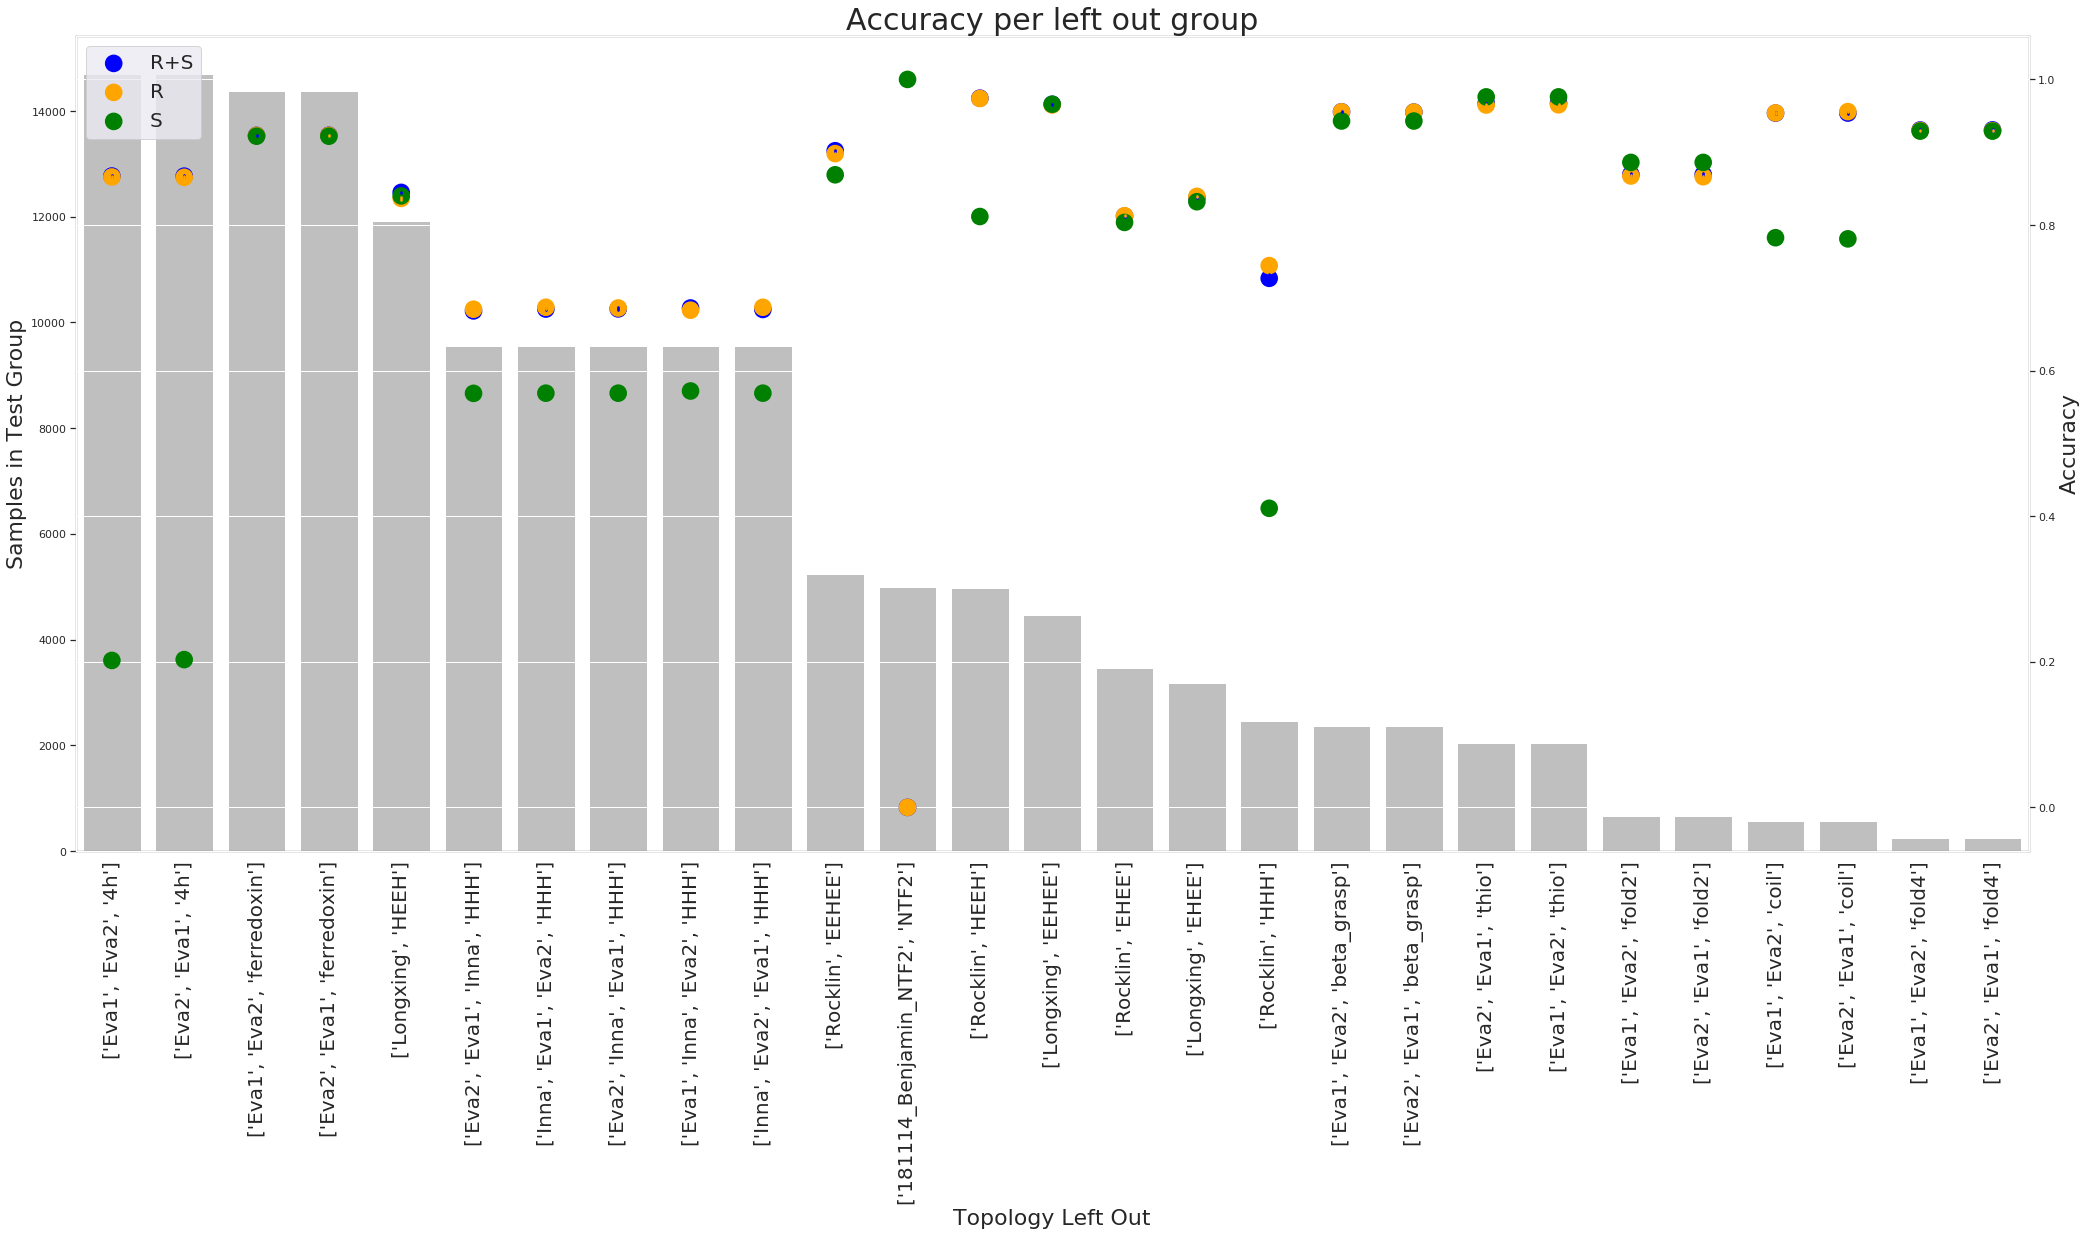

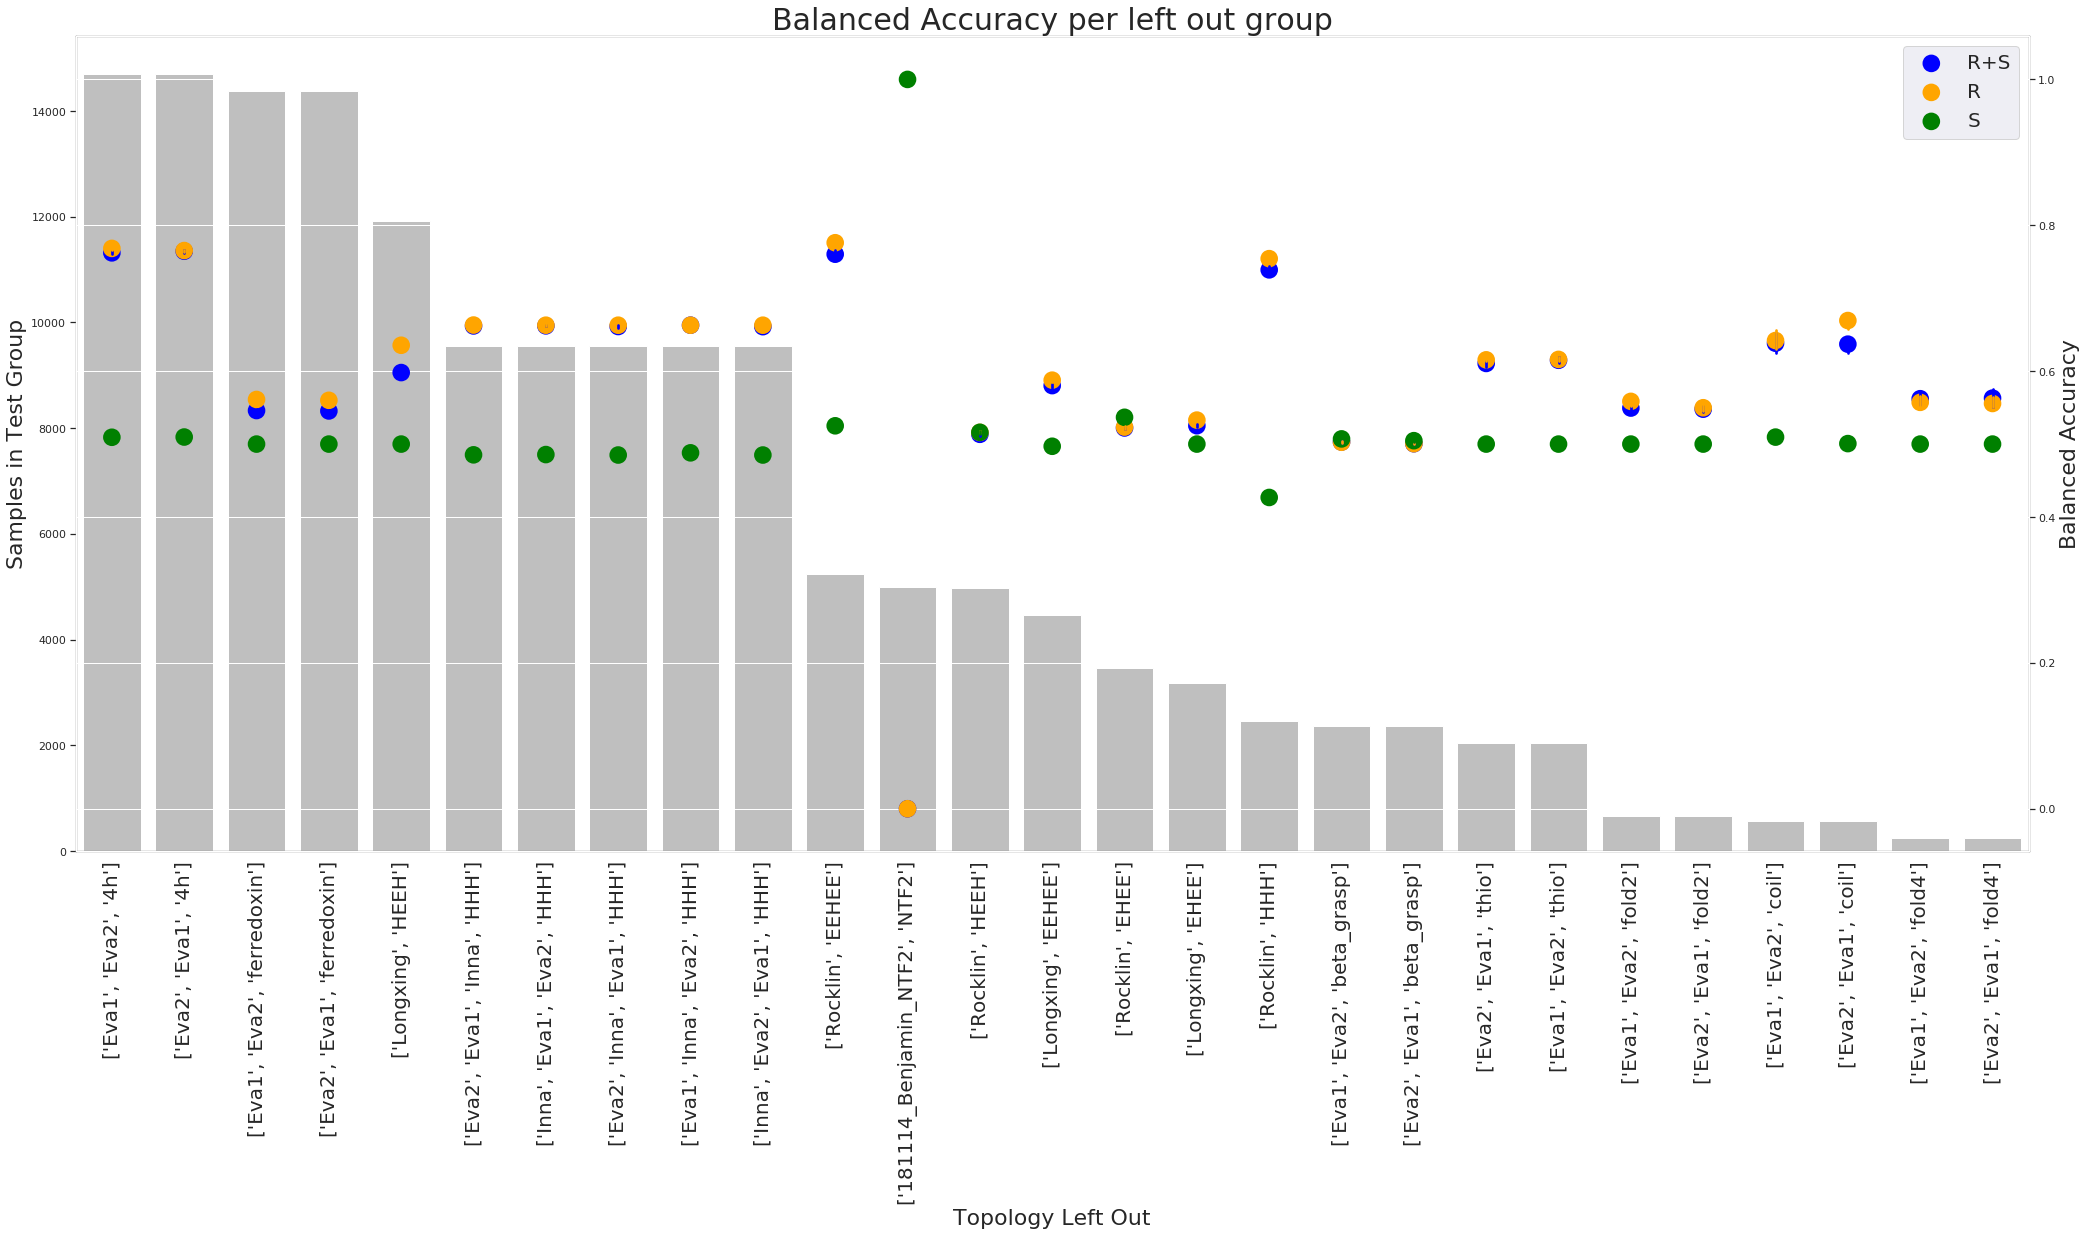

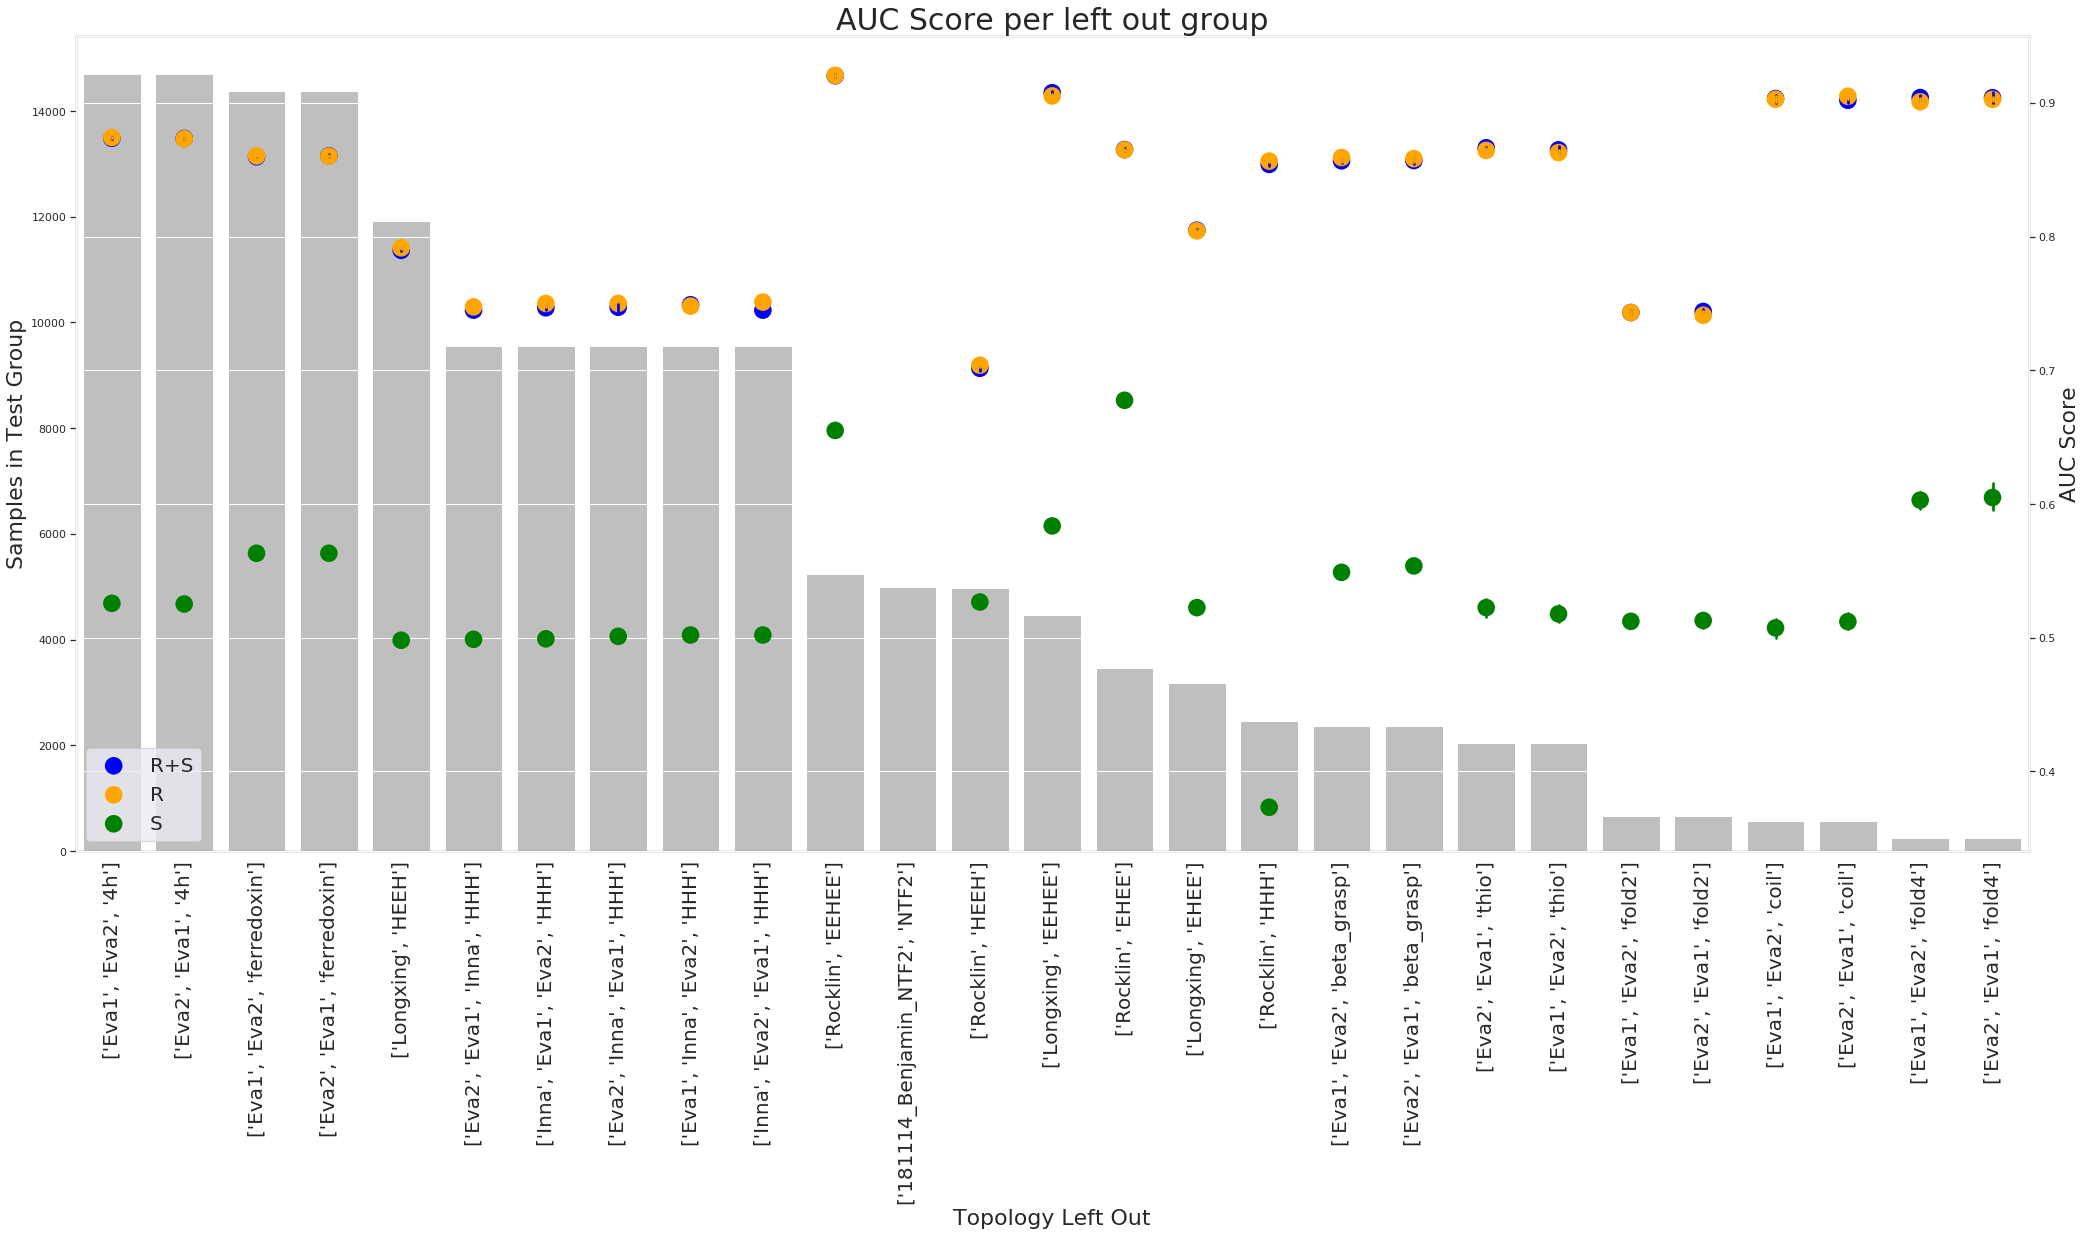

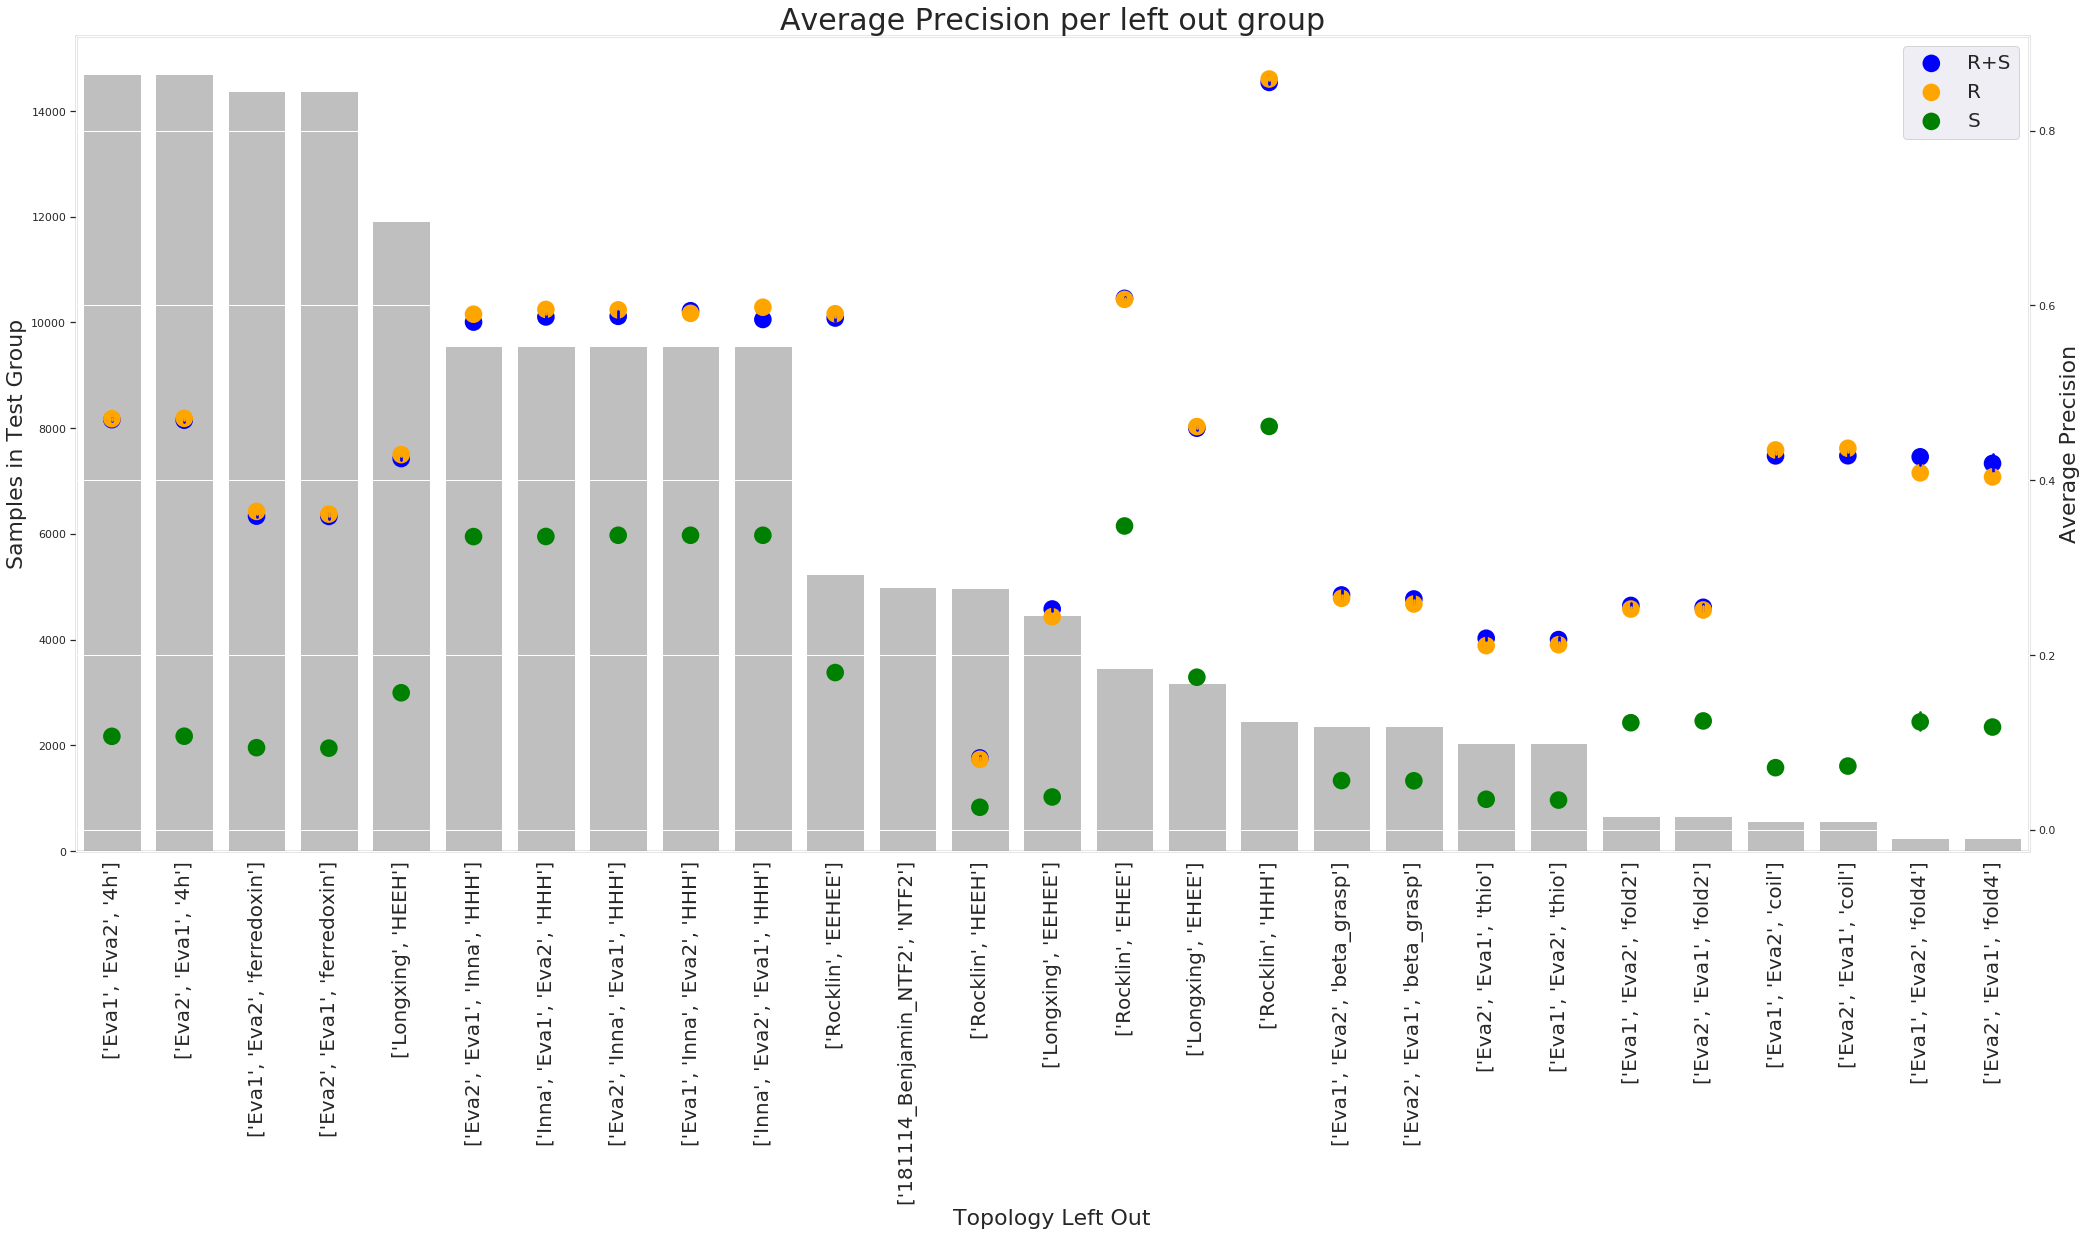

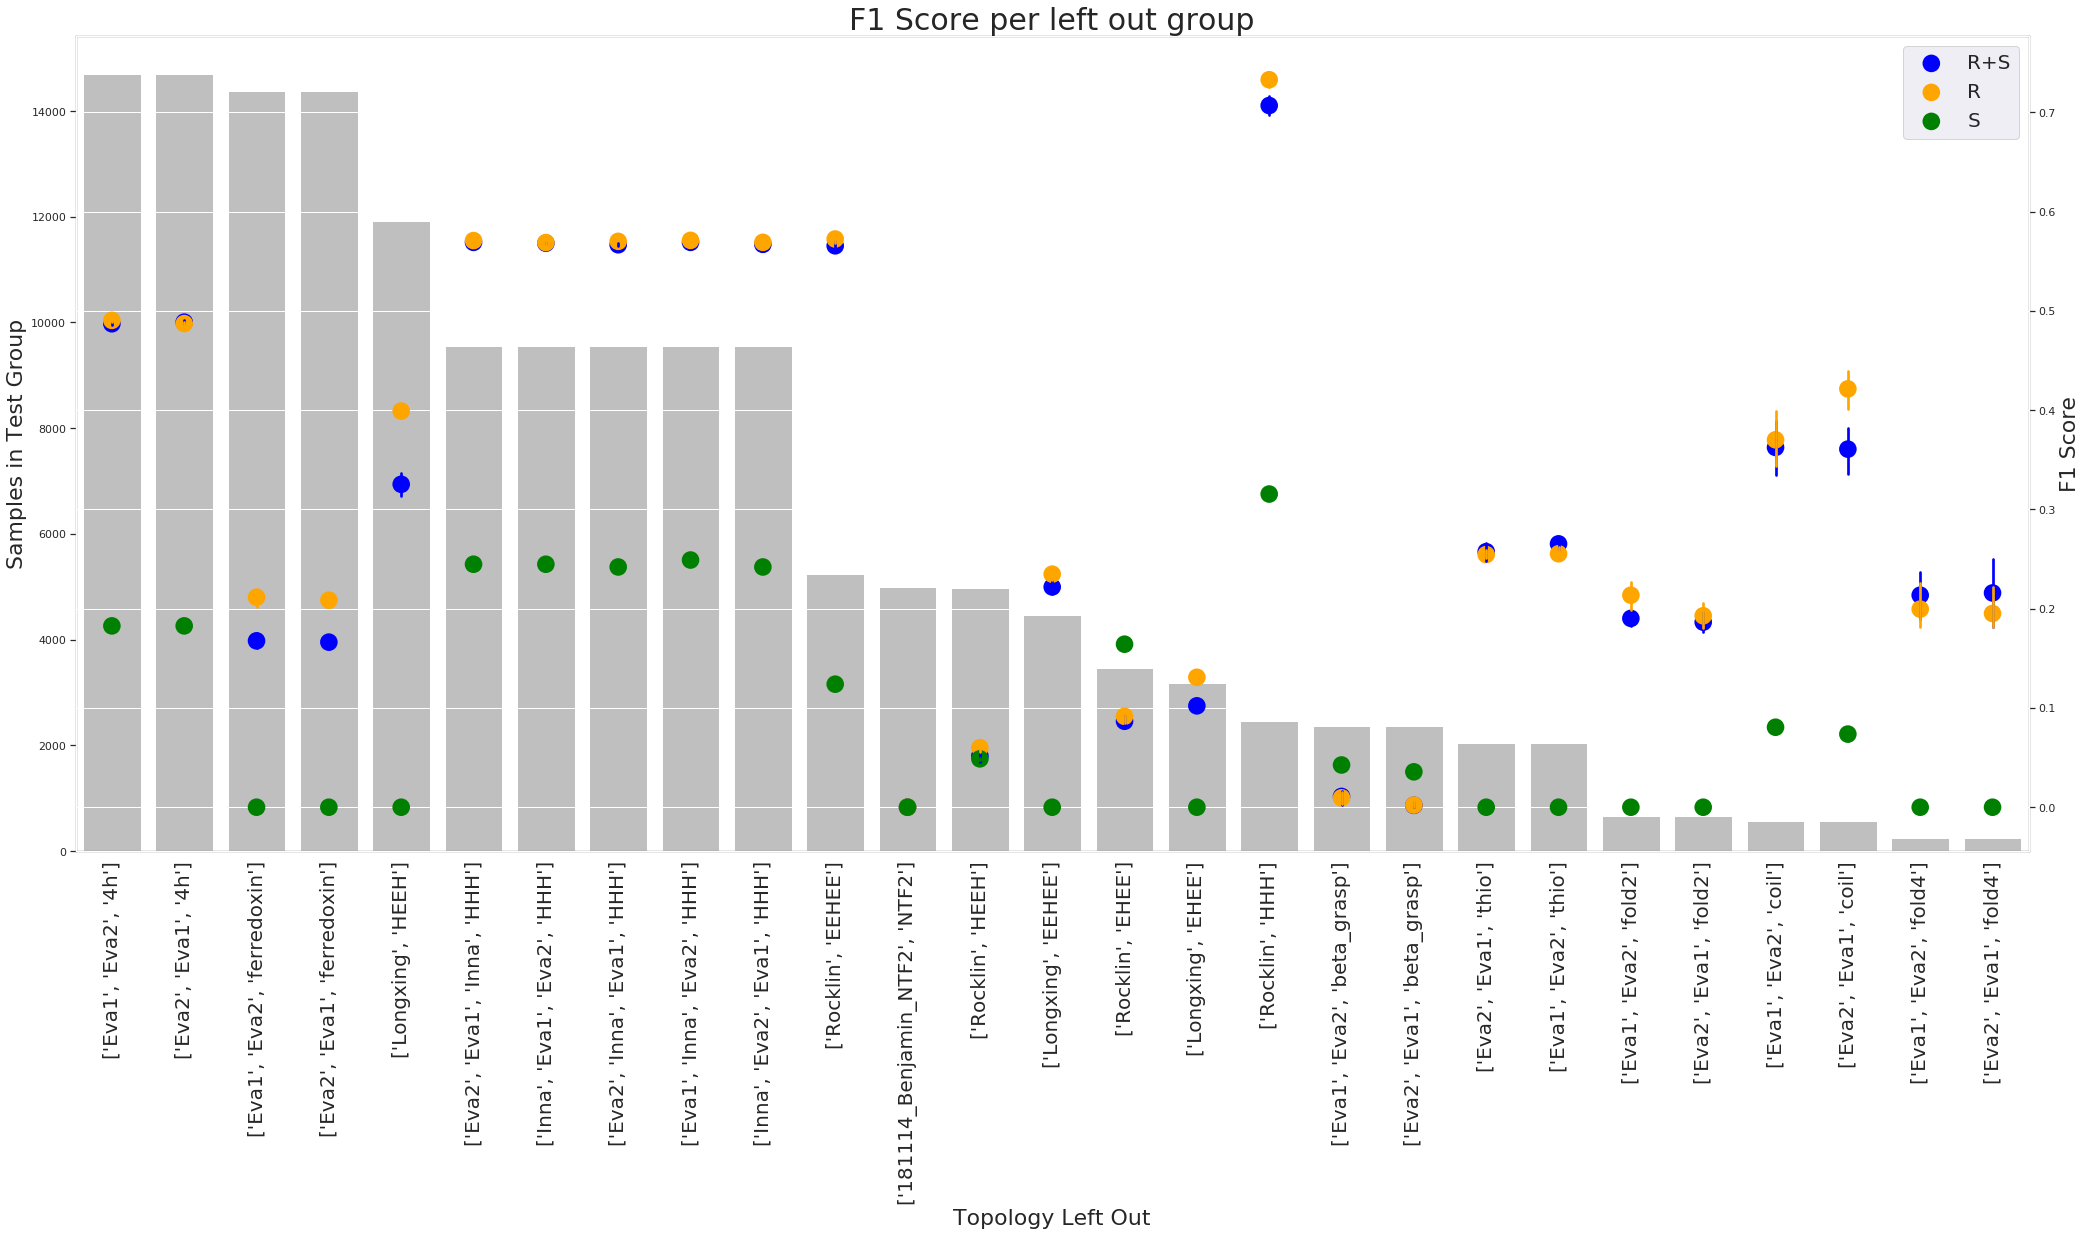

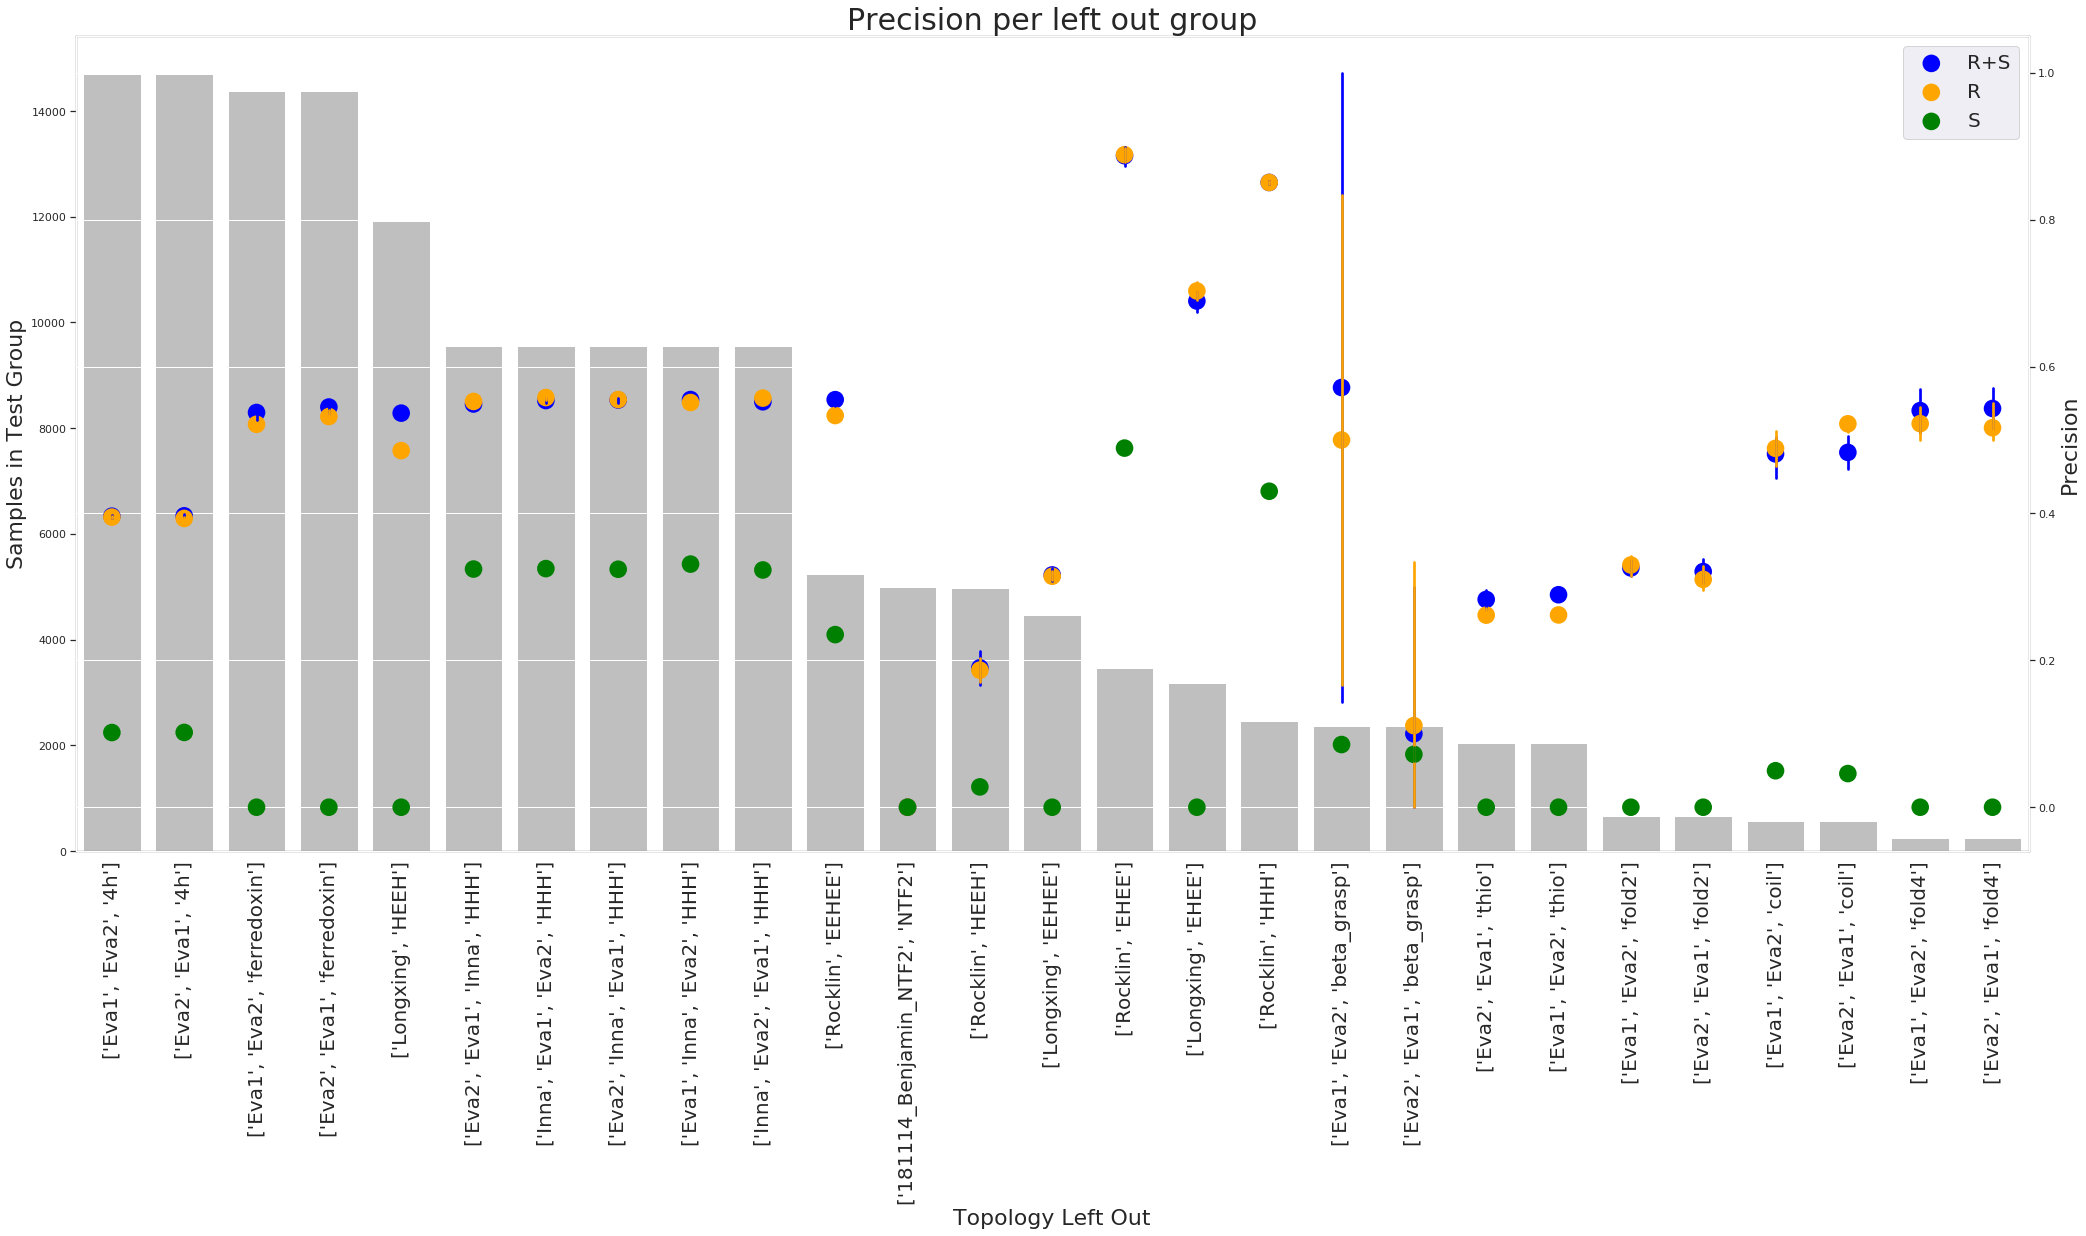

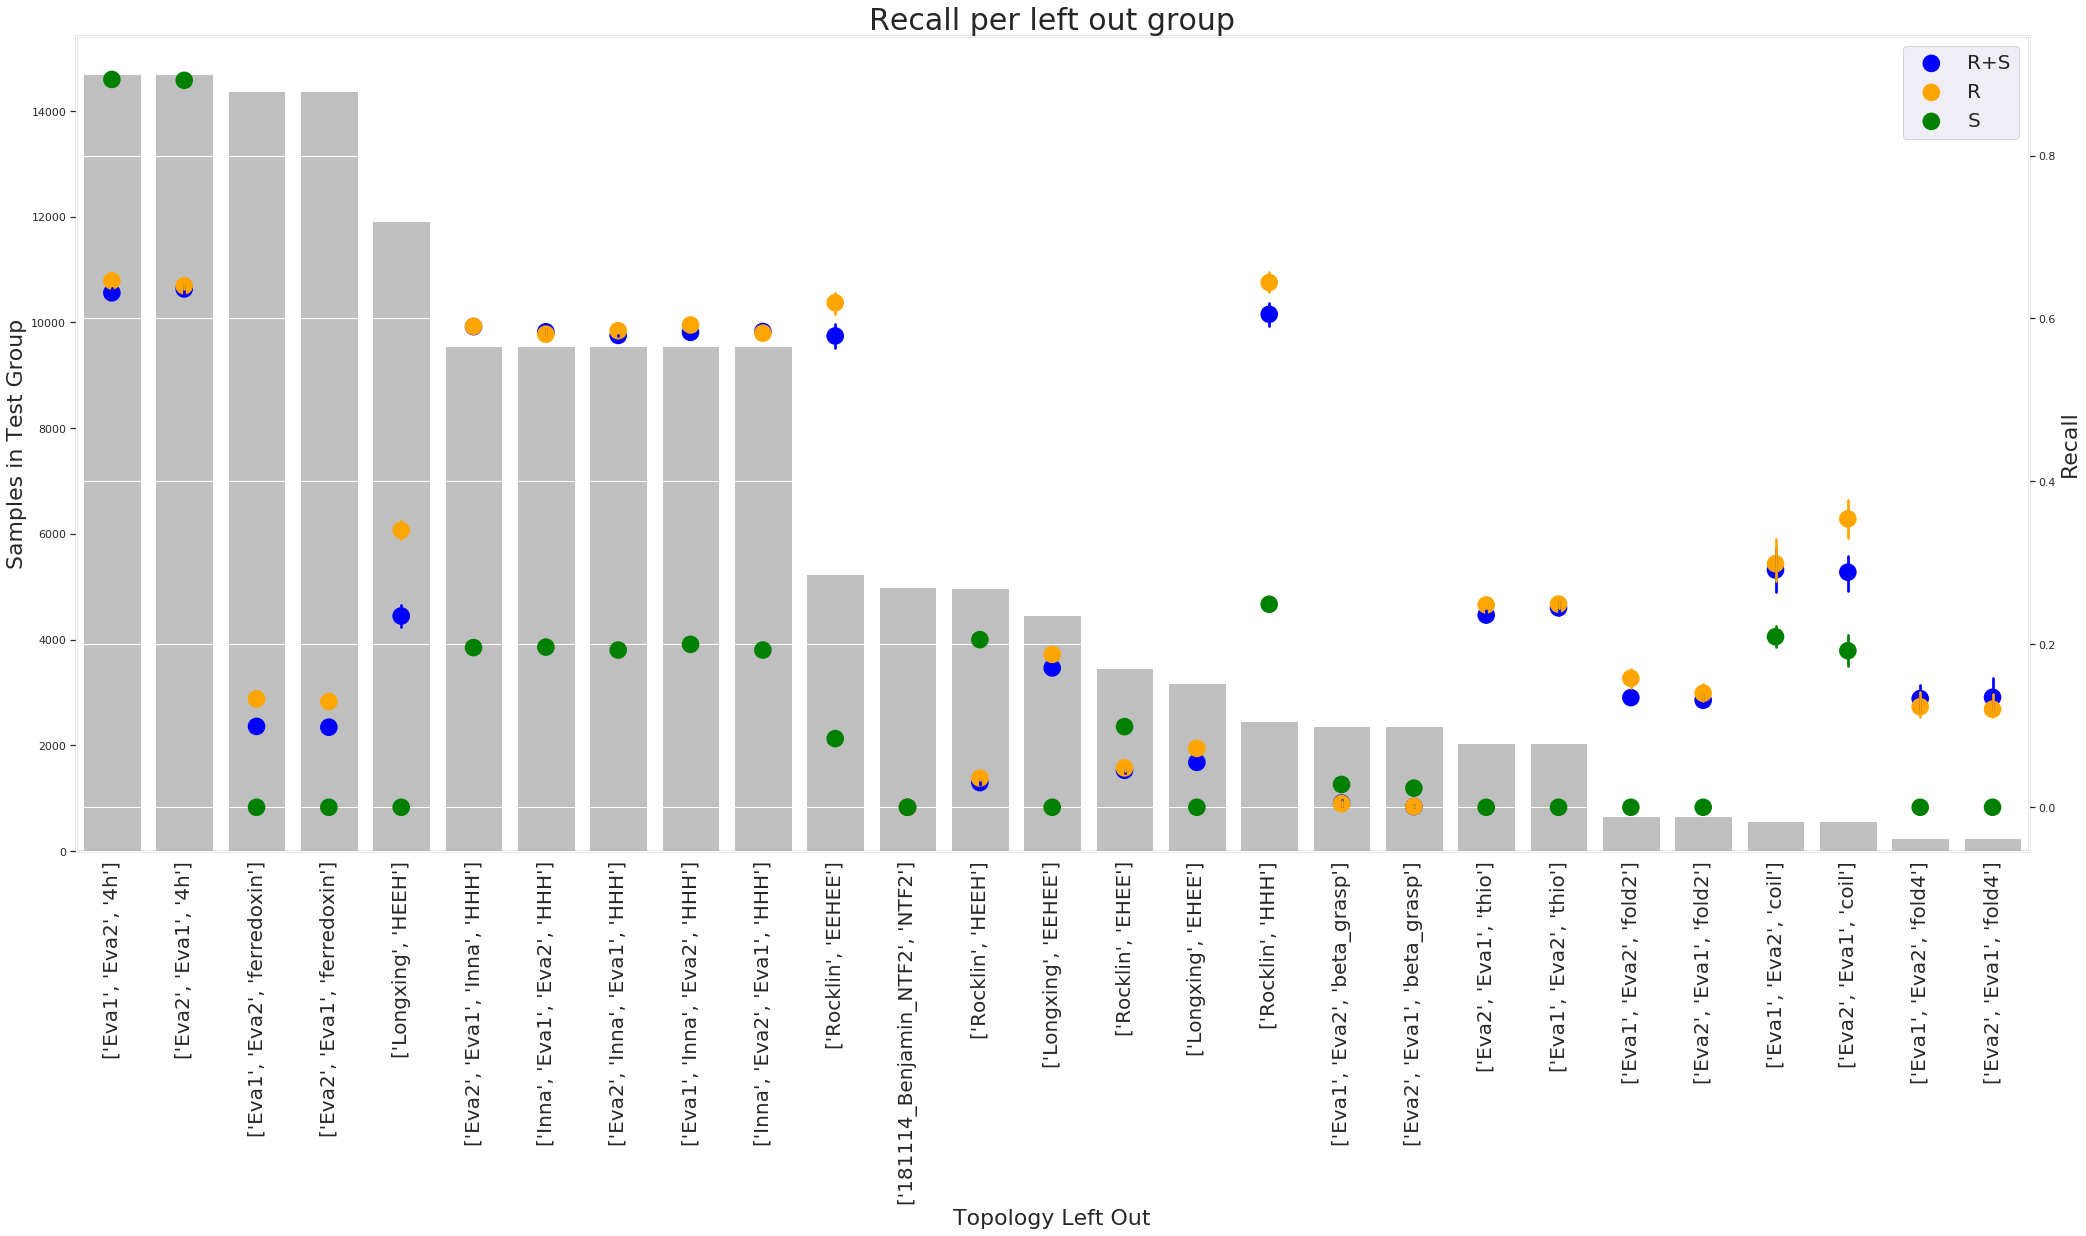

In [69]:
overall_results(
    file_path="/home/jupyter/tacc-work/model_building/estrada_runs/leave_one_out_runs/test_harness_results/loo_detailed_classification_leaderboard.html",
    loo_run=True,
    topology_run=False,
    general_run=False,
    model_description_column='Data and Split Description'
               )

# Summary Plots of Metric Performance per Model

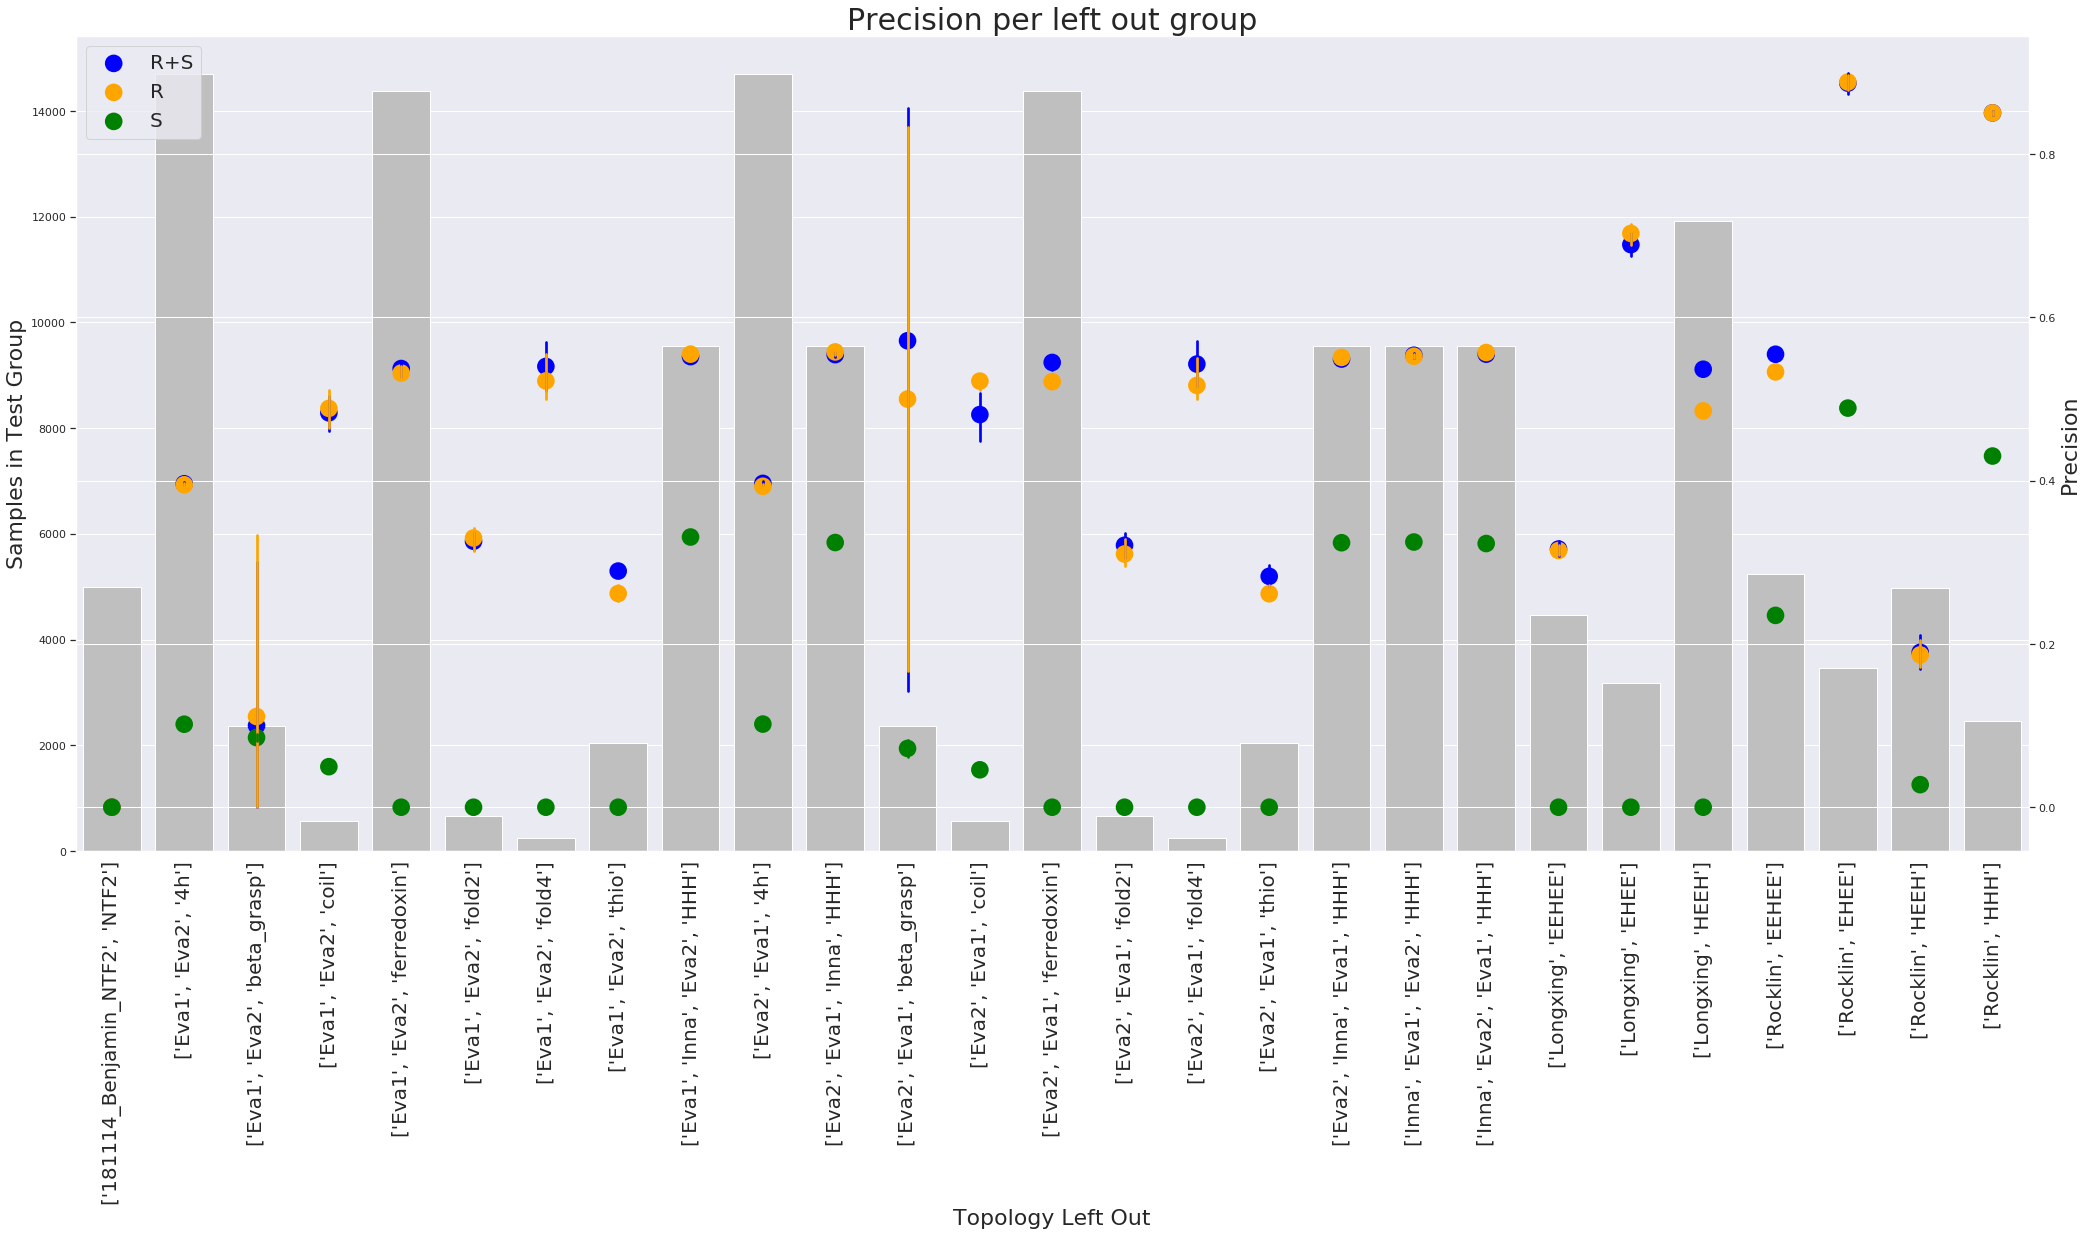

In [70]:
clf_rs = clf_rs.sort_values(by='Test Group')
clf_r = clf_r.sort_values(by='Test Group')
clf_s = clf_s.sort_values(by='Test Group')

i= 5

sns.set_style('white')
sns.set(rc={'figure.figsize':(35,15)})


fig,ax = plt.subplots()

score_rs = clf_rs[clf_scores_names[i]].values
score_r = clf_r[clf_scores_names[i]].values
score_s = clf_s[clf_scores_names[i]].values

sns.set(rc={'figure.figsize':(35,15)})


sns.barplot(x=clf_rs['Test Group'].values,y=clf_rs['Samples In Test'],ax=ax,color='.75')
sns.barplot(x=clf_r['Test Group'].values,y=clf_r['Samples In Test'],ax=ax,color='.75')
sns.barplot(x=clf_s['Test Group'].values,y=clf_s['Samples In Test'],ax=ax,color='.75')
ax2 = ax.twinx()


sns.pointplot(x=clf_rs['Test Group'].values,y=score_rs,color='blue',join=False,scale=2)
sns.pointplot(x=clf_r['Test Group'].values,y=score_r,color='orange',join=False,scale=2)
sns.pointplot(x=clf_s['Test Group'].values,y=score_s,color='green',join=False,scale=2)


ax2.legend(handles=ax2.collections, labels=["R+S","R","S"],prop={'size':'20'})


plt.title("%s per left out group"%clf_scores_names[i],fontsize=30)
ax.set_xlabel("Topology Left Out",fontsize=22)
ax.set_xticklabels(ax2.get_xticklabels(),rotation=90,fontsize=20)
plt.ylabel("%s"%clf_scores_names[i],fontsize=22)
ax.set_ylabel("Samples in Test Group",fontsize=22)
plt.show()
plt.close('all')

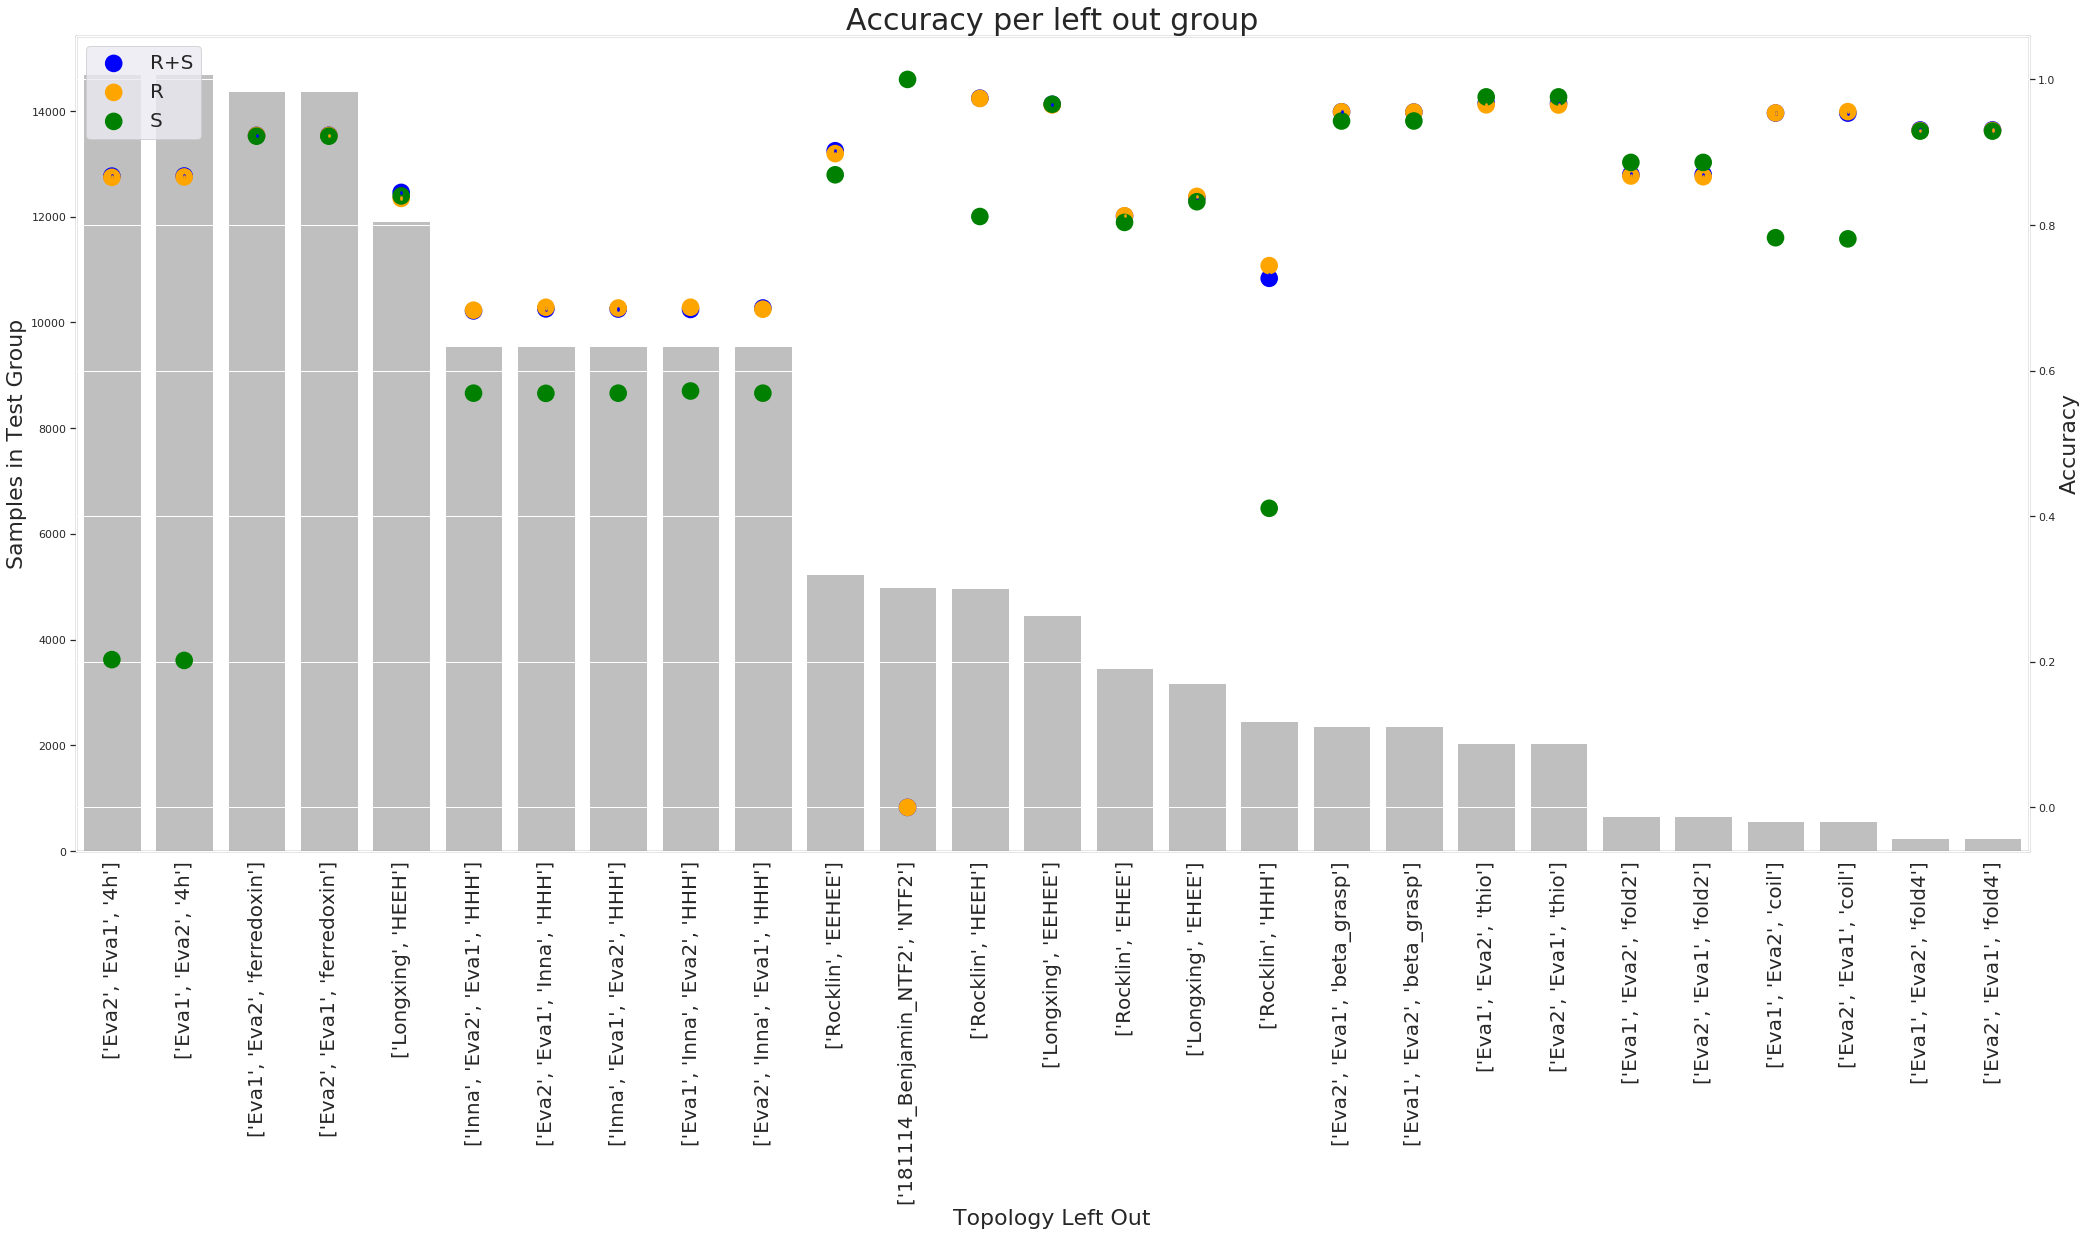

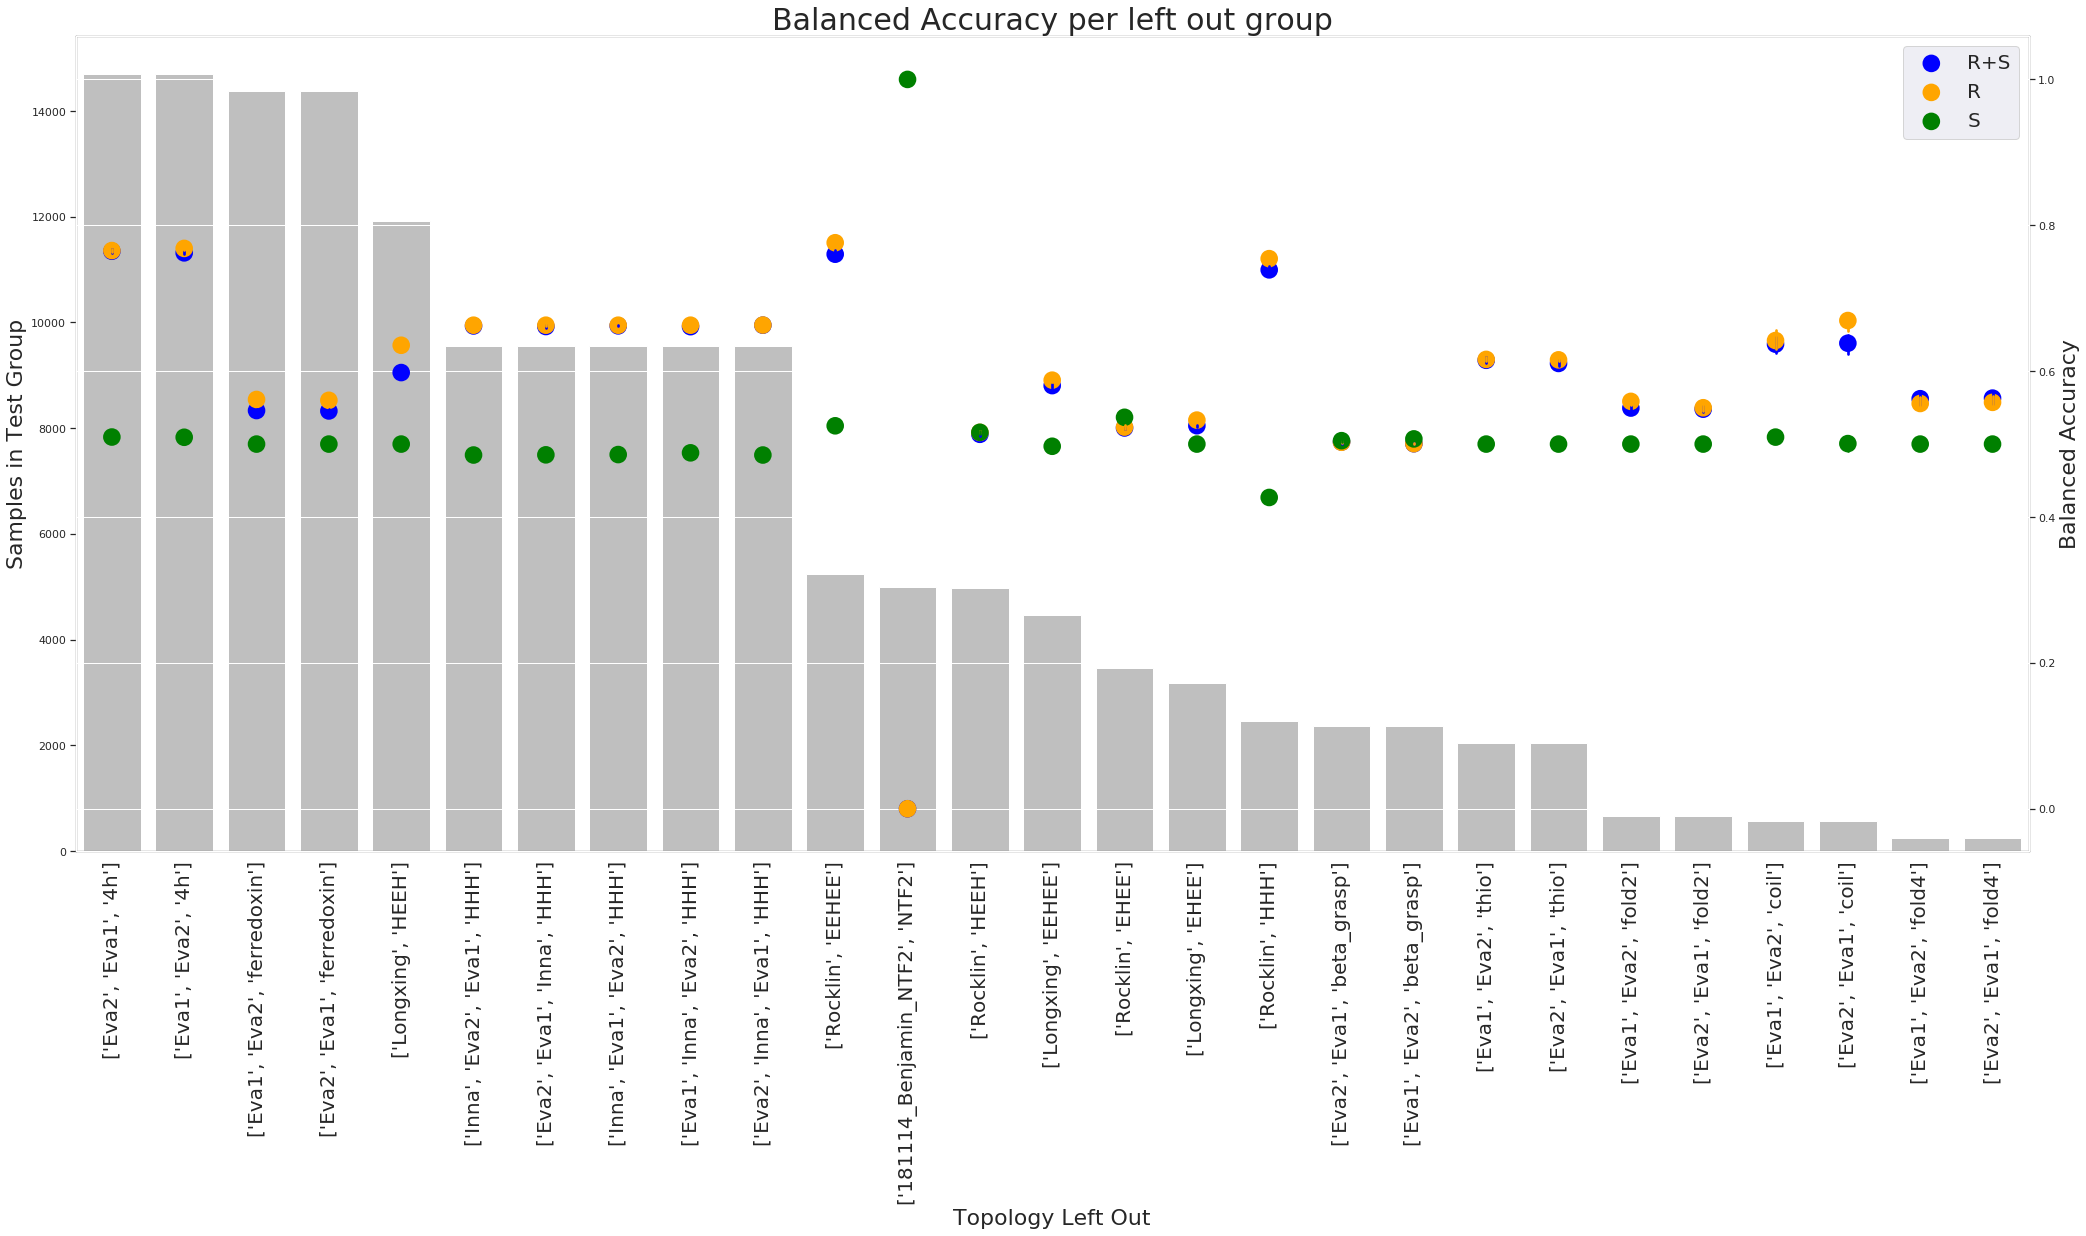

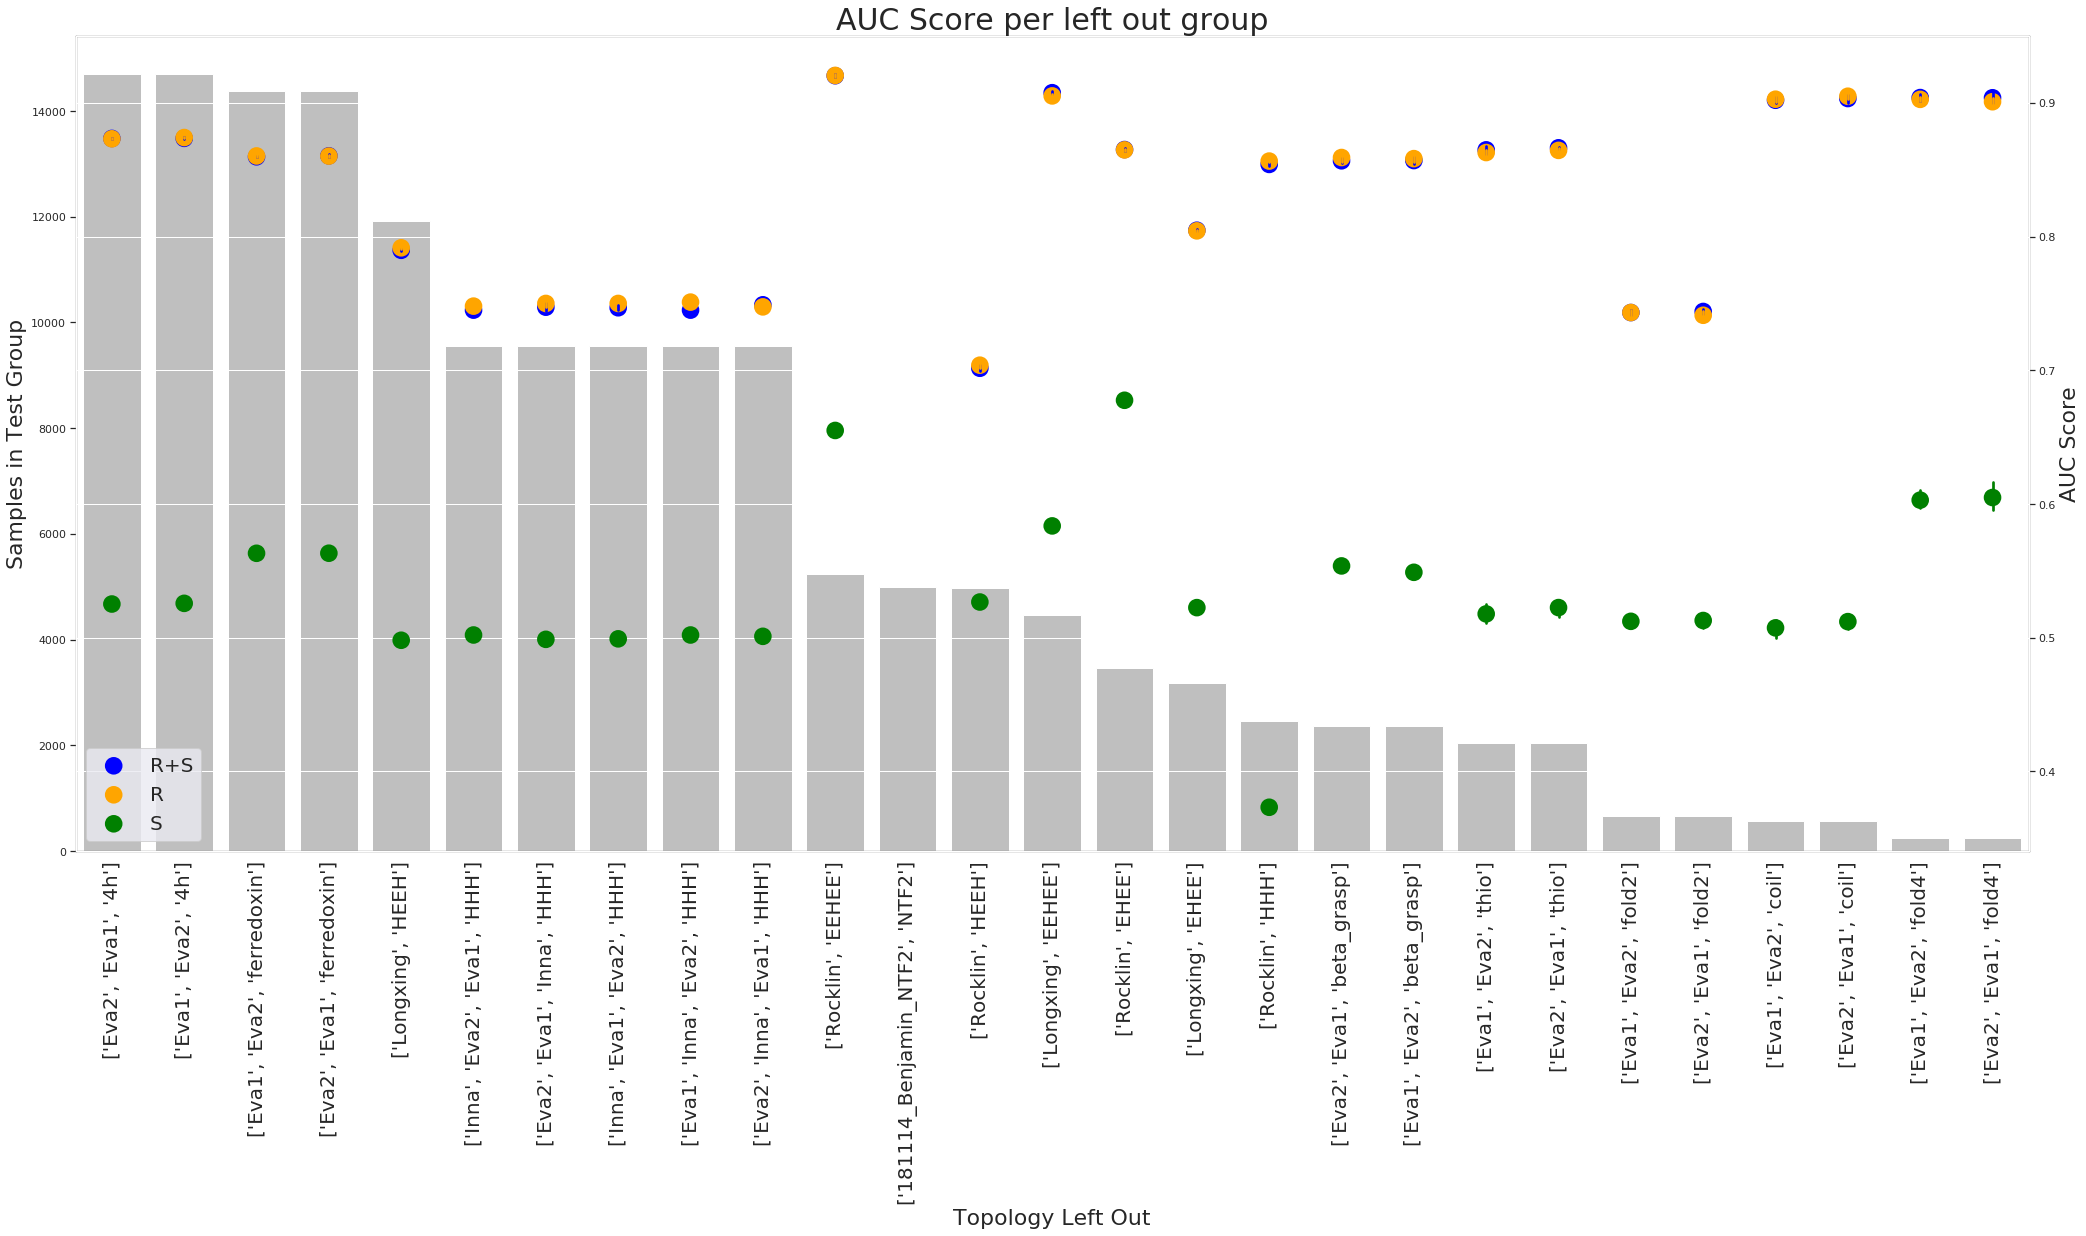

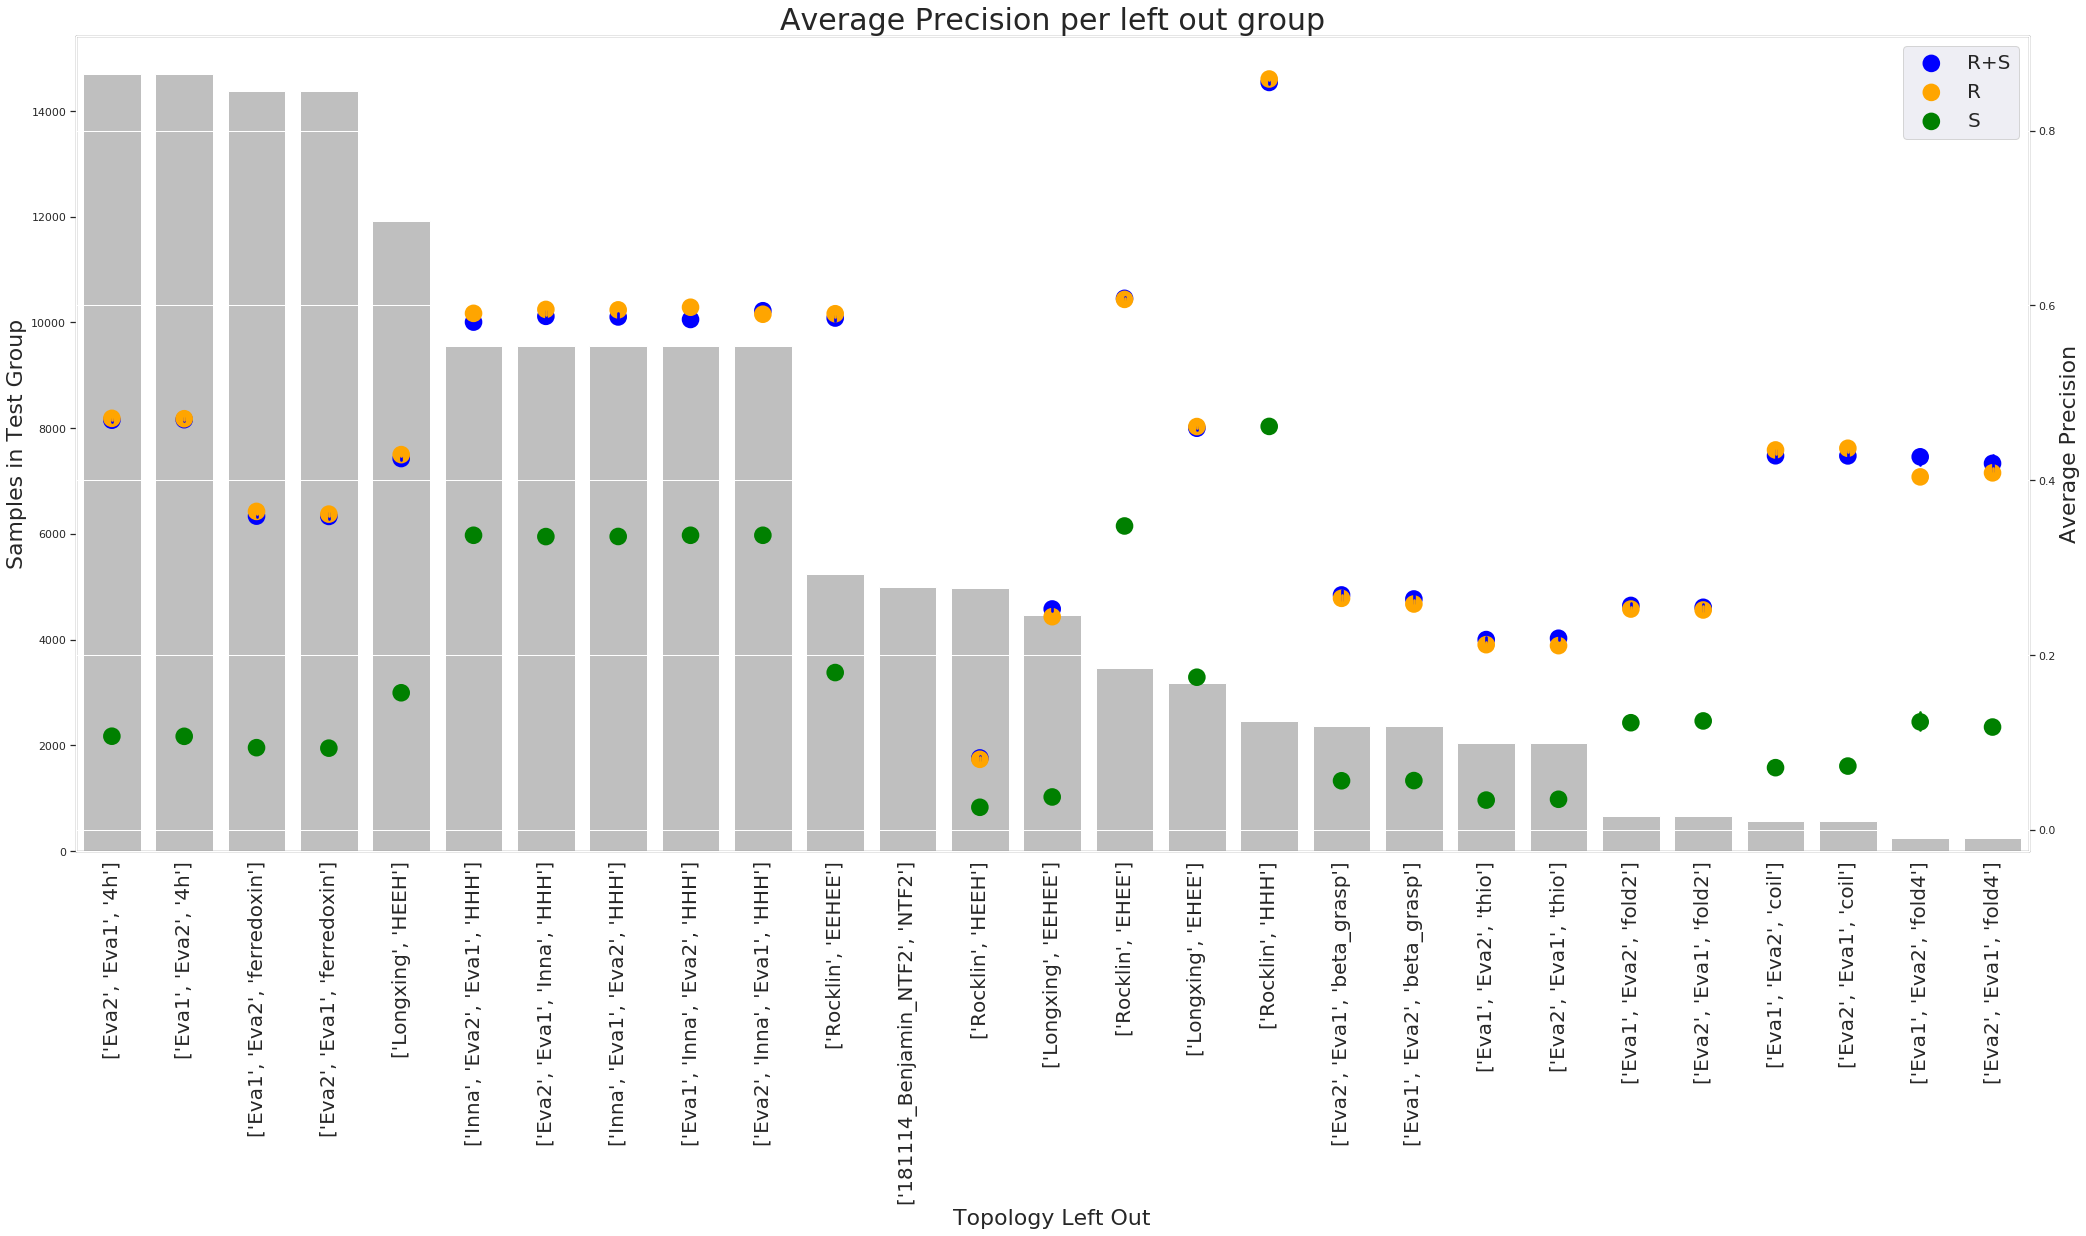

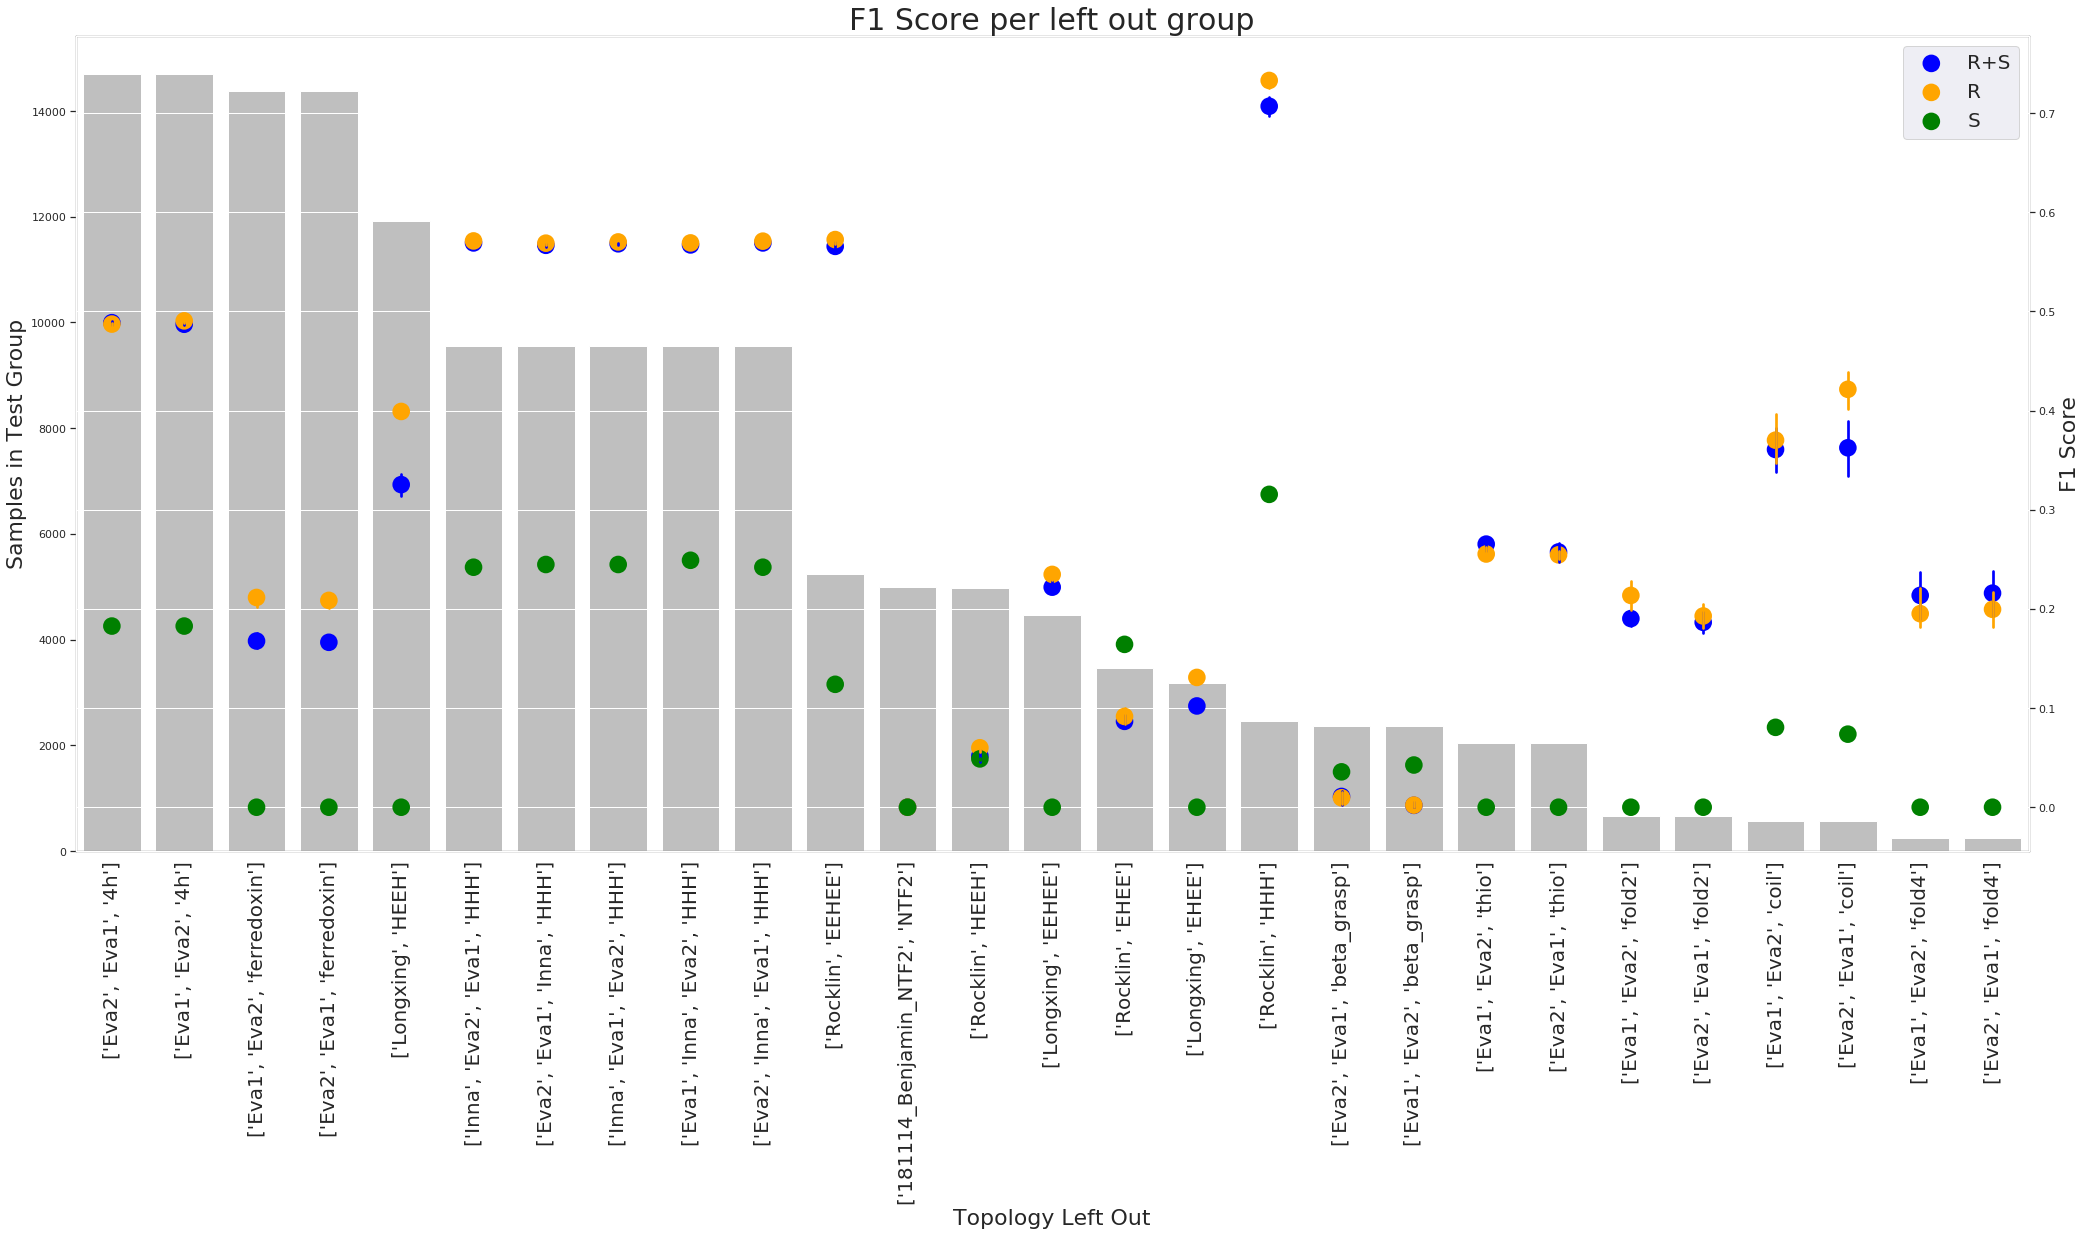

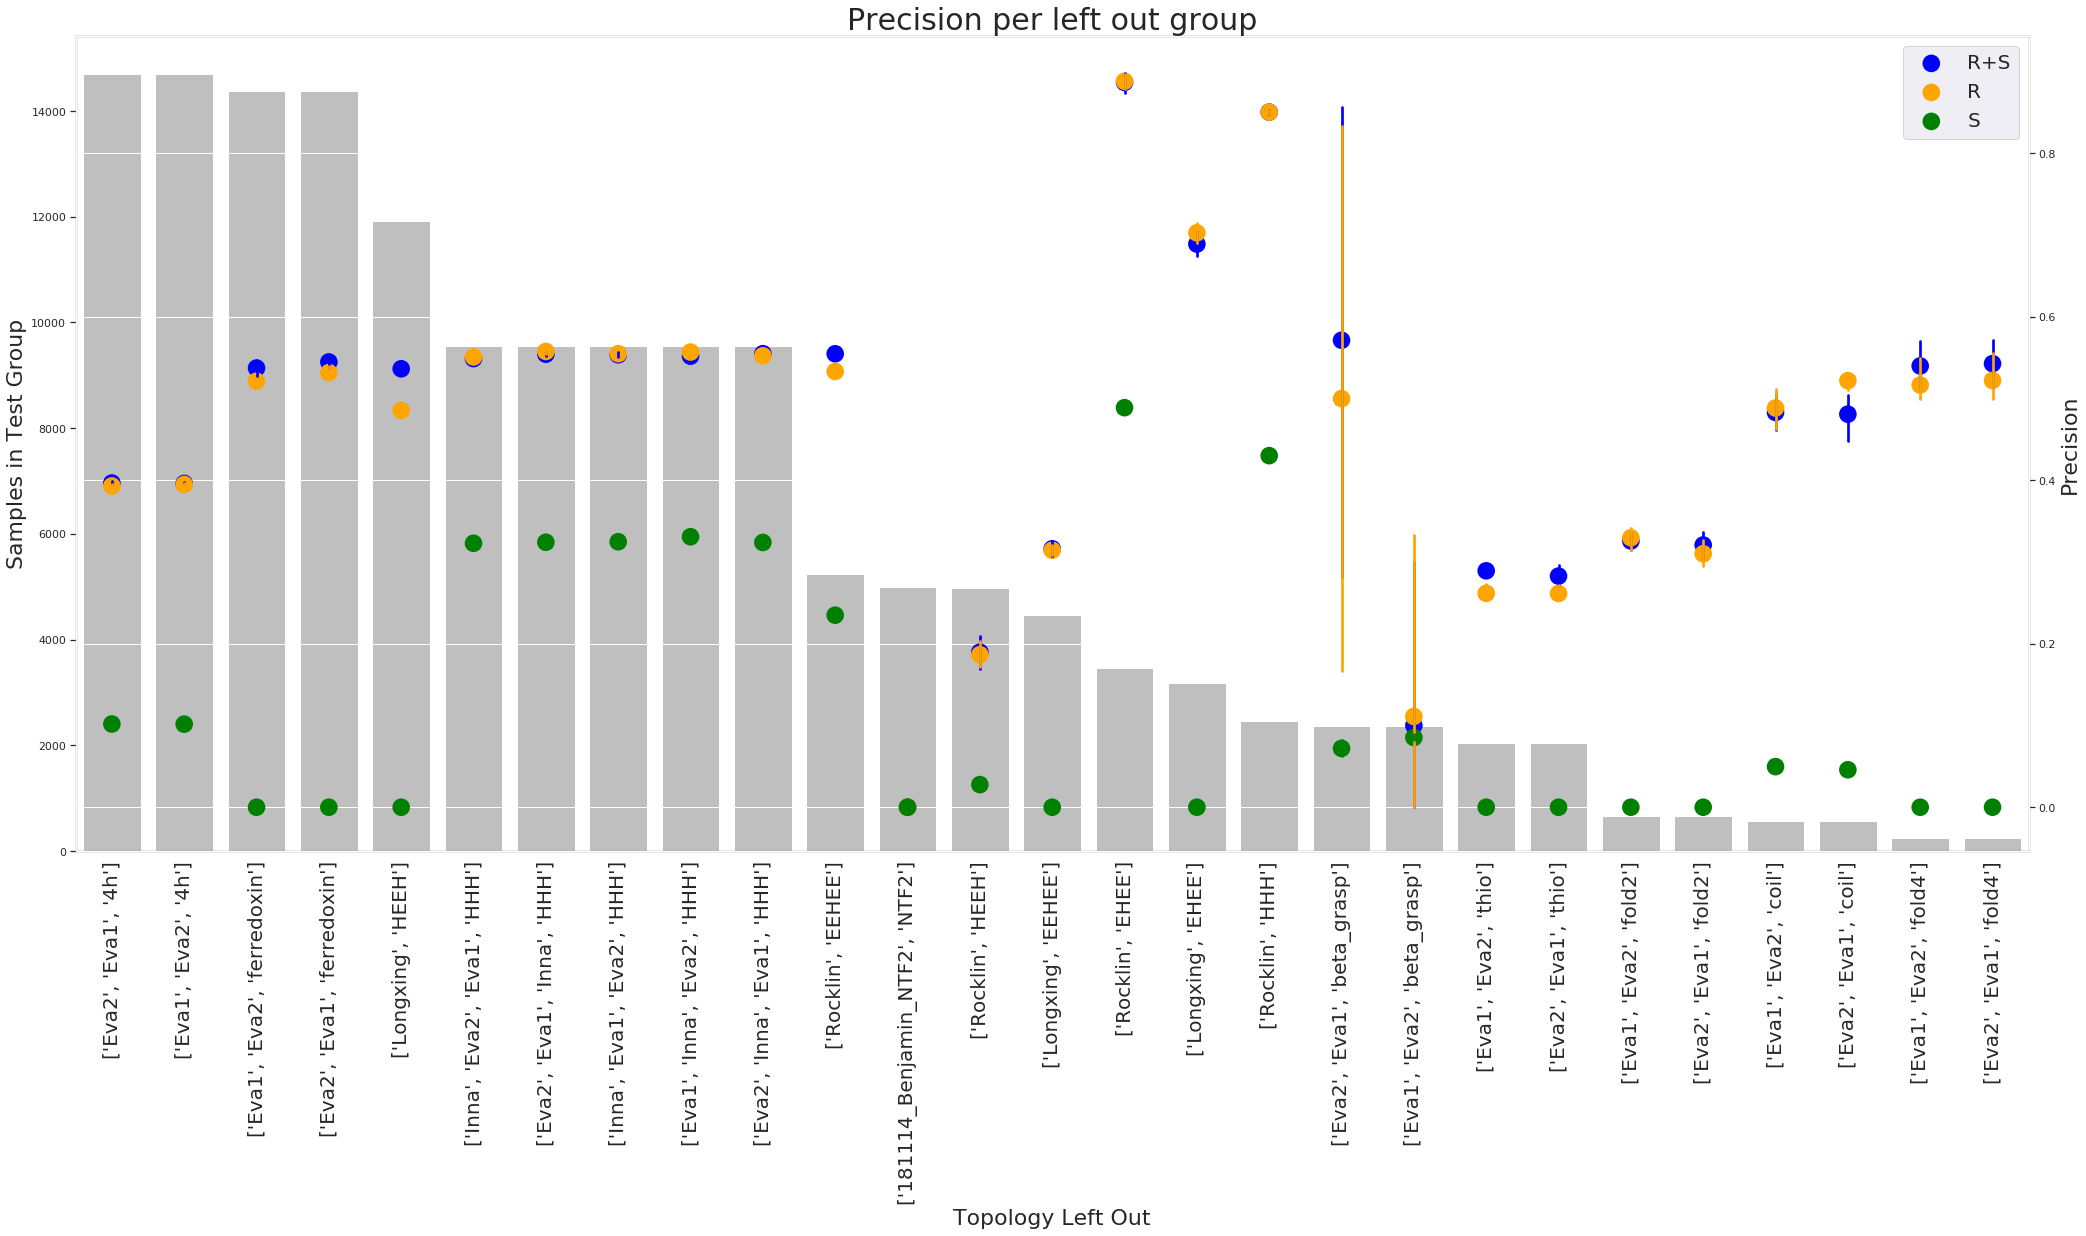

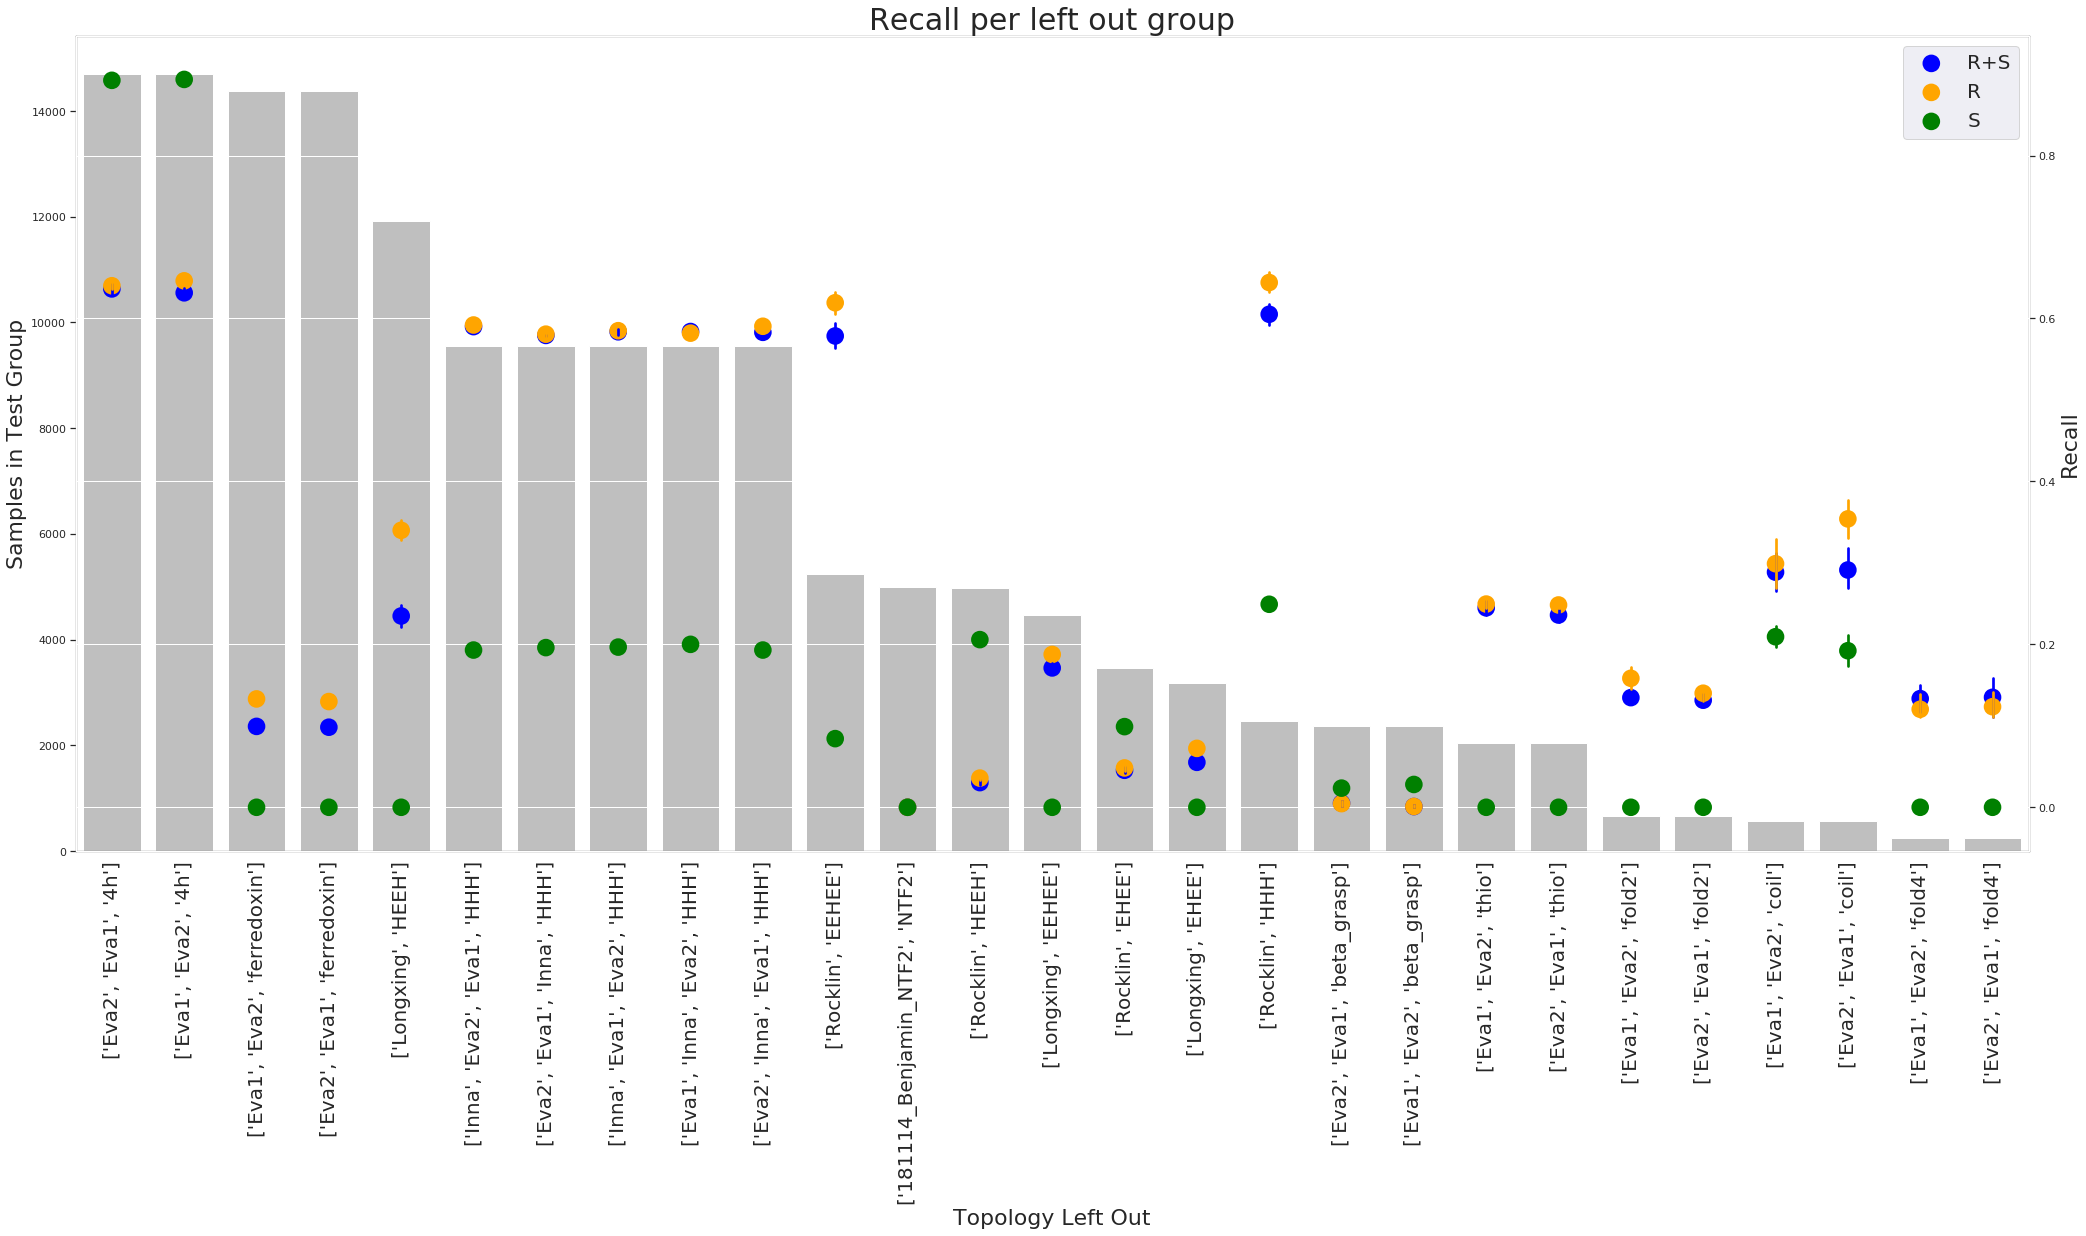

In [71]:
#visualize trends in data

# sort dataframes for plots
clf_rs = clf_rs.sort_values(by='Samples In Test',ascending=False)
clf_r = clf_r.sort_values(by='Samples In Test',ascending=False)
clf_s = clf_s.sort_values(by='Samples In Test',ascending=False)

for i in range(len(clf_scores_names)):
        sns.set_style('white')

        fig,ax = plt.subplots()

        score_rs = clf_rs[clf_scores_names[i]].values
        score_r = clf_r[clf_scores_names[i]].values
        score_s = clf_s[clf_scores_names[i]].values

        sns.set(rc={'figure.figsize':(35,15)})


        sns.barplot(x=clf_rs['Test Group'].values,y=clf_rs['Samples In Test'],ax=ax,color='.75')
        sns.barplot(x=clf_r['Test Group'].values,y=clf_r['Samples In Test'],ax=ax,color='.75')
        sns.barplot(x=clf_s['Test Group'].values,y=clf_s['Samples In Test'],ax=ax,color='.75')
        ax2 = ax.twinx()


        sns.pointplot(x=clf_rs['Test Group'].values,y=score_rs,color='blue',join=False,scale=2)
        sns.pointplot(x=clf_r['Test Group'].values,y=score_r,color='orange',join=False,scale=2)
        sns.pointplot(x=clf_s['Test Group'].values,y=score_s,color='green',join=False,scale=2)


        ax2.legend(handles=ax2.collections, labels=["R+S","R","S"],prop={'size':'20'})


        plt.title("%s per left out group"%clf_scores_names[i],fontsize=30)
        ax.set_xlabel("Topology Left Out",fontsize=22)
        ax.set_xticklabels(ax2.get_xticklabels(),rotation=90,fontsize=20)
        plt.ylabel("%s"%clf_scores_names[i],fontsize=22)
        ax.set_ylabel("Samples in Test Group",fontsize=22)
        plt.show()
        #plt.close('all')

# Digging into the Results

In [72]:
clf_s[clf_s['Test Group']=="['Eva2', 'Eva1', '4h']"]['Recall']


577    0.894
582    0.897
579    0.891
575    0.896
576    0.887
584    0.889
Name: Recall, dtype: float64

In [73]:
# there is a huge error bar for 'Precision' in 'beta_grasp'
clf_r[clf_r['Test Group']=="['Eva2', 'Eva1', 'beta_grasp']"]['Precision']


#run *** had the potentially anomalous result

393    1.0
391    0.0
378    1.0
396    0.0
372    1.0
387    0.0
Name: Precision, dtype: float64

In [74]:
#get the run id so we can look at the class imbalance in the testing set for this run

bg_run_id = clf_r[clf_r.index==372]['Leave-One-Out ID'].values[0]

In [75]:
# read data set for this run
pd.read_csv('/home/jupyter/tacc-work/model_building/estrada_runs/leave_one_out_runs/test_harness_results/runs/loo_'+bg_run_id+'/data.csv')

dataset                                name  \
0                      Eva1                        ems_4hM_5080   
1                      Eva1                      ems_ferrM_3720   
2                      Eva1                       ems_ferrC_498   
3                      Eva1                  ems_ferrM_252_0002   
4                      Eva1                      ems_ferrM_6617   
5                      Eva1                 ems_ferrM_6617_0002   
6                      Eva1                   ems_4hC_1631_0002   
7                      Eva1                        ems_4hM_2026   
8                      Eva1                   ems_4hC_1597_0002   
9                      Eva1                 ems_ferrM_4526_0002   
10                     Eva1                 ems_ferrM_2624_0002   
11                     Eva1                      ems_ferrM_3669   
12                     Eva1                      ems_ferrM_7145   
13                     Eva1                        bGM_297_0002   
14                     Eva1                             bGM_297   
15                     Eva1                        bGM_372_0002   
16                     Eva1                   ems_4hM_2877_0002   
17                     Eva1                      ems_ferrM_5428   
18                     Eva1                 ems_ferrM_5428_0002   
19                     Eva1                      ems_ferrC_2277   
20                     Eva1                      ems_ferrM_4246   
21                     Eva1                 ems_ferrM_6192_0002   
22                     Eva1                 ems_ferrM_4246_0002   
23                     Eva1                 ems_ferrM_5856_0002   
24                     Eva1                 ems_ferrM_3846_0002   
25                     Eva1                      ems_ferrM_5938   
26                     Eva1                        bGM_630_0002   
27                     Eva1                      ems_ferrM_7418   
28                     Eva1                  ems_ferrM_856_0002   
29                     Eva1                      ems_ferrM_3885   
...                     ...                                 ...   
85221  181114_Benjamin_NTF2  OEYWNEIG_BasicBeNTF2_designed_0000   
85222  181114_Benjamin_NTF2  VYHRQETV_BasicBeNTF2_designed_0000   
85223  181114_Benjamin_NTF2  JRIOFDGS_BasicBeNTF2_designed_0000   
85224  181114_Benjamin_NTF2  IGKHJWWF_BasicBeNTF2_designed_0000   
85225  181114_Benjamin_NTF2  GQJRTXCY_BasicBeNTF2_designed_0000   
85226  181114_Benjamin_NTF2  DKJCCZOW_BasicBeNTF2_designed_0000   
85227  181114_Benjamin_NTF2  OFRYLRET_BasicBeNTF2_designed_0000   
85228  181114_Benjamin_NTF2  DYUIVMUG_BasicBeNTF2_designed_0000   
85229  181114_Benjamin_NTF2  DNFVXUCT_BasicBeNTF2_designed_0000   
85230  181114_Benjamin_NTF2  IMQGJWRM_BasicBeNTF2_designed_0000   
85231  181114_Benjamin_NTF2  MNTSZFJY_BasicBeNTF2_designed_0000   
85232  181114_Benjamin_NTF2  AEXWYLWZ_BasicBeNTF2_designed_0000   
85233  181114_Benjamin_NTF2  PNDHELUC_BasicBeNTF2_designed_0000   
85234  181114_Benjamin_NTF2  KXKGWTYE_BasicBeNTF2_designed_0000   
85235  181114_Benjamin_NTF2  PNUGMHEQ_BasicBeNTF2_designed_0000   
85236  181114_Benjamin_NTF2  TDFIJAEO_BasicBeNTF2_designed_0000   
85237  181114_Benjamin_NTF2  JBUGRTZG_BasicBeNTF2_designed_0000   
85238  181114_Benjamin_NTF2  KOFTSJXT_BasicBeNTF2_designed_0000   
85239  181114_Benjamin_NTF2  TZNIRGIT_BasicBeNTF2_designed_0000   
85240  181114_Benjamin_NTF2  MQZJCTHS_BasicBeNTF2_designed_0000   
85241  181114_Benjamin_NTF2  MVRTQRSI_BasicBeNTF2_designed_0000   
85242  181114_Benjamin_NTF2  PJTDZCYV_BasicBeNTF2_designed_0000   
85243  181114_Benjamin_NTF2  JKCXFXRB_BasicBeNTF2_designed_0000   
85244  181114_Benjamin_NTF2  CXRGLYTR_BasicBeNTF2_designed_0000   
85245  181114_Benjamin_NTF2  EDWMIKRB_BasicBeNTF2_designed_0000   
85246  181114_Benjamin_NTF2  BGUGNFWT_BasicBeNTF2_designed_0000   
85247  181114_Benjamin_NTF2  FBMQFZDS_BasicBeNTF2_designed_0000   
85248  181114_Benjamin_NTF2  XGMGBVKP_BasicBeNTF2_designed_0000   


# Topology Specific Runs

In [9]:
clf_top_leaderboard = pd.read_html("/Volumes/JanEstrada Disk/Desktop/Configurational_Entropy_Publication/data/topology_specific_classification_leaderboard.html")[0]
clf_top_leaderboard

Run ID        Date      Time                    Model Name  \
0     QoZLLZl9oQ2Go  2019-04-09  17:44:20  random_forest_classification   
1     596mrXMpZ5mW8  2019-04-09  17:34:25  random_forest_classification   
2     EQQJq2x7Ek93J  2019-04-09  20:14:52  random_forest_classification   
3     Eae21dGgqA9Ay  2019-04-09  19:58:09  random_forest_classification   
4     551RW5vrGXeab  2019-04-09  20:02:12  random_forest_classification   
5     EN7wqQlr6Amp1  2019-04-09  20:03:34  random_forest_classification   
6     EzVEBeVGexjgM  2019-04-09  19:35:34  random_forest_classification   
7     ENdvNVqkGevGJ  2019-04-09  20:03:30  random_forest_classification   
8     QoyE3MJ2Bd769  2019-04-09  19:53:00  random_forest_classification   
9     6dyL1e7vbGLLN  2019-04-09  19:37:43  random_forest_classification   
10    5drkQoRV7ZrJ2  2019-04-09  20:10:34  random_forest_classification   
11    adoJWLvJLBv2R  2019-04-09  19:44:28  random_forest_classification   
12    aL8MQdggaEGyB  2019-04-09  20:07:40  random_forest_classification   
13    aP7P1pyVgOBrV  2019-04-09  19:46:45  random_forest_classification   
14    66Od1Jk1ZR6b3  2019-04-09  19:46:48  random_forest_classification   
15    aAd17bzj3lQgB  2019-04-09  20:13:24  random_forest_classification   
16    67ONadjQypNg3  2019-04-09  20:12:00  random_forest_classification   
17    5ZeoV9qGGLMrM  2019-04-09  20:06:20  random_forest_classification   
18    QgMD6Wjg2EaPP  2019-04-09  19:51:49  random_forest_classification   
19    5dXBQRmodx8qb  2019-04-09  19:42:06  random_forest_classification   
20    6Ag3eke89XMRl  2019-04-09  20:07:44  random_forest_classification   
21    Ezgpa3bQNod1e  2019-04-09  19:35:31  random_forest_classification   
22    5RMo3q7V9xj65  2019-04-09  19:41:03  random_forest_classification   
23    EQda7kdQWmgXM  2019-04-09  17:37:33  random_forest_classification   
24    ERNYW8r2a8wb1  2019-04-09  19:40:59  random_forest_classification   
25    aWQONwdxP6pQk  2019-04-09  19:50:36  random_forest_classification   
26    aYGYxP1gVAlMk  2019-04-09  19:58:13  random_forest_classification   
27    6q28BVdQMArkl  2019-04-09  20:09:09  random_forest_classification   
28    6OyaZp3lrAz1N  2019-04-09  19:44:25  random_forest_classification   
29    EMLvBVBzb5kNx  2019-04-09  19:48:01  random_forest_classification   
...             ...         ...       ...                           ...   
1183  5oGvVkyyYYXPw  2019-04-09  20:11:42  random_forest_classification   
1184  EvODqAyJaoOk8  2019-04-09  20:01:55  random_forest_classification   
1185  aAGErw9q1pqBd  2019-04-09  19:44:49  random_forest_classification   
1186  aWrx69wqBNGjV  2019-04-09  19:57:56  random_forest_classification   
1187  5MmZmboe9bBvr  2019-04-09  20:06:02  random_forest_classification   
1188   QeABy6M7D5oP  2019-04-09  19:38:34  random_forest_classification   
1189  QR2GBez2OrEdD  2019-04-09  19:56:00  random_forest_classification   
1190  EQ5d5OdVaPGGY  2019-04-09  19:46:33  random_forest_classification   
1191  amg6Wmqm3k1eR  2019-04-09  20:11:00  random_forest_classification   
1192  5rqNwawpmRpwG  2019-04-09  20:03:59  random_forest_classification   
1193  56ZyXZY1mlLjY  2019-04-09  19:39:40  random_forest_classification   
1194  5Z26OQZ5eePOb  2019-04-09  19:37:28  random_forest_classification   
1195   6Bm9p5ameBmM  2019-04-09  19:59:56  random_forest_classification   
1196  5ReGqPvxmdRXY  2019-04-09  20:02:37  random_forest_classification   
1197  5rqq1g83RYe1w  2019-04-09  19:42:31  random_forest_classification   
1198  59b9zrjwGNWjY  2019-04-09  19:43:40  random_forest_classification   
1199  aYGOGeeVqy7jk  2019-04-09  20:05:22  random_forest_classification   
1200  5rep9L38y9JEr  2019-04-09  19:49:41  random_forest_classification   
1201  6goO3lDEpBGv3  2019-04-09  19:40:16  random_forest_classification   
1202  5O9GGxkD8Eem2  2019-04-09  19:50:58  random_forest_classification   
1203  6ADYxo5O8gLNG  2019-04-09  19:53:27  random_forest_classification   
1204  EeeXr27l5qd21  2019-04-09  19:58

In [10]:
def make_topologies_list(file_path_of_results):
    #make two columns for sorting purposes
    leaderboard = pd.read_html(file_path_of_results)[0]
    leaderboard['topology'] = [i.split()[1] for i in leaderboard['Data and Split Description']]
    leaderboard['model'] = [i.split()[0] for i in leaderboard['Data and Split Description']]
    
    #show how many datapoints we have per topology
    print(leaderboard['topology'].value_counts())
    
    #make a list of available topologies
    topologies_list = leaderboard['topology'].value_counts().index
    
    df_list = []
    for topology in topologies_list:
        subset_df = leaderboard[leaderboard['topology']==topology]
        df_list.append(subset_df)
    final_df = pd.concat(df_list)
    return final_df
    

In [12]:
make_topologies_list("/Volumes/JanEstrada Disk/Desktop/Configurational_Entropy_Publication/data/topology_specific_classification_leaderboard.html")

HEEH          117
4h            117
ferredoxin    115
HHH           114
EEHEE         114
EHEE          111
fold2         105
coil          105
beta_grasp    105
fold4         105
thio          105
Name: topology, dtype: int64


Run ID        Date      Time                    Model Name  \
475   azRZN9BxpVZPb  2019-04-09  20:03:02  random_forest_classification   
477   a7DgbovRb6vYV  2019-04-09  19:56:19  random_forest_classification   
480    aByQYdW5mkqw  2019-04-09  20:07:06  random_forest_classification   
483   Ea3QNdRVErWvz  2019-04-09  19:51:15  random_forest_classification   
484   QR2bVJ1Q16P9P  2019-04-09  19:41:41  random_forest_classification   
485   ENeWZ5qPllXp1  2019-04-09  19:27:39  random_forest_classification   
486   5V5arbpMZqbQ8  2019-04-09  19:45:09  random_forest_classification   
487   5WqQ96LvZmG7w  2019-04-09  20:01:40  random_forest_classification   
488   EzA5OP9OJByoM  2019-04-09  20:11:22  random_forest_classification   
491   a7ykR3razG5q6  2019-04-09  19:35:02  random_forest_classification   
492   ENVgJ8mYNMLDY  2019-04-09  19:35:06  random_forest_classification   
493   QoDX8WRye39a1  2019-04-09  17:37:10  random_forest_classification   
494   62RW2lYxJjzXw  2019-04-09  19:34:02  random_forest_classification   
495   am8yyQ1PvOWwo  2019-04-09  19:42:45  random_forest_classification   
496   aLkmjo1YlQVDk  2019-04-09  20:00:19  random_forest_classification   
497    615qklGmpLQw  2019-04-09  20:14:17  random_forest_classification   
499   QzQwpQYYYOgEr  2019-04-09  20:08:31  random_forest_classification   
500   apg7qXraY9QYk  2019-04-09  19:42:50  random_forest_classification   
501   aMdWM3ElbV99L  2019-04-09  20:01:35  random_forest_classification   
503    6826qoJDQ1xq  2019-04-09  20:14:22  random_forest_classification   
506    aQVjOmMzE3xL  2019-04-09  19:38:20  random_forest_classification   
507   QWr8PyL5BbR8q  2019-04-09  19:39:27  random_forest_classification   
508    6ozJXybDjlJO  2019-04-09  17:43:53  random_forest_classification   
509   apX1OJ9rdOy9L  2019-04-09  20:04:24  random_forest_classification   
510   EWr3oNDy6P99A  2019-04-09  19:48:39  random_forest_classification   
511   QMkZLlMlqkx6D  2019-04-09  19:47:27  random_forest_classification   
512    a5l5X93zRbkd  2019-04-09  20:07:11  random_forest_classification   
514   55OoRDYY1dY8M  2019-04-09  19:40:34  random_forest_classification   
515    EpqV9yovvok8  2019-04-09  19:38:16  random_forest_classification   
516   6qJ5OYvrE3NJO  2019-04-09  19:55:02  random_forest_classification   
...             ...         ...       ...                           ...   
962   6lQ7kNZxkB8gl  2019-04-09  19:49:46  random_forest_classification   
963   5rXOJgmmGxDp5  2019-04-09  19:49:44  random_forest_classification   
964   Q61ZW7qq7zqa1  2019-04-09  20:12:30  random_forest_classification   
965    5w3W2Vb96kLb  2019-04-09  19:59:59  random_forest_classification   
966    Q9OxAZwOWxwr  2019-04-09  20:06:51  random_forest_classification   
967   QOx9WOgr3DBE7  2019-04-09  19:34:51  random_forest_classification   
968   6gMPaElmw1yQW  2019-04-09  19:40:20  random_forest_classification   
969   6L6713l7ANgjw  2019-04-09  19:52:16  random_forest_classification   
970   aMaGpxll7Vdjm  2019-04-09  19:40:18  random_forest_classification   
971   6bo6Wk3XvY8R3  2019-04-09  20:05:27  random_forest_classification   
972   6OXEgOgA9pzNO  2019-04-09  19:58:40  random_forest_classification   
973   ap1lle2JryDG6  2019-04-09  19:35:57  random_forest_classification   
974   Em1vzNOAQwe31  2019-04-09  20:15:29  random_forest_classification   
975   Q9L2PGNeqbjpo  2019-04-09  20:04:04  random_forest_classification   
976   adQl6pvmqrWNw  2019-04-09  19:58:41  random_forest_classification   
977   QWgrwbpGBJkQ3  2019-04-09  19:39:12  random_forest_classification   
978   5ppdXvN7Bk6Lb  2019-04-09  19:41:27  random_forest_classification   
979   6bX7qyAPwP6qG  2019-04-09  19:51:02  random_forest_classification   
980   EaBoW6Zdjebye  2019-04-09  20:12:32  random_forest_classification   
981   a3X2AOyBw62rk  2019-04-09  19:53:32  random_forest_classification   
983   a3EkzQzgkQNBd  2019-04-09  17:44:46  random_forest_classification   
985   5rVbpr355A3py  2019-04-09  20:11

In [13]:
clf_top_leaderboard['topology'] = [i.split()[1] for i in clf_top_leaderboard['Data and Split Description']]
clf_top_leaderboard['model'] = [i.split()[0] for i in clf_top_leaderboard['Data and Split Description']]

In [14]:
clf_top_leaderboard['topology'].value_counts()

HEEH          117
4h            117
ferredoxin    115
HHH           114
EEHEE         114
EHEE          111
fold2         105
coil          105
beta_grasp    105
fold4         105
thio          105
Name: topology, dtype: int64

### Topology dataframes

In [15]:
top_4h = clf_top_leaderboard[clf_top_leaderboard['topology']=='4h']

In [16]:
top_ferredoxin = clf_top_leaderboard[clf_top_leaderboard['topology']=='ferredoxin']

In [17]:
top_HHH = clf_top_leaderboard[clf_top_leaderboard['topology']=='HHH']

In [18]:
top_EEHEE = clf_top_leaderboard[clf_top_leaderboard['topology']=='EEHEE']

In [19]:
top_EHEE = clf_top_leaderboard[clf_top_leaderboard['topology']=='EHEE']

In [20]:
top_HEEH = clf_top_leaderboard[clf_top_leaderboard['topology']=='HEEH']

In [21]:
top_beta_grasp = clf_top_leaderboard[clf_top_leaderboard['topology']=='beta_grasp']

In [22]:
top_fold2 = clf_top_leaderboard[clf_top_leaderboard['topology']=='fold2']

In [23]:
top_coil = clf_top_leaderboard[clf_top_leaderboard['topology']=='coil']

In [24]:
top_thio = clf_top_leaderboard[clf_top_leaderboard['topology']=='thio']

In [25]:
top_fold4 = clf_top_leaderboard[clf_top_leaderboard['topology']=='fold4']

In [26]:
topology_df_list = [top_4h,top_ferredoxin,top_HHH,top_EEHEE,top_EHEE,top_HEEH,top_beta_grasp,top_fold2,top_coil,top_thio,top_fold4]

In [27]:
df_topology = pd.concat(topology_df_list)

## Make the Plots

In [34]:
import seaborn as sns

In [36]:
df_topology

Run ID        Date      Time                    Model Name  \
254   QzEP555qzdPj7  2019-04-09  19:53:57  random_forest_classification   
256    Ek3MpVWLNDdM  2019-04-09  19:38:27  random_forest_classification   
258   5o1zN9xjqAWBb  2019-04-09  20:04:32  random_forest_classification   
261   6WLJ7E51G5V2W  2019-04-09  20:07:23  random_forest_classification   
262   QPYaDeoG1NYd9  2019-04-09  19:44:09  random_forest_classification   
263   EROZrkDvbYX21  2019-04-09  19:34:12  random_forest_classification   
264   62q83JV2VeeEN  2019-04-09  19:55:17  random_forest_classification   
265   Em1YB5wxbyQ1y  2019-04-09  19:54:00  random_forest_classification   
268   5JeWEPY15z6A2  2019-04-09  19:46:26  random_forest_classification   
271   6pGNz36ZOMZ3G  2019-04-09  19:48:50  random_forest_classification   
272   apEvgAQDBDXQm  2019-04-09  20:11:39  random_forest_classification   
275   5pr1MPjzvRwE8  2019-04-09  17:32:37  random_forest_classification   
276   azldZajVWp9od  2019-04-09  17:32:58  random_forest_classification   
279   QgvP9XVx5Ygao  2019-04-09  19:59:08  random_forest_classification   
285   EearwvgbEewGJ  2019-04-09  19:51:26  random_forest_classification   
286   55r693yGoMv6w  2019-04-09  19:47:42  random_forest_classification   
287   Q6JwLGZ5mvQZ3  2019-04-09  19:44:06  random_forest_classification   
293   Q9RwaxoQbAR3k  2019-04-09  19:35:13  random_forest_classification   
296   EzaPw77wV71DJ  2019-04-09  19:35:16  random_forest_classification   
297   5VQapz6LQ5BO8  2019-04-09  19:45:16  random_forest_classification   
299   aPm2AgJP2oYG6  2019-04-09  19:39:37  random_forest_classification   
300   5pGl8dBP1PGky  2019-04-09  20:03:09  random_forest_classification   
303    Q5GqGwbAvwqP  2019-04-09  19:52:41  random_forest_classification   
304   QE3MW98e9kx6D  2019-04-09  19:36:17  random_forest_classification   
305   5Wqvd5ejYjxJN  2019-04-09  20:15:59  random_forest_classification   
306   6OVBJ81VEawxN  2019-04-09  20:05:55  random_forest_classification   
308   5WEv7EgDrpPwG  2019-04-09  20:01:48  random_forest_classification   
309   6DRylGPyWbLNG  2019-04-09  19:27:49  random_forest_classification   
310   abPwOQaXGjmpB  2019-04-09  19:47:38  random_forest_classification   
311   QO5bgWGAApxgo  2019-04-09  19:27:46  random_forest_classification   
...             ...         ...       ...                           ...   
1026  6qPQ2lG6vjyZ3  2019-04-09  19:55:00  random_forest_classification   
1028  QWWGx3vGz8JQ7  2019-04-09  19:46:14  random_forest_classification   
1029  adDjlEygd13Bo  2019-04-09  19:37:10  random_forest_classification   
1031   EJMVN1g3ALwz  2019-04-09  20:14:15  random_forest_classification   
1032  E6E9N7VONmJgP  2019-04-09  19:28:37  random_forest_classification   
1033   6OqZqVY22Q6q  2019-04-09  19:38:15  random_forest_classification   
1036  6d3PBN5VBql1Y  2019-04-09  19:45:03  random_forest_classification   
1037  6WZkvGQeR55WO  2019-04-09  20:00:13  random_forest_classification   
1038  QR9J3bPpBL1Wo  2019-04-09  19:48:38  random_forest_classification   
1039  a3o5zYgGWRDgB  2019-04-09  19:39:22  random_forest_classification   
1040  aMp8q8m6Rv52L  2019-04-09  20:01:34  random_forest_classification   
1041  6Okp1LDeWrG2w  2019-04-09  20:12:47  random_forest_classification   
1042  5OkZBP7G5o7qr  2019-04-09  19:43:54  random_forest_classification   
1043  5Rl9ZvJN5pEEb  2019-04-09  20:09:54  random_forest_classification   
1044  QEWp7mvZRqW1k  2019-04-09  19:36:06  random_forest_classification   
1045  QPMd6yBkxBR8q  2019-04-09  20:05:41  random_forest_classification   
1046  5W1lAkJLPge9w  2019-04-09  19:47:26  random_forest_classification   
1047  EawMWrdmPvPAe  2019-04-09  19:51:14  random_forest_classification   
1049  59WLj1E9JWqrG  2019-04-09  19:57:35  random_forest_classification   
1050   Ekj8bQrXL79A  2019-04-09  20:07:05  random_forest_classification   
1051  QOPmqZoe6J9Rr  2019-04-09  19:56:18  random_forest_classification   
1052  apzVPO78OEePb  2019-04-09  19:50

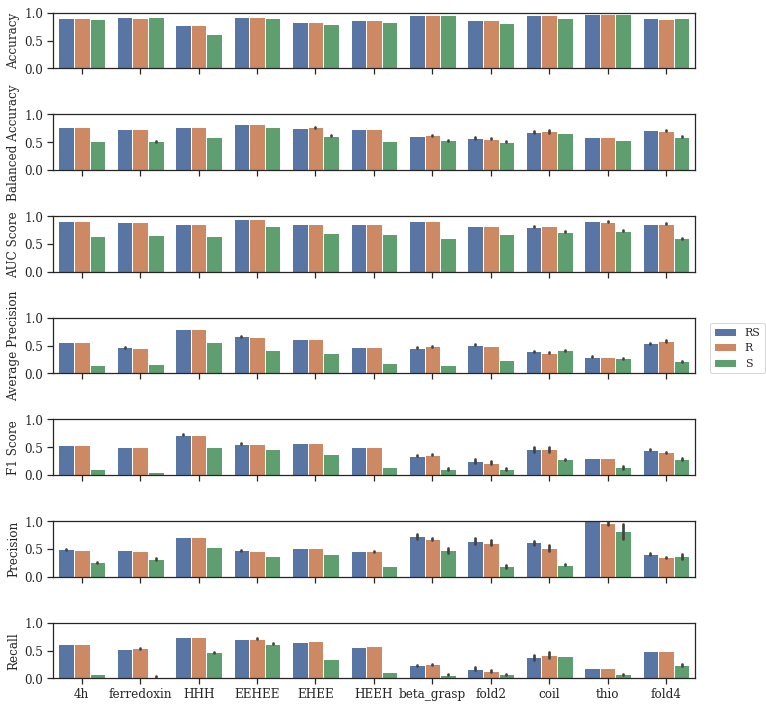

In [102]:
metrics = ['Accuracy','Balanced Accuracy','AUC Score','Average Precision','F1 Score','Precision','Recall']
sns.set(style="ticks")
plt.rc('font', family='serif') # change font types for plots
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

f,ax = plt.subplots(len(metrics),1,figsize=(10,10))
for i in range(len(metrics)):
    sns.catplot(data=df_topology,kind="bar",x="topology",y=metrics[i],hue='model',ax=ax[i],legend=False,
               facet_kws={"legend_out":True})
    ax[i].set_xticklabels(ax[i].get_xticklabels(),visible=False)
    ax[i].set_ylim(0,1)
    ax[i].set_xlabel("")
    ax[i].set_ylabel(metrics[i],rotation=90)
    ax[i].get_legend().remove()

    
    plt.close()
    
ax[i].set_xticklabels(ax[i].get_xticklabels(),visible=True)
handles, labels = ax[0].get_legend_handles_labels()
f.legend(handles, labels, bbox_to_anchor=(1.07,.5), loc=7)
plt.tight_layout()

In [ ]:
#visualize trends in data
clf_scores_names = ['Accuracy','Balanced Accuracy','AUC Score','Average Precision','F1 Score','Precision','Recall']
rgr_scores_names = ['R-Squared','RMSE']



metric_list = None
if score_metric=='clf':
    metric_list = clf_scores_names
elif score_metric=='rgr':
    metric_list = rgr_scores_names
else:
    print("Invalid score metric. Choose either 'clf' or 'rgr'")
    return




top_rs = topology_list_df[topology_list_df['model']=='RS']
top_r = topology_list_df[topology_list_df['model']=='R']
top_s = topology_list_df[topology_list_df['model']=='S']



# sort dataframes for plots
top_rs = top_rs.sort_values(by='Samples In Test',ascending=False)
top_r = top_r.sort_values(by='Samples In Test',ascending=False)
top_s = top_s.sort_values(by='Samples In Test',ascending=False)

for i in range(len(metric_list)):
        sns.set_style('white')

        fig,ax = plt.subplots()

        score_rs = top_rs[metric_list[i]].values
        score_r = top_r[metric_list[i]].values
        score_s = top_s[metric_list[i]].values

        sns.set(rc={'figure.figsize':(35,15)})


        sns.barplot(x=top_rs['topology'].values,y=top_rs['Samples In Test'],ax=ax,color='white',edgecolor='black',linewidth=4)
        sns.barplot(x=top_r['topology'].values,y=top_r['Samples In Test'],ax=ax,color='white',edgecolor='black',linewidth=4)
        sns.barplot(x=top_s['topology'].values,y=top_s['Samples In Test'],ax=ax,color='white',edgecolor='black',linewidth=4)
        ax2 = ax.twinx()


        sns.pointplot(x=top_rs['topology'].values,y=score_rs,color='blue',join=False,scale=1)
        sns.pointplot(x=top_r['topology'].values,y=score_r,color='orange',join=False,scale=1)
        sns.pointplot(x=top_s['topology'].values,y=score_s,color='green',join=False,scale=1)


        ax2.legend(handles=ax2.collections, labels=["R+S","R","S"],prop={'size':'20'})


        plt.title("%s per topology"%metric_list[i],fontsize=30)
        ax.set_xlabel("Topology ",fontsize=22)
        ax.set_xticklabels(ax2.get_xticklabels(),fontsize=20)
        plt.ylabel("%s"%metric_list[i],fontsize=22)
        ax.set_ylabel("Number of samples in test group",fontsize=22)
        plt.show()
        #plt.close('all')

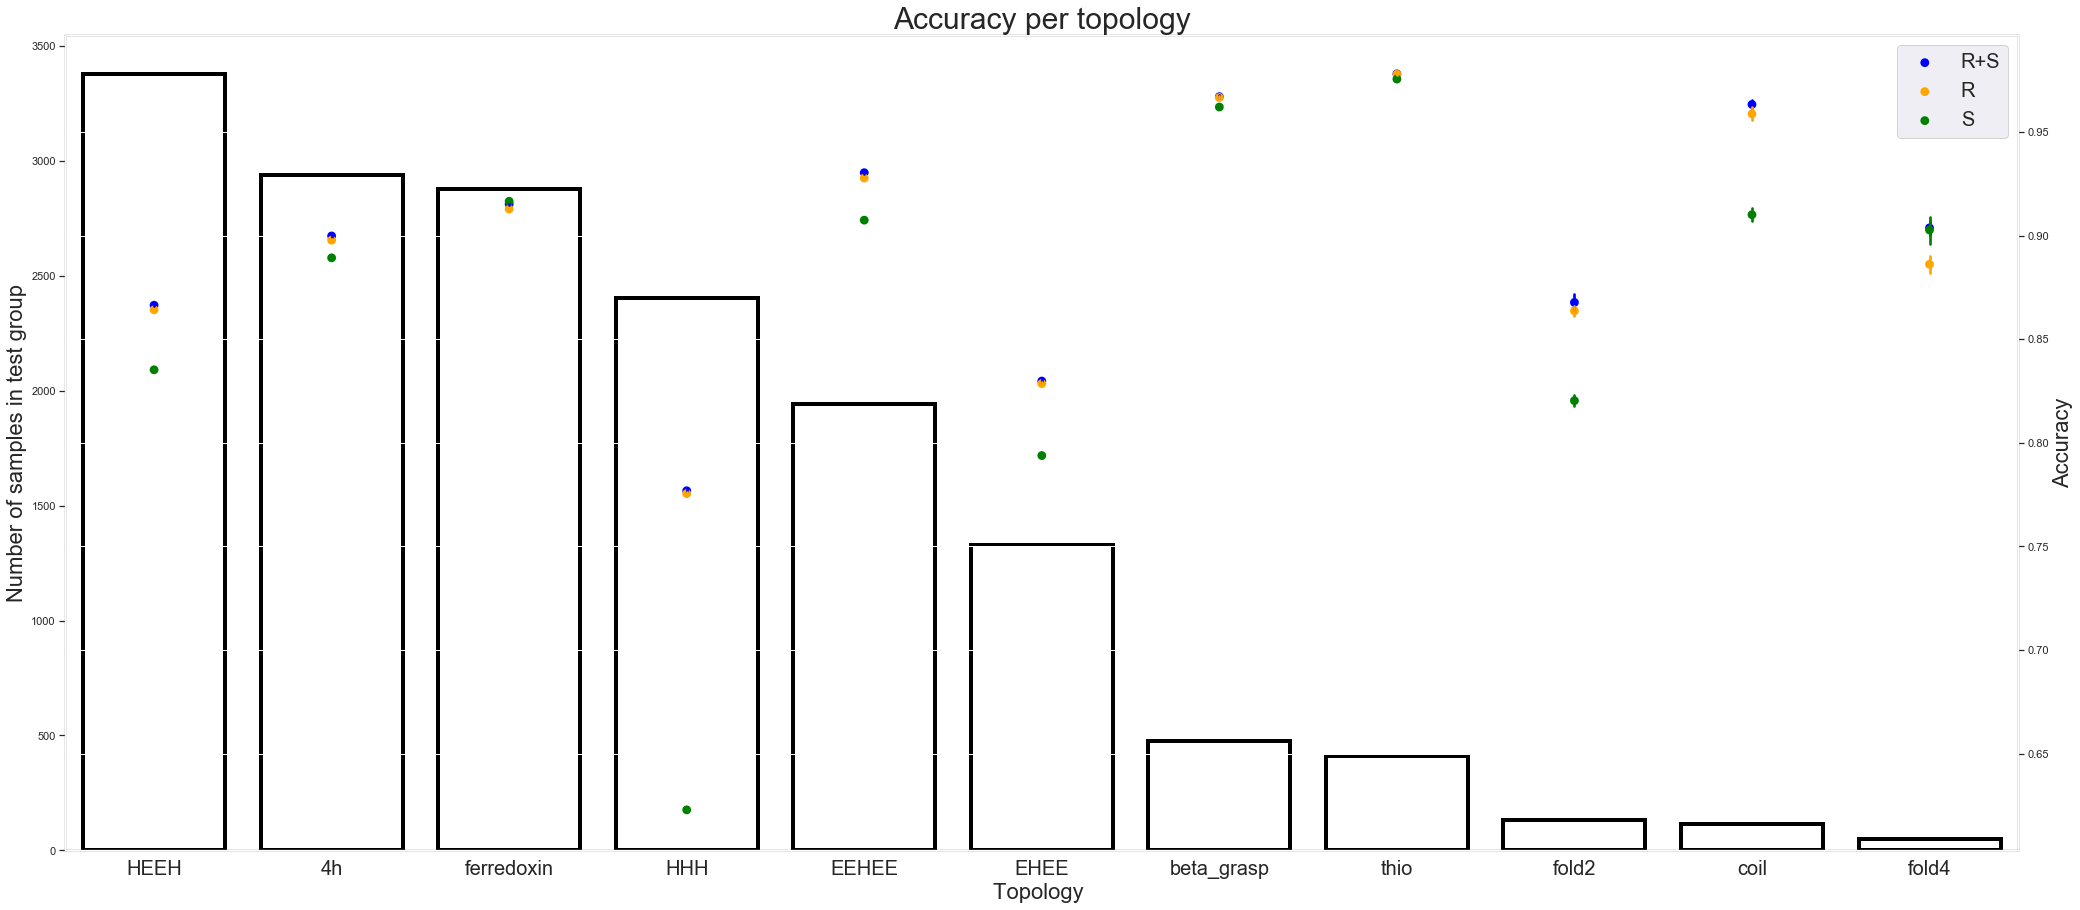

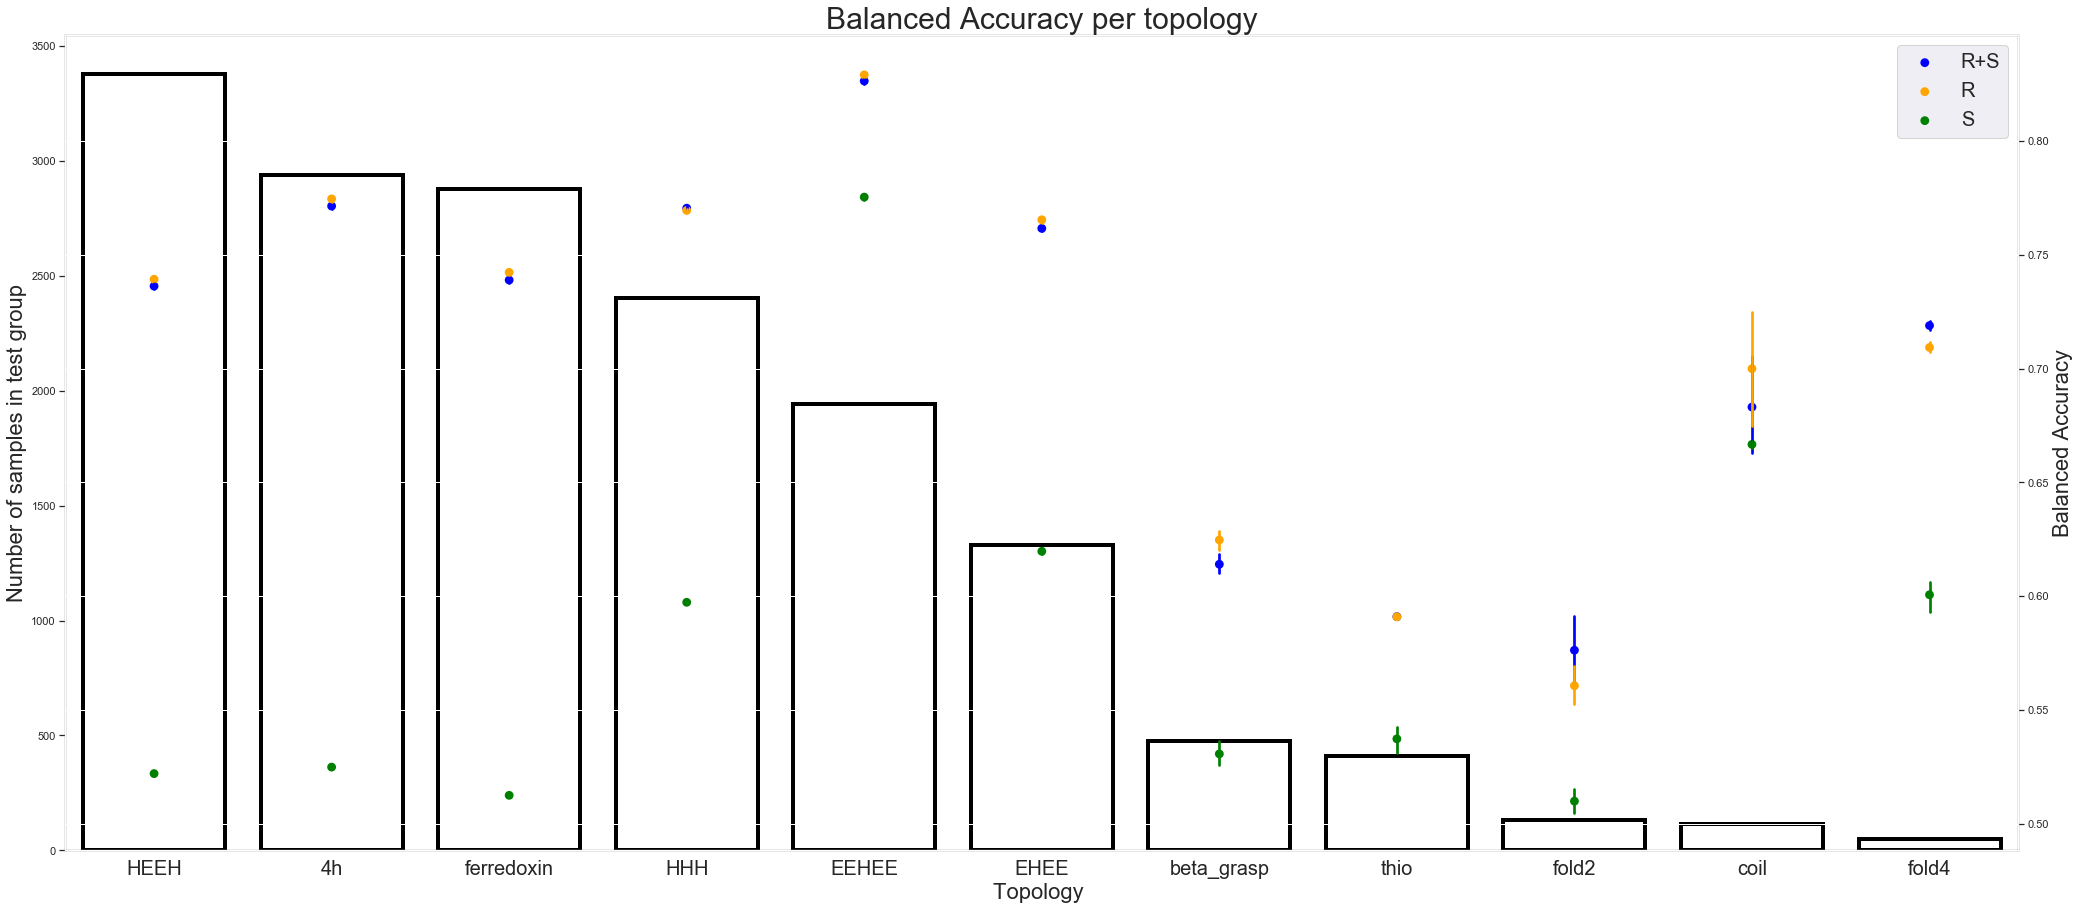

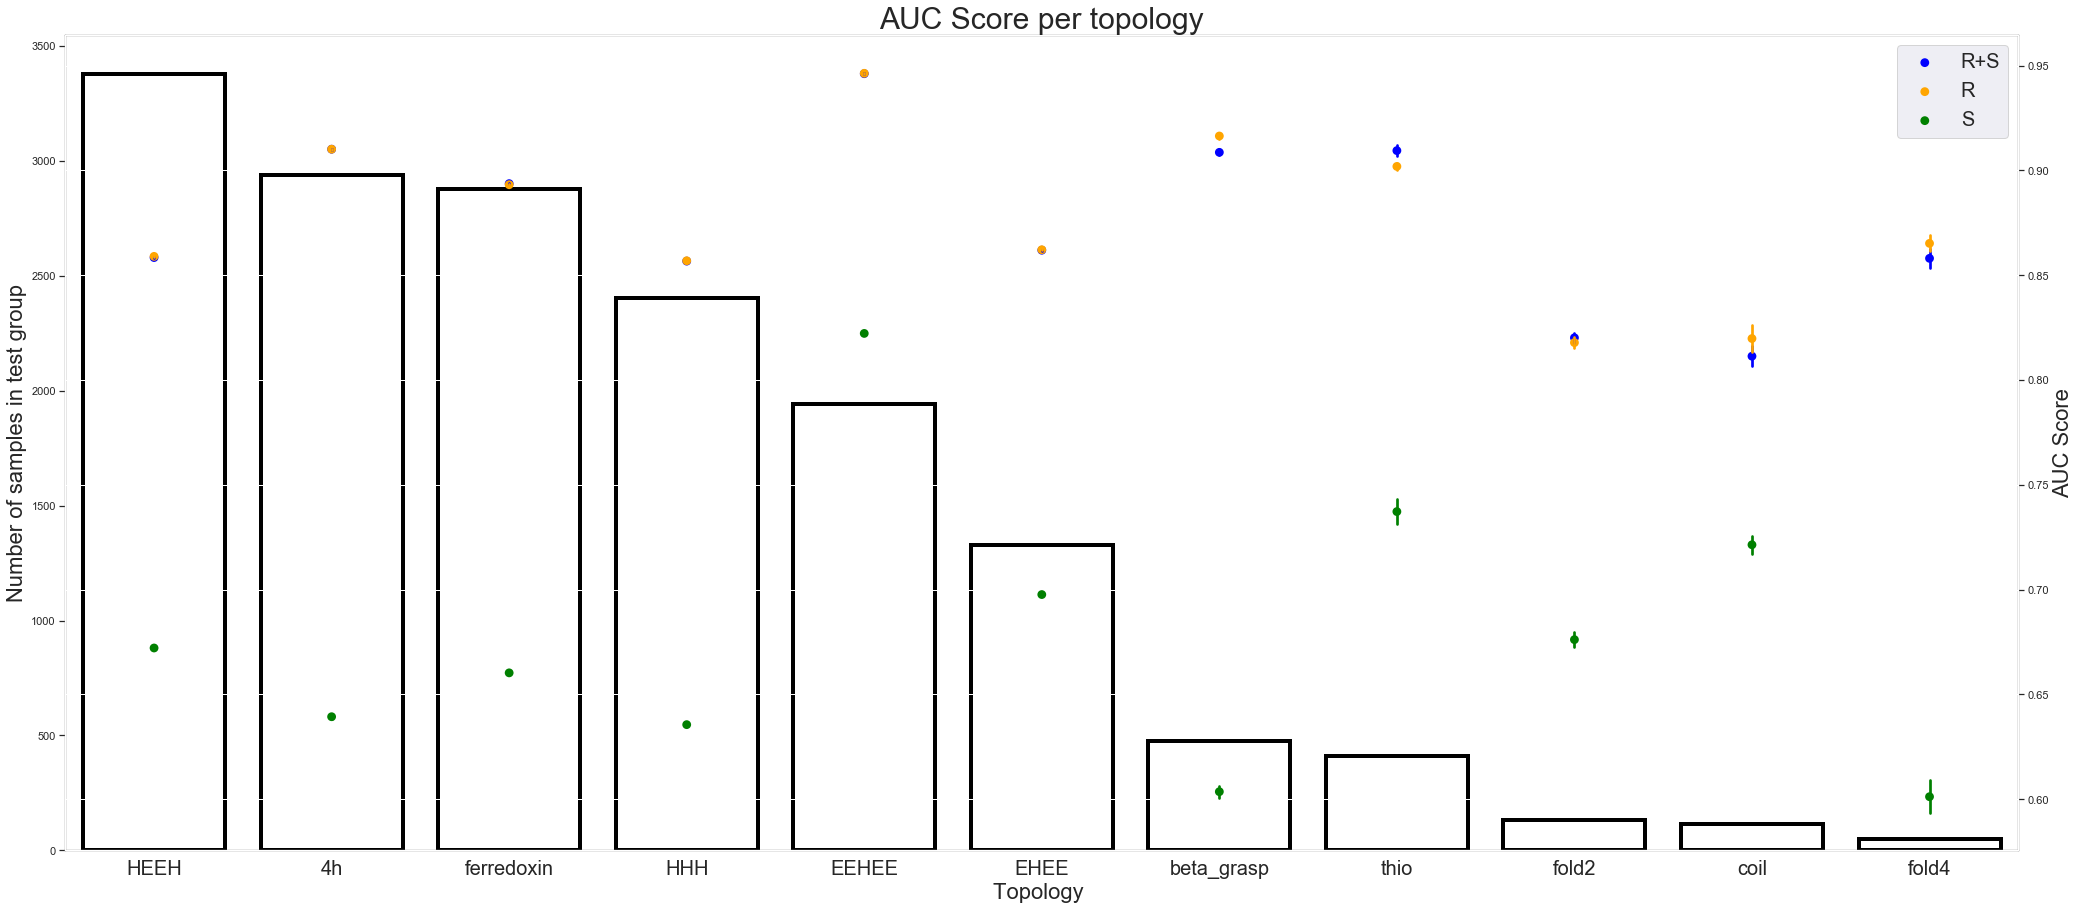

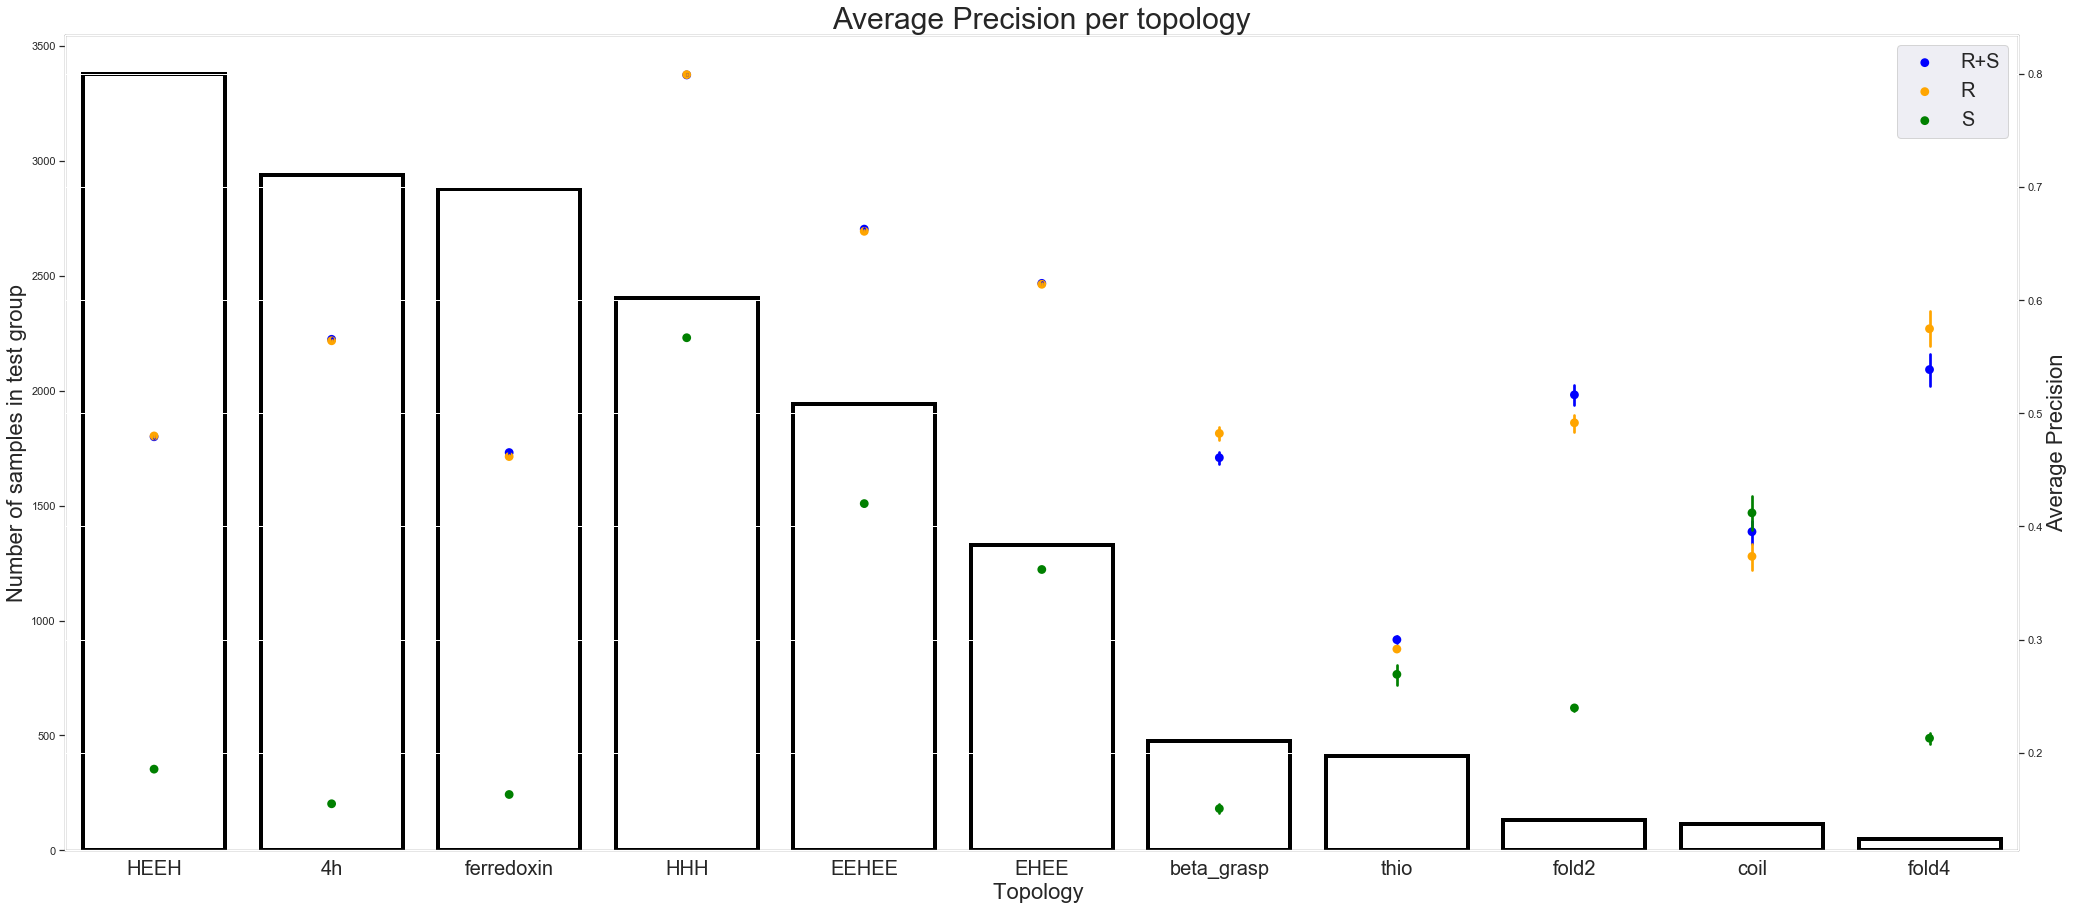

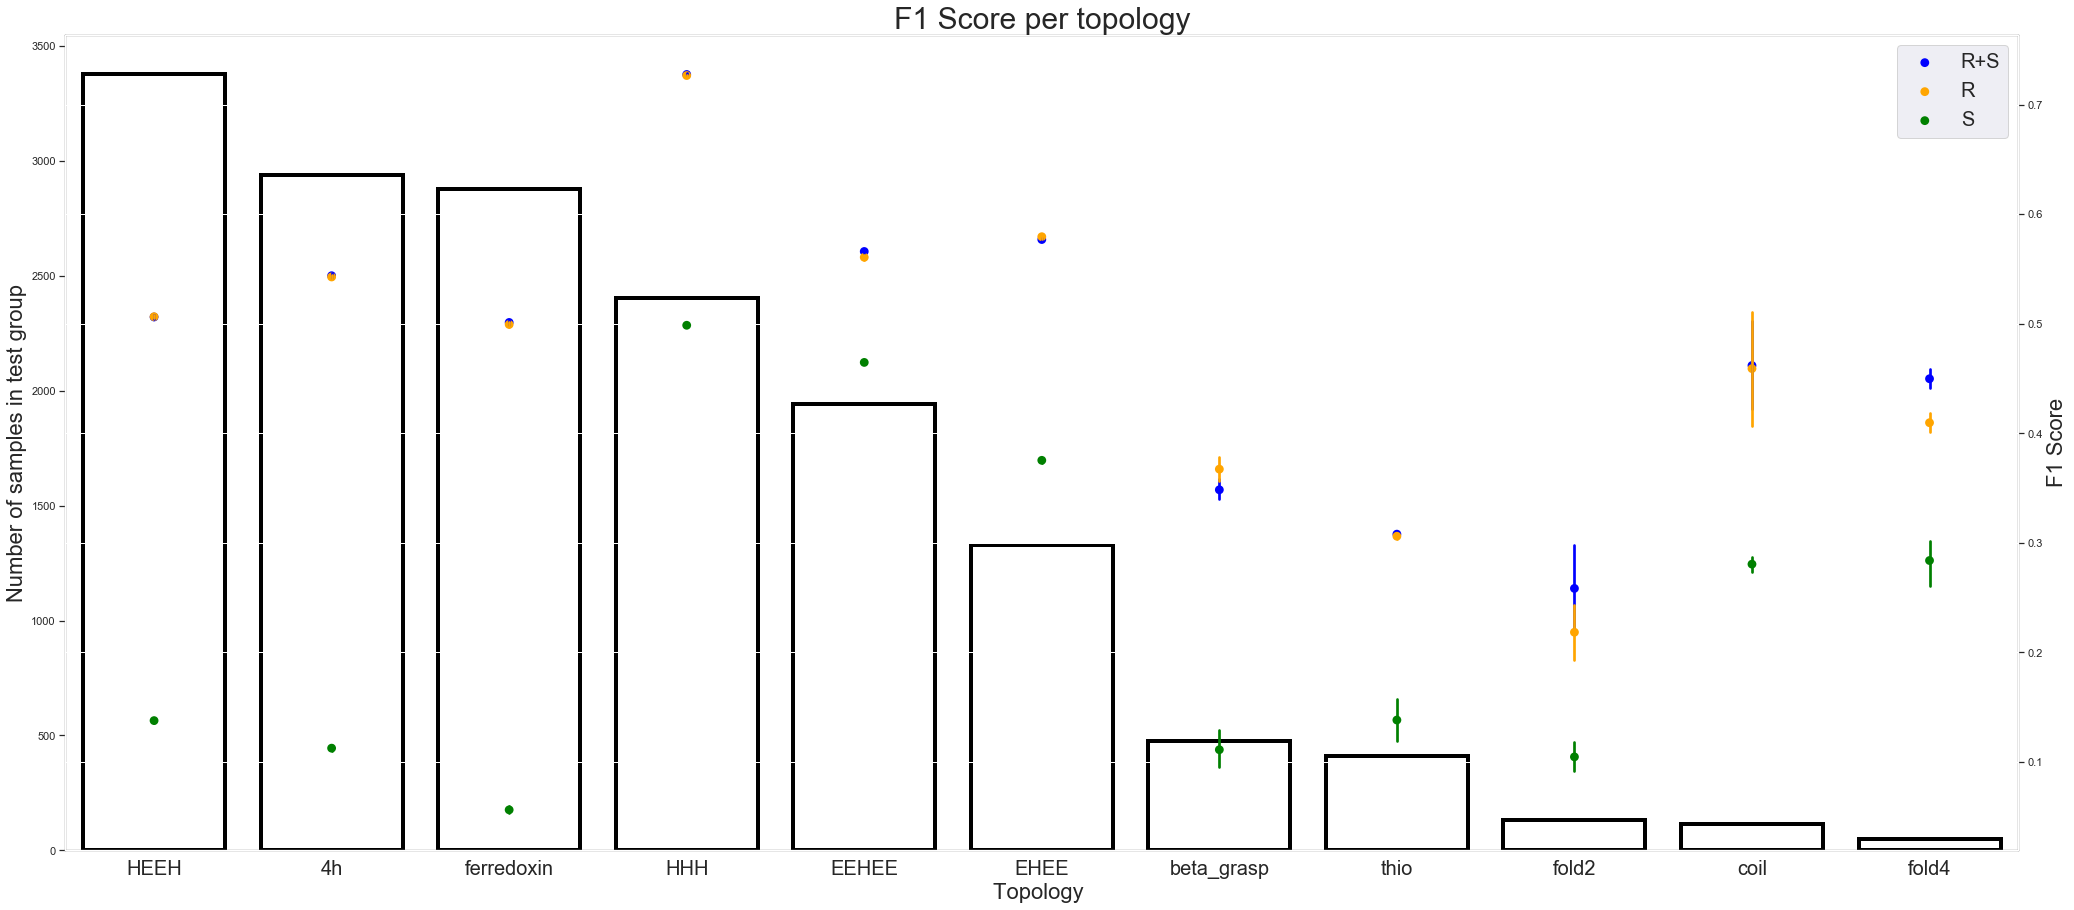

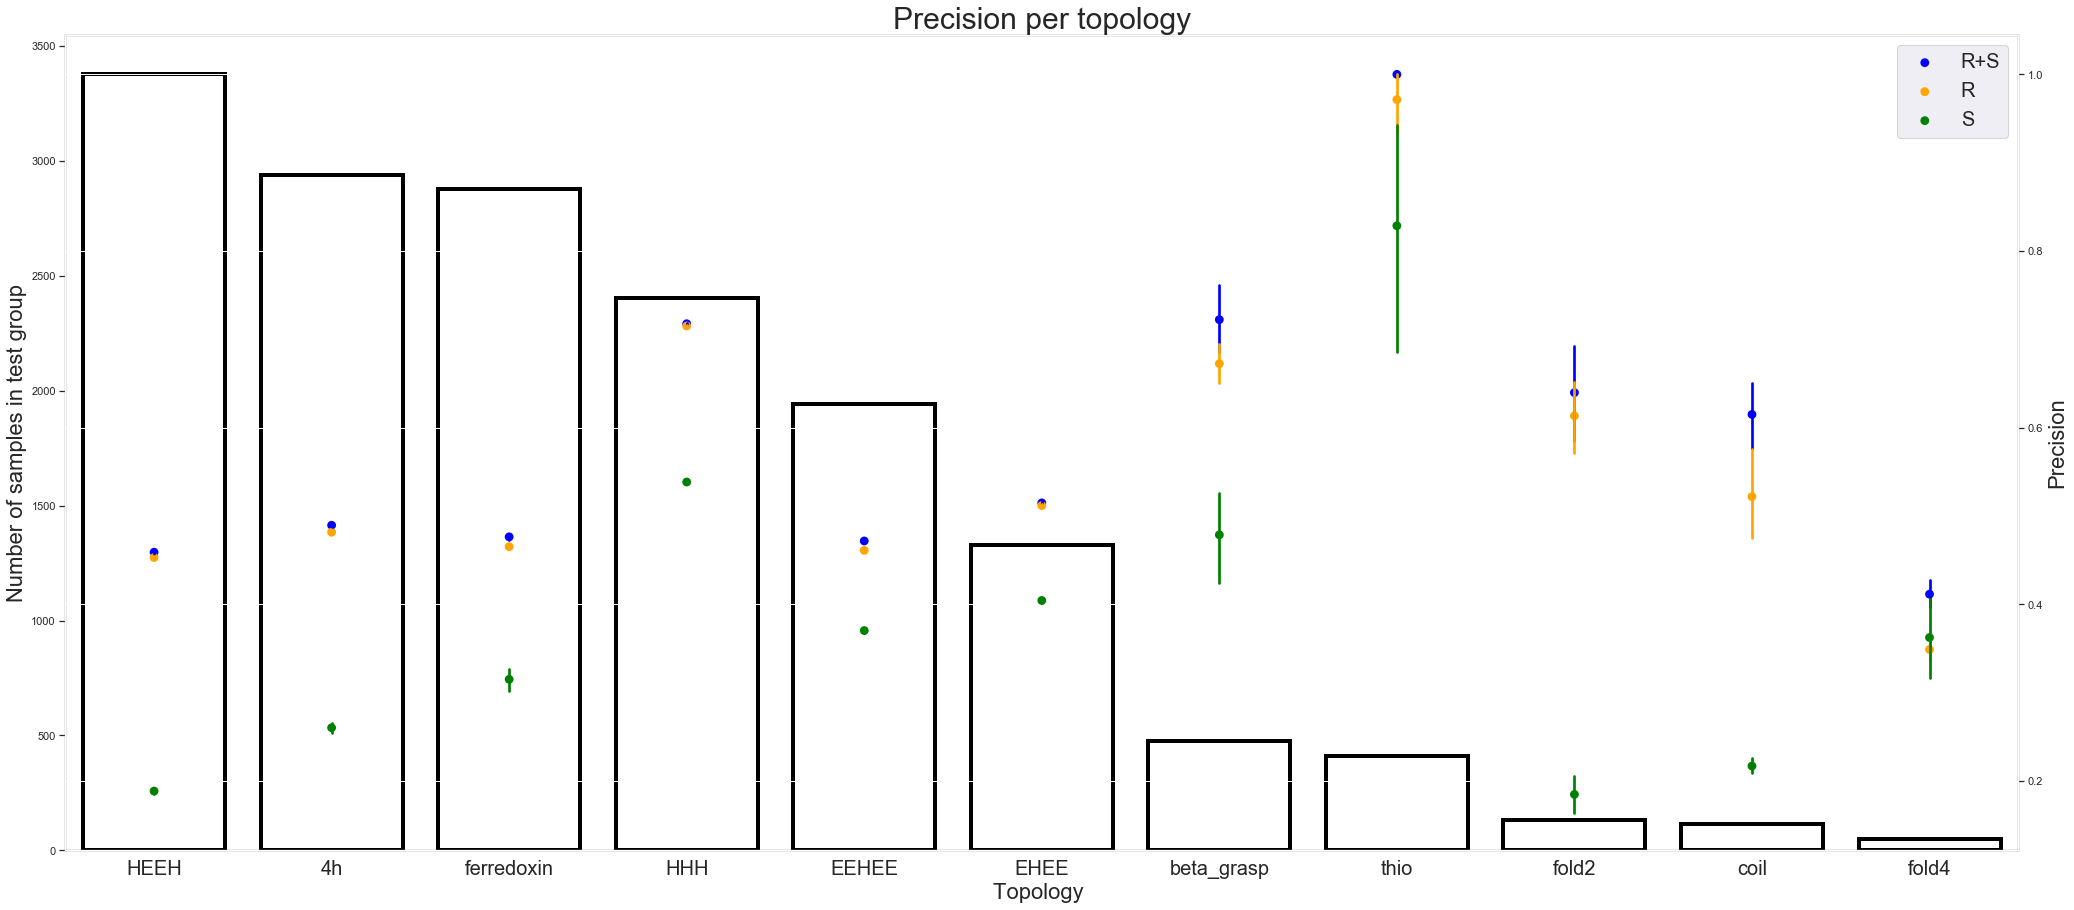

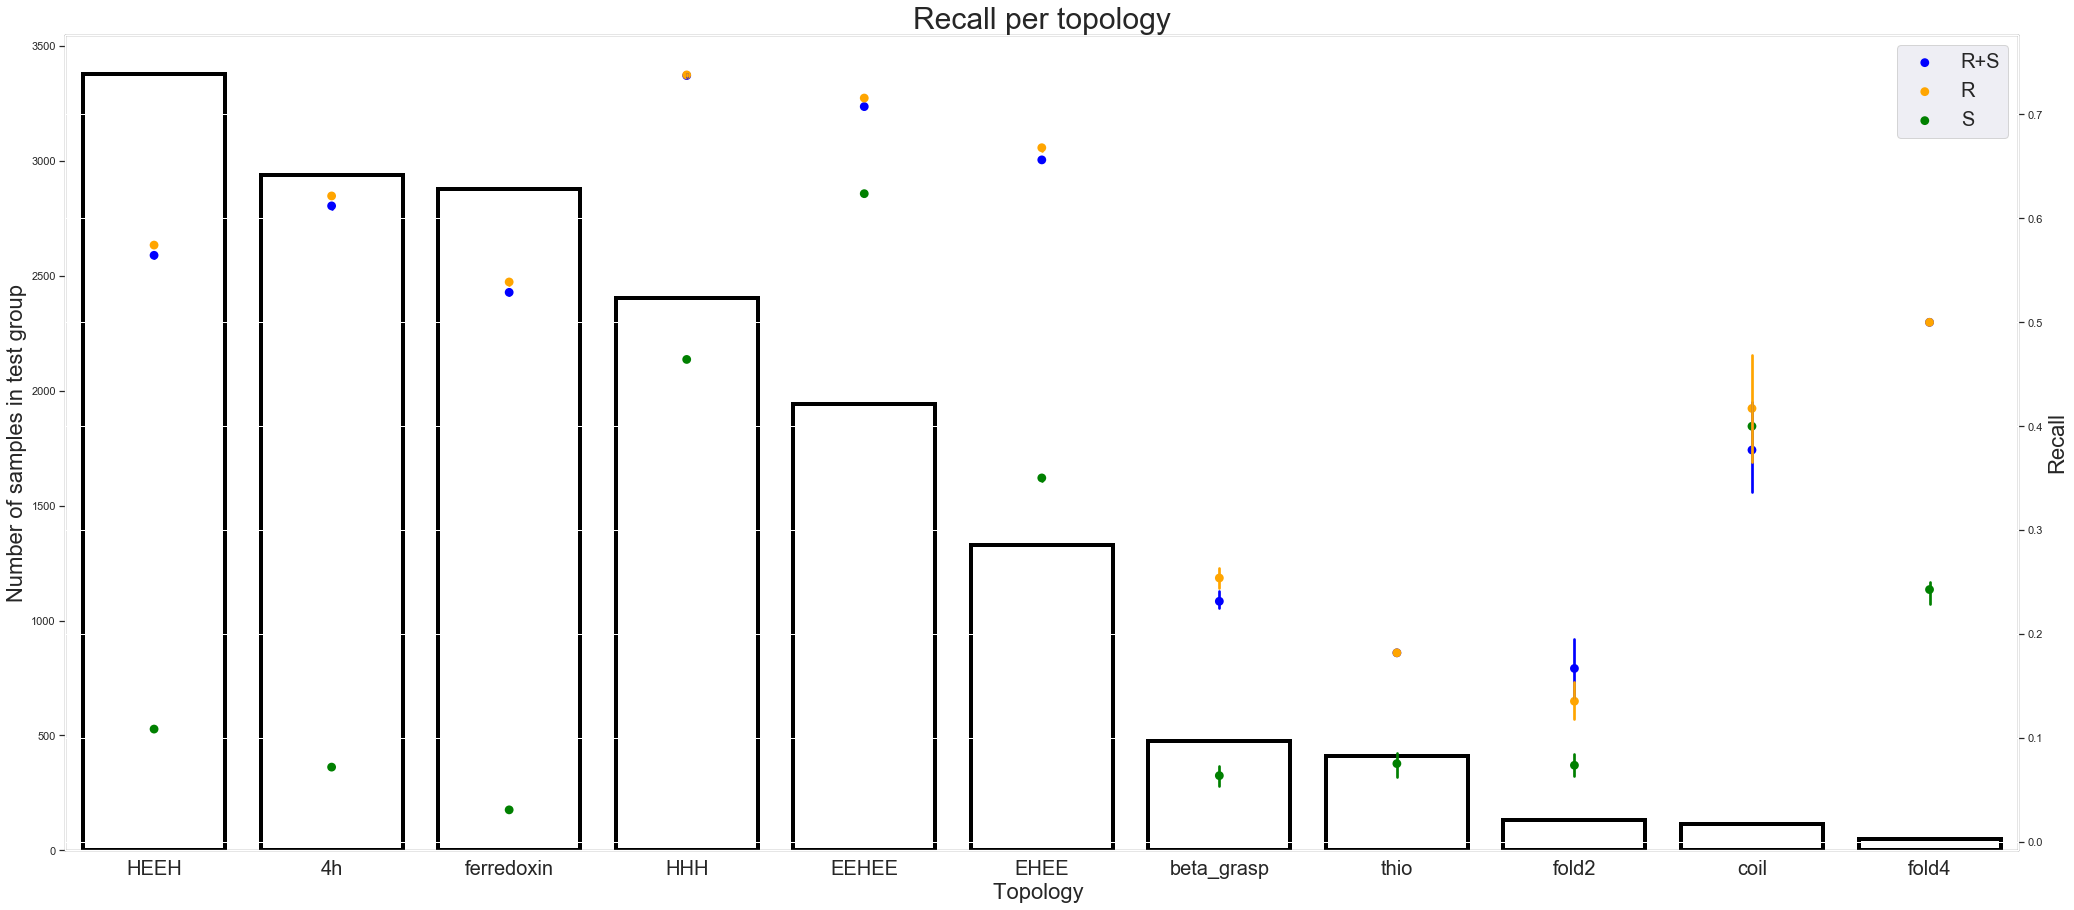

In [32]:
topology_specified_plot(df_topology)

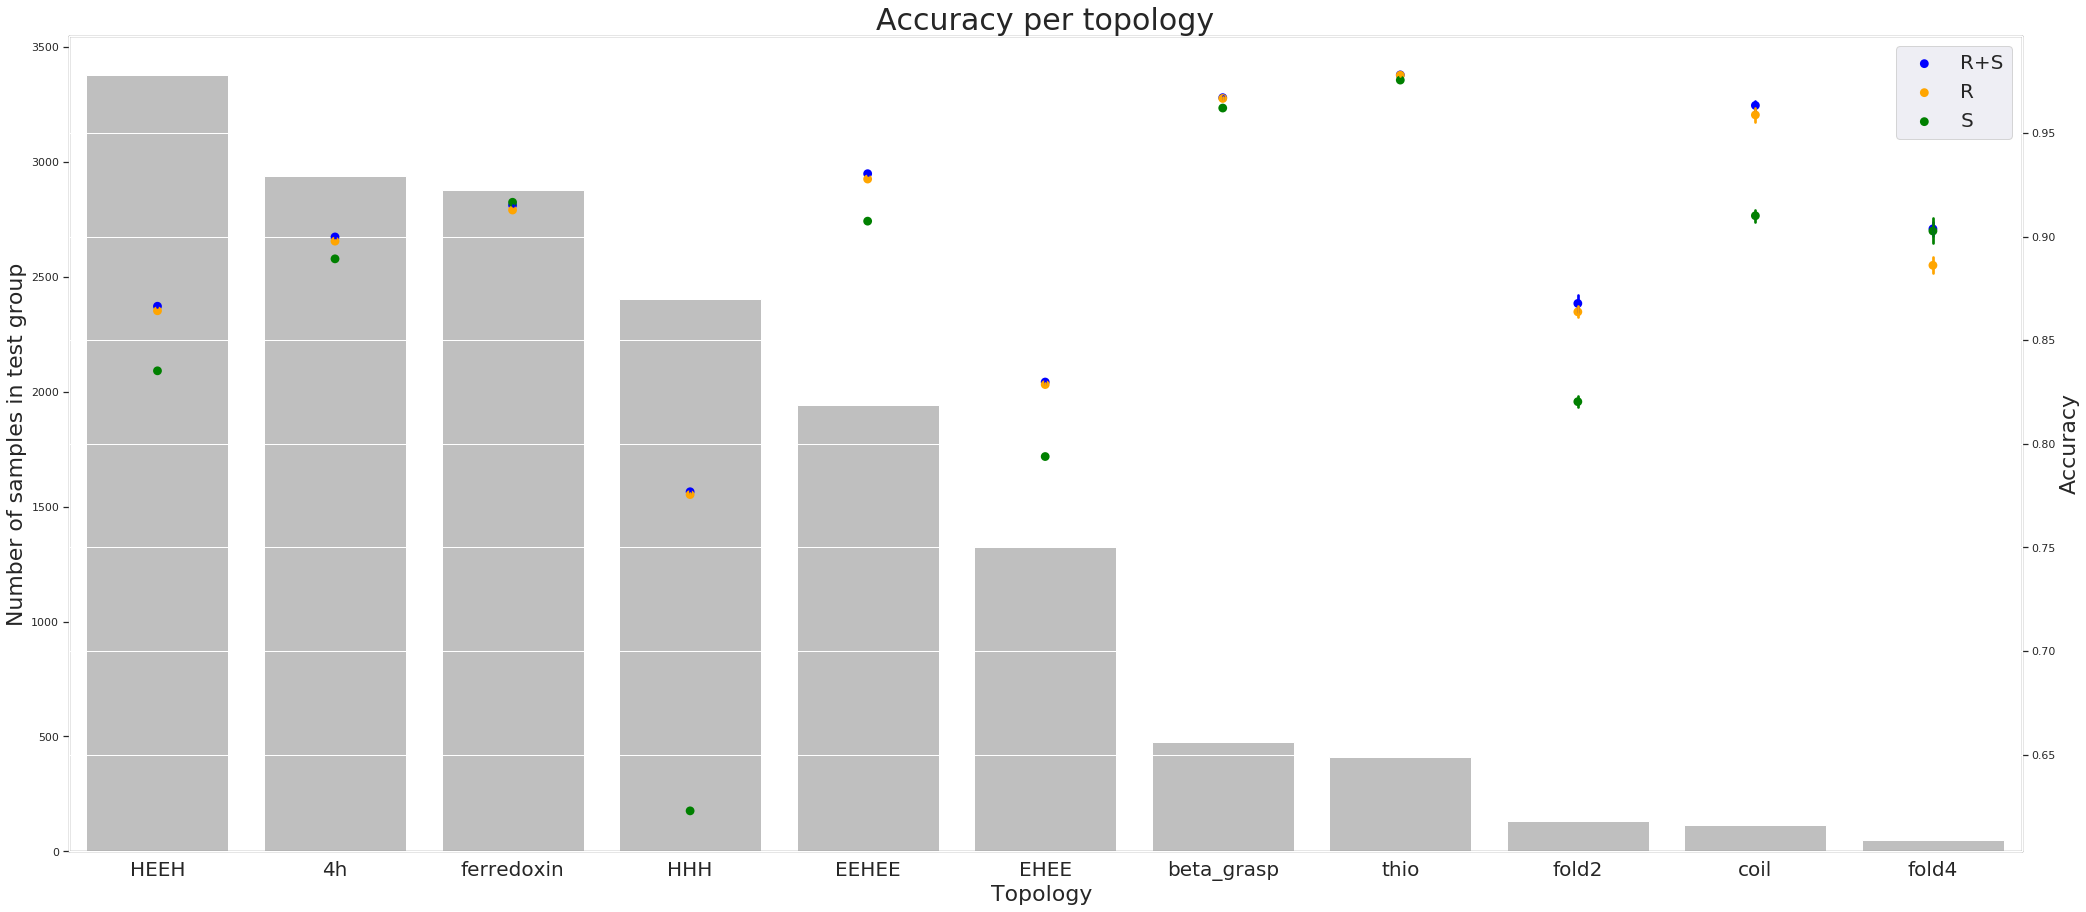

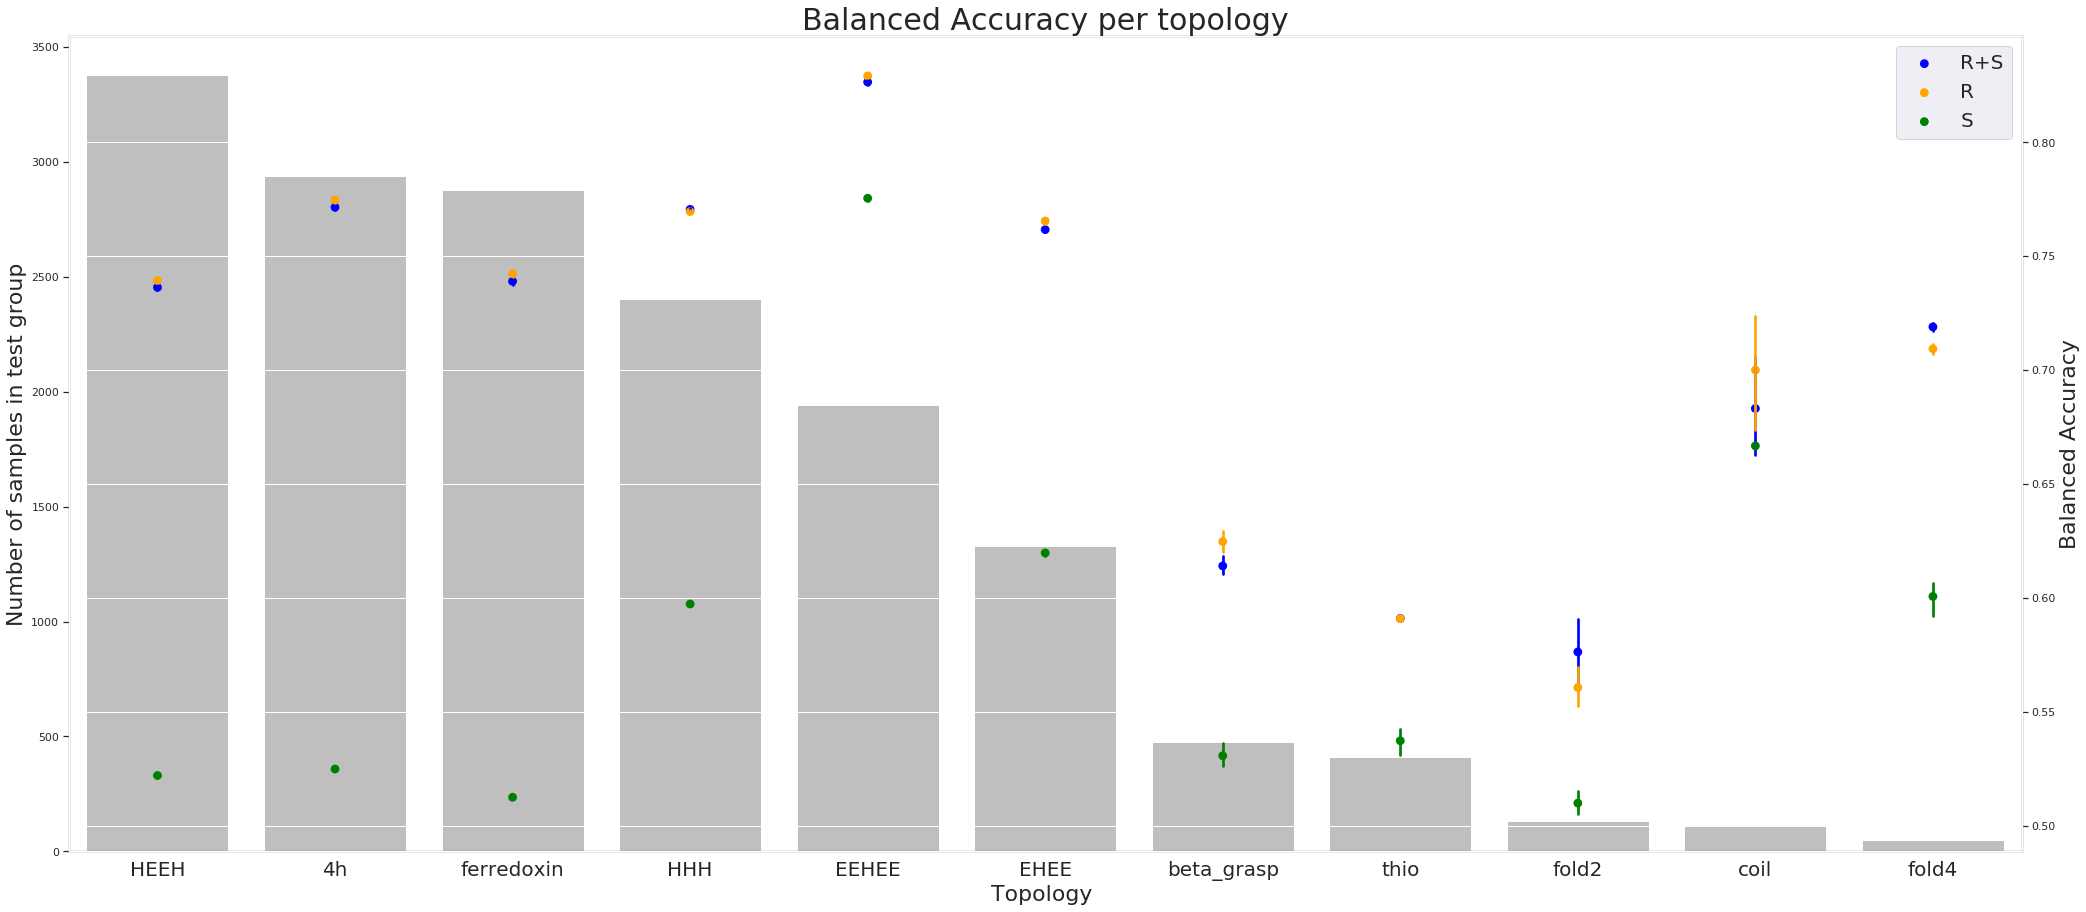

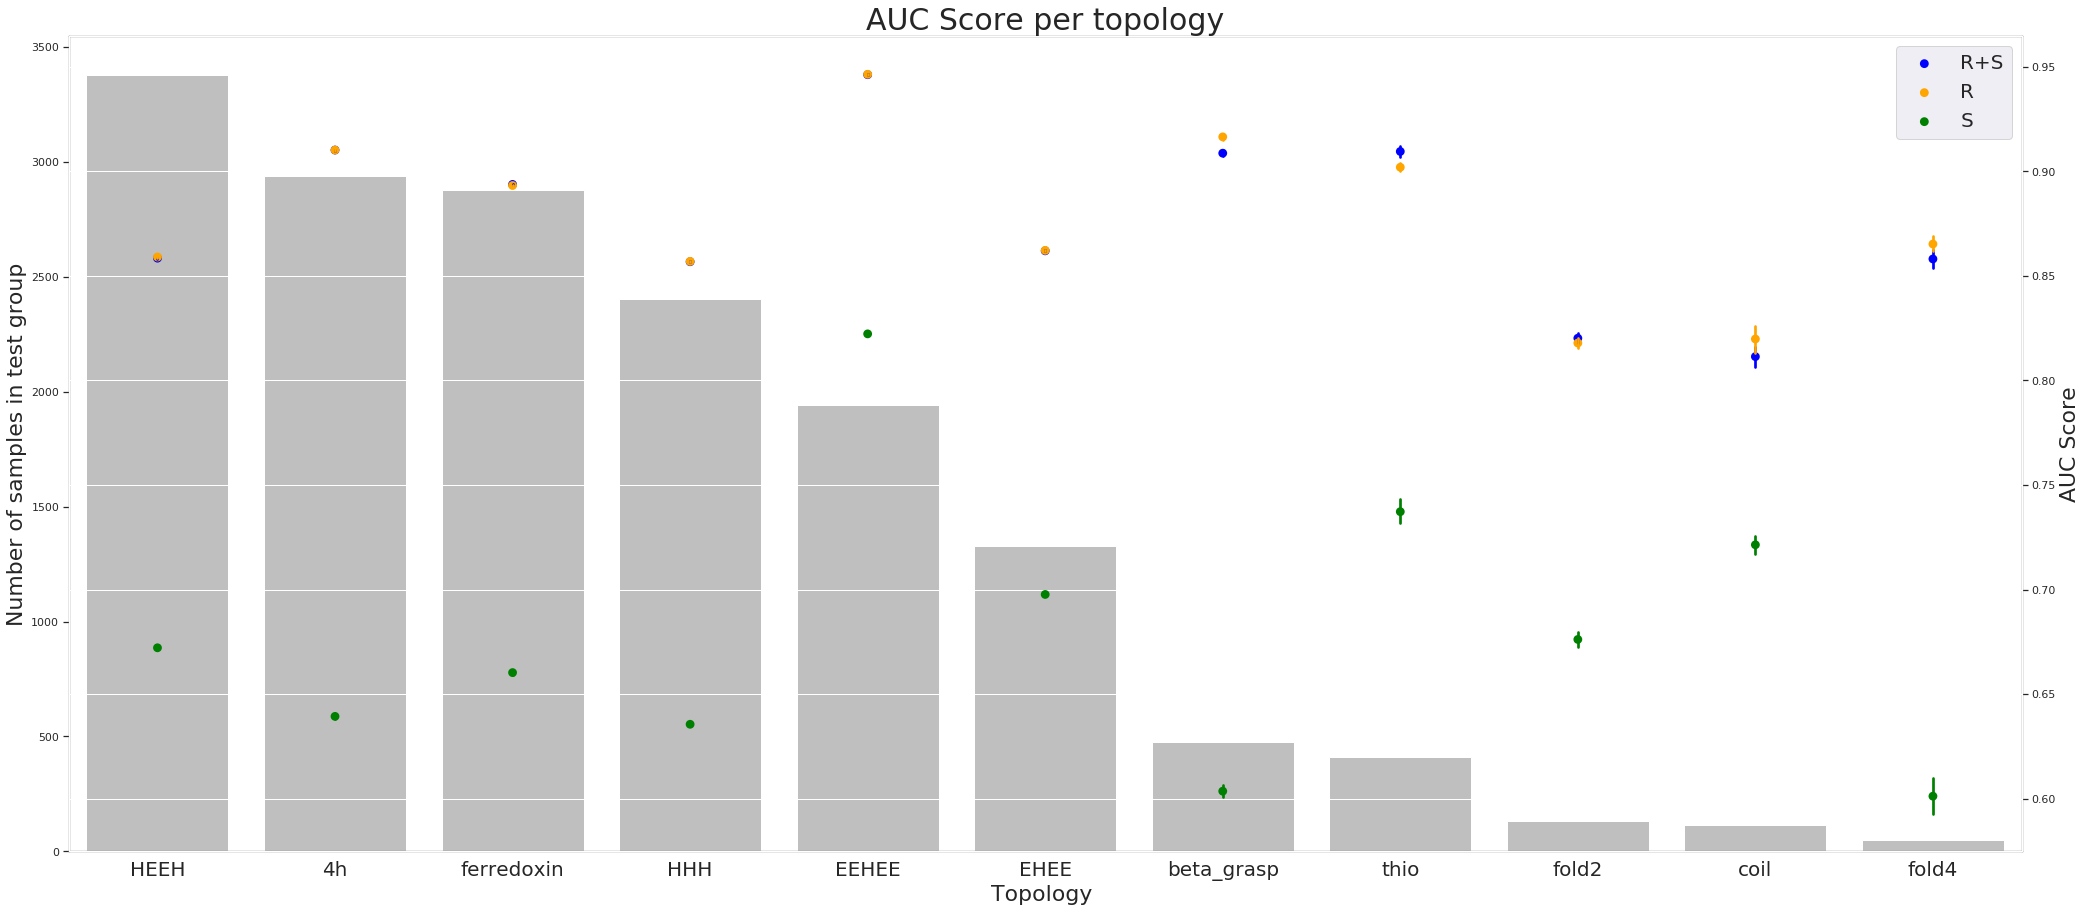

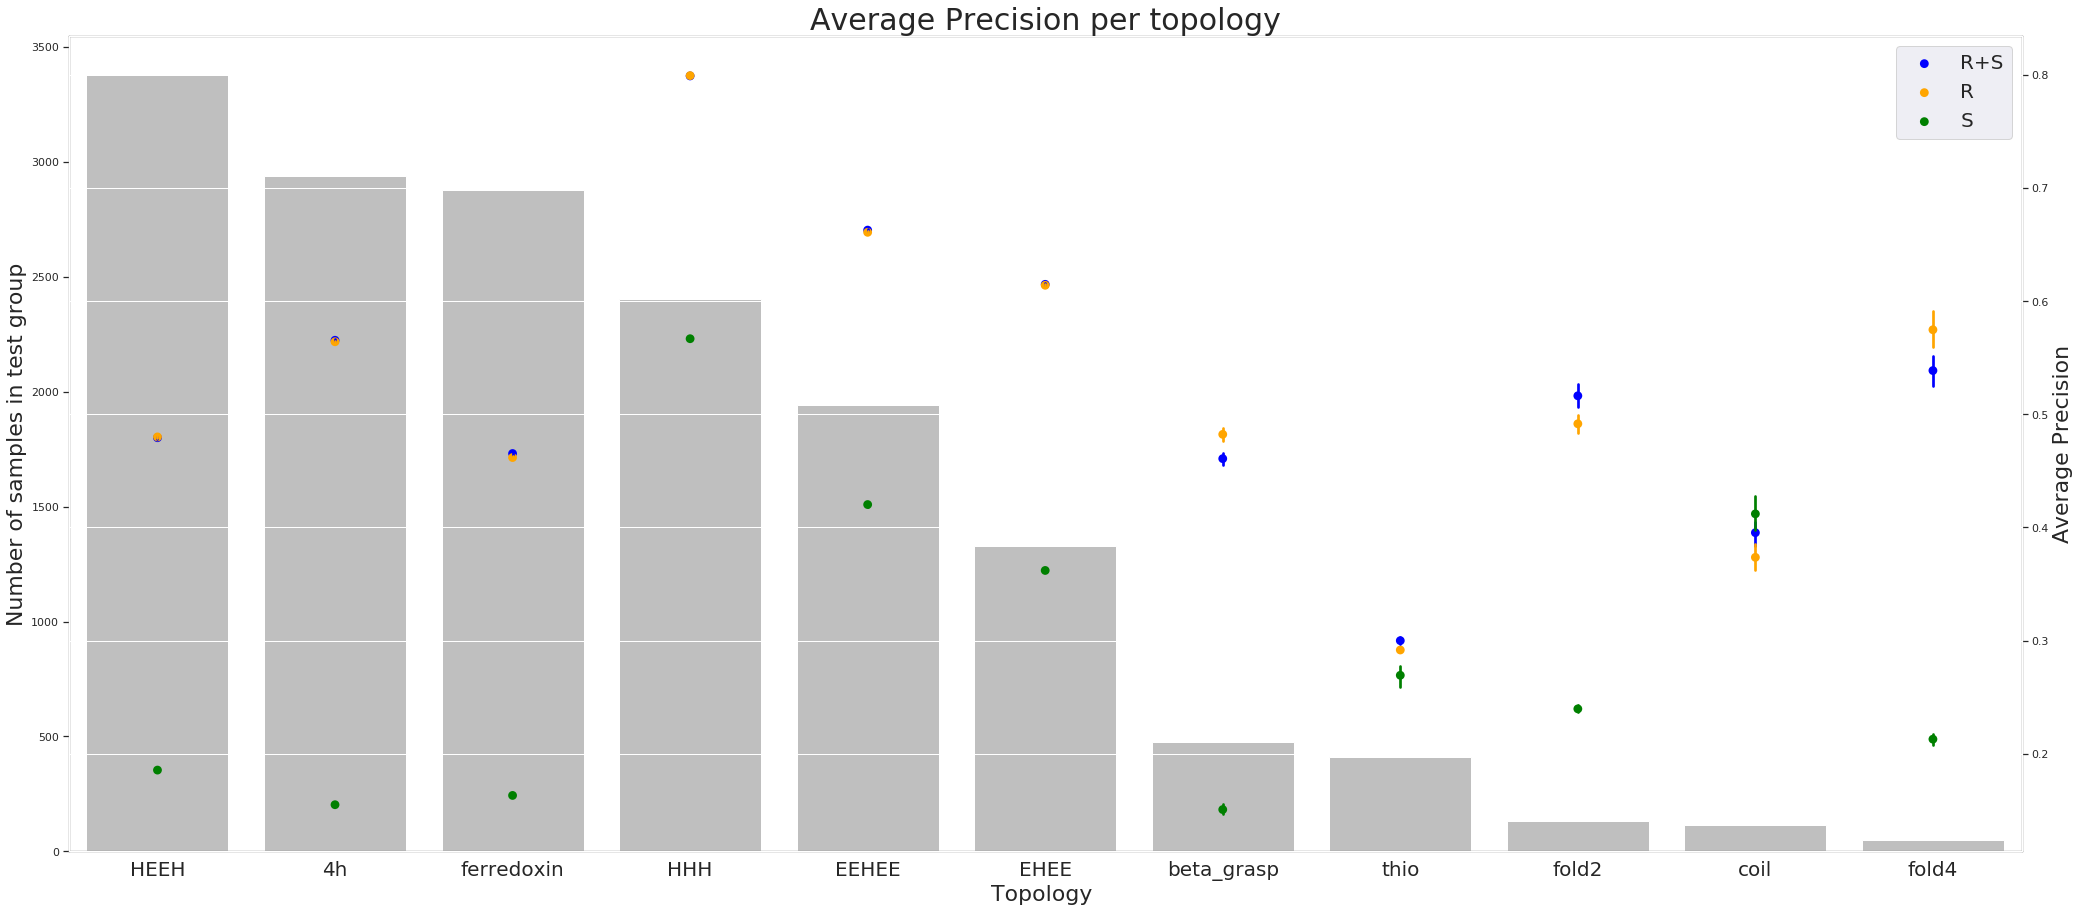

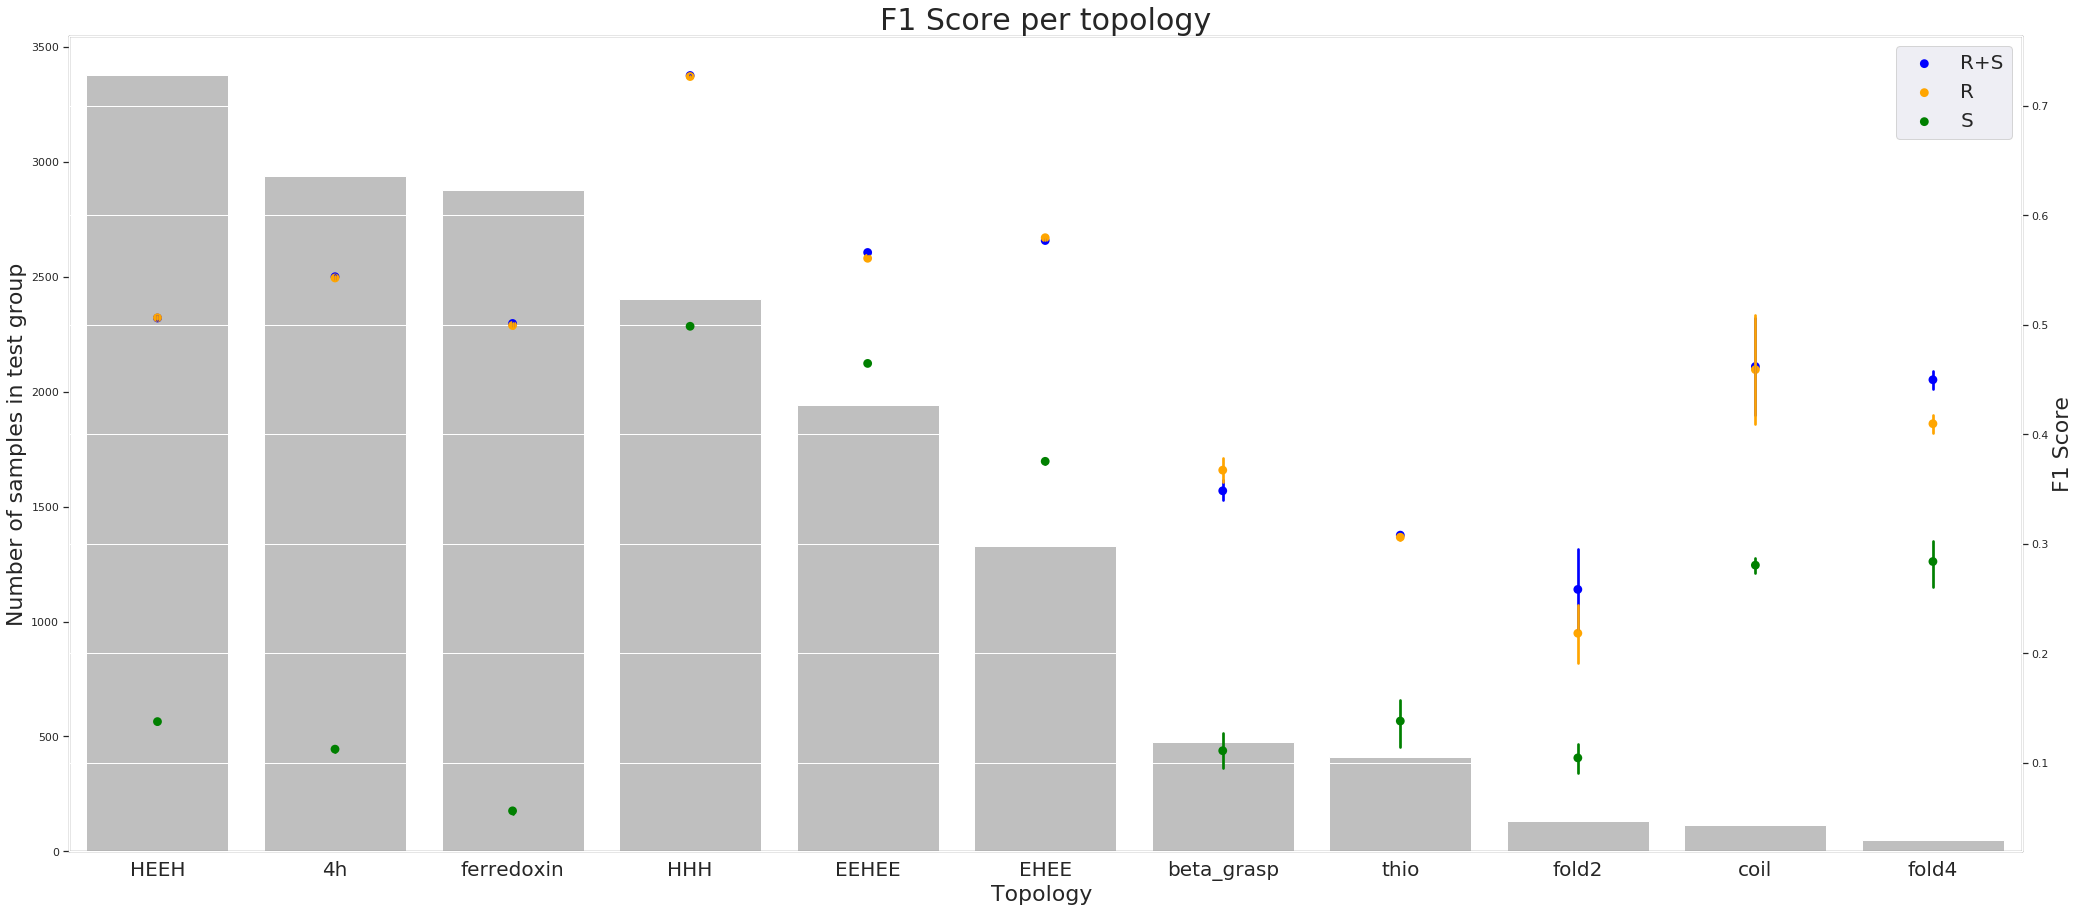

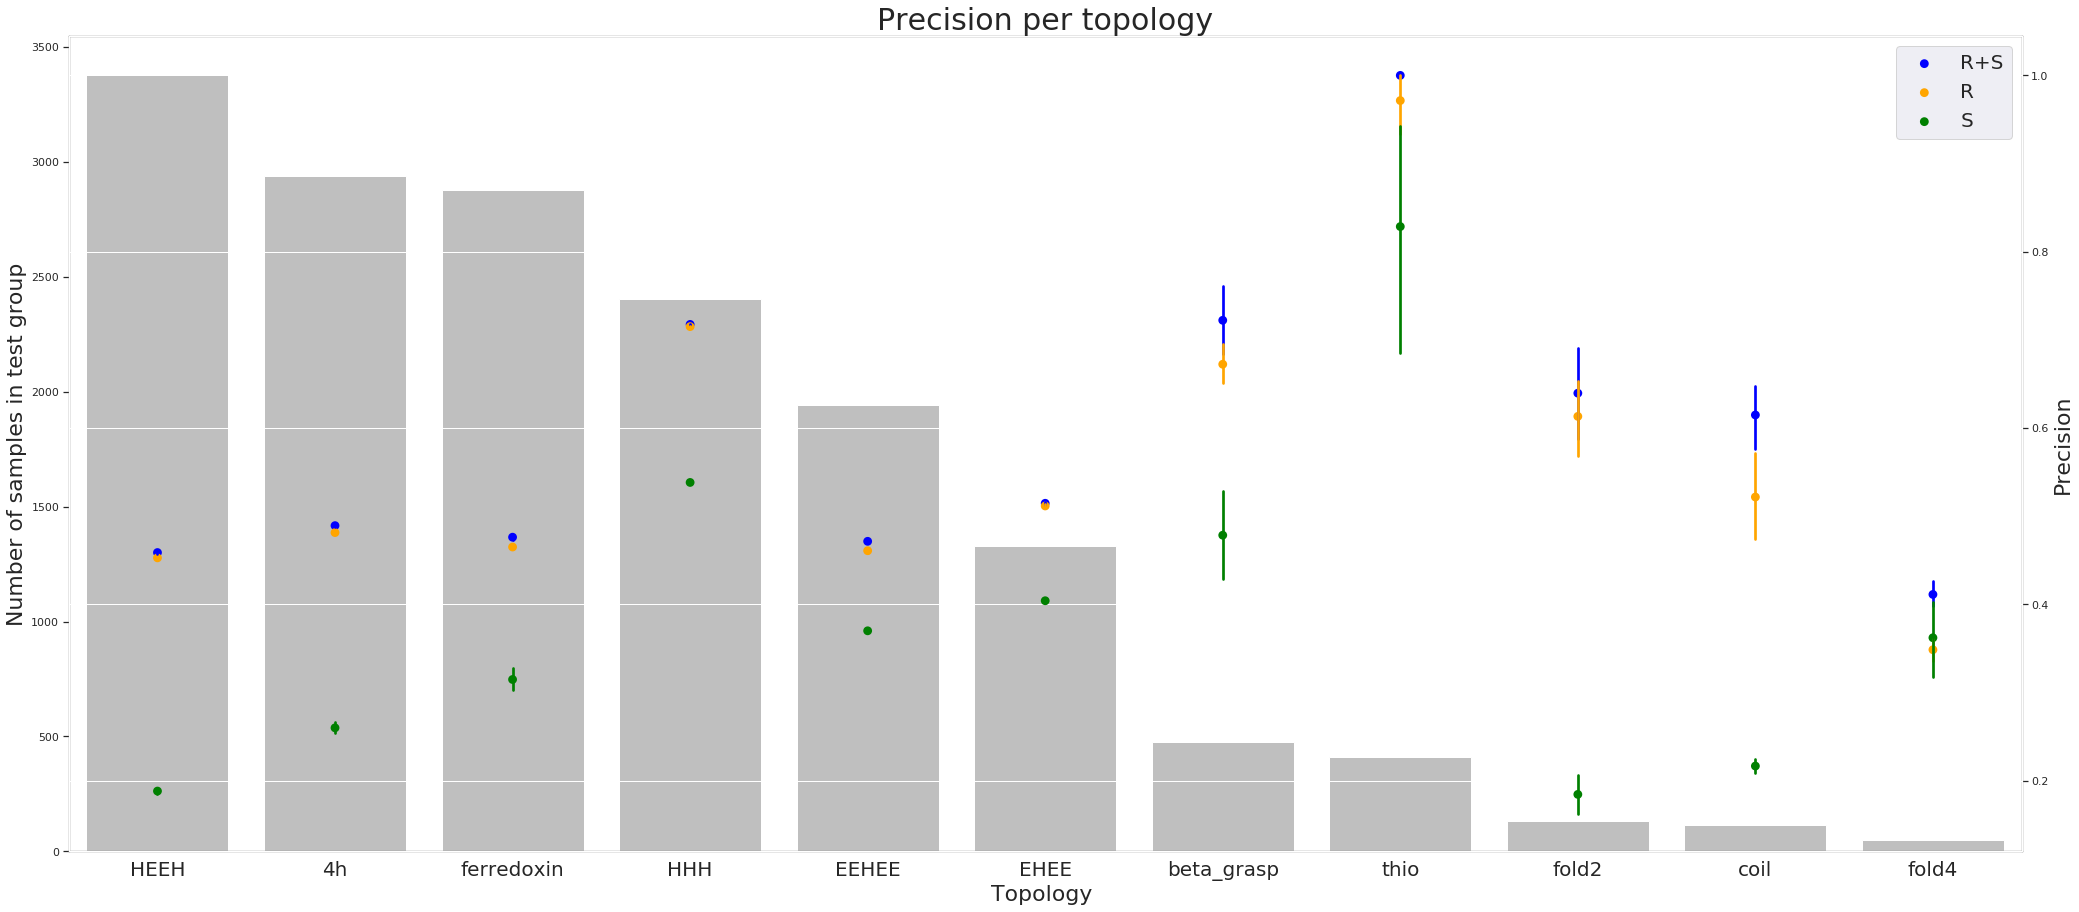

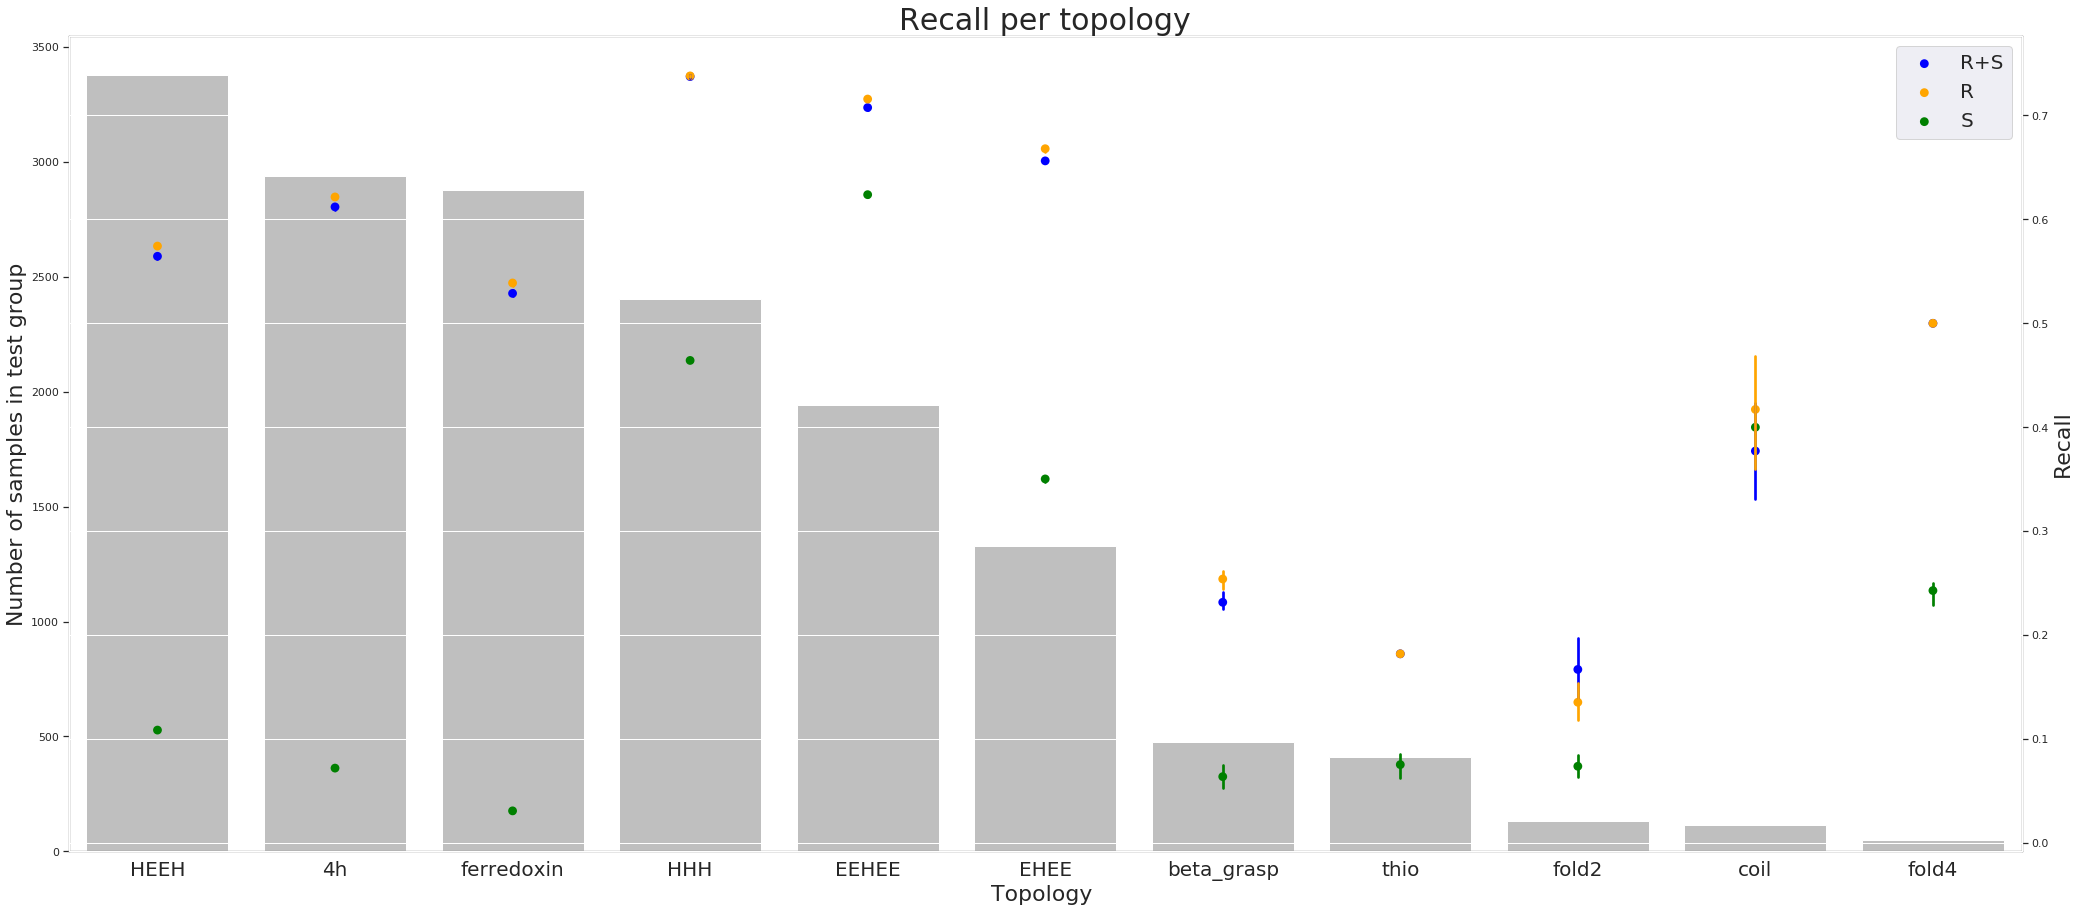

In [95]:
#visualize trends in data

top_rs = df_topology[df_topology['model']=='RS']
top_r = df_topology[df_topology['model']=='R']
top_s = df_topology[df_topology['model']=='S']



# sort dataframes for plots
top_rs = top_rs.sort_values(by='Samples In Test',ascending=False)
top_r = top_r.sort_values(by='Samples In Test',ascending=False)
top_s = top_s.sort_values(by='Samples In Test',ascending=False)

for i in range(len(clf_scores_names)):
        sns.set_style('white')

        fig,ax = plt.subplots()

        score_rs = top_rs[clf_scores_names[i]].values
        score_r = top_r[clf_scores_names[i]].values
        score_s = top_s[clf_scores_names[i]].values

        sns.set(rc={'figure.figsize':(35,15)})


        sns.barplot(x=top_rs['topology'].values,y=top_rs['Samples In Test'],ax=ax,color='.75')
        sns.barplot(x=top_r['topology'].values,y=top_r['Samples In Test'],ax=ax,color='.75')
        sns.barplot(x=top_s['topology'].values,y=top_s['Samples In Test'],ax=ax,color='.75')
        ax2 = ax.twinx()


        sns.pointplot(x=top_rs['topology'].values,y=score_rs,color='blue',join=False,scale=1)
        sns.pointplot(x=top_r['topology'].values,y=score_r,color='orange',join=False,scale=1)
        sns.pointplot(x=top_s['topology'].values,y=score_s,color='green',join=False,scale=1)


        ax2.legend(handles=ax2.collections, labels=["R+S","R","S"],prop={'size':'20'})


        plt.title("%s per topology"%clf_scores_names[i],fontsize=30)
        ax.set_xlabel("Topology ",fontsize=22)
        ax.set_xticklabels(ax2.get_xticklabels(),fontsize=20)
        plt.ylabel("%s"%clf_scores_names[i],fontsize=22)
        ax.set_ylabel("Number of samples in test group",fontsize=22)
        plt.show()
        #plt.close('all')

## Audit Results

In order to understand what the topolgy specific models are learning from, `SHAP` and `BBA` audits were used

In [96]:
pd.read_html('./estrada_runs/model_audits/fold4/test_harness_results/custom_classification_leaderboard.html')[0]

Run ID        Date      Time                    Model Name  \
0   6wvYL6qymRlG  2019-04-10  17:42:35  random_forest_classification   
1  QR8jXXVyBApY9  2019-04-10  18:00:20  random_forest_classification   
2  Q72QXjBAe8Bv1  2019-04-10  17:45:03  random_forest_classification   
3  a3ab1X5WVOjgB  2019-04-10  17:43:39  random_forest_classification   
4  QgbN2lXGz3Qg1  2019-07-03  06:22:31  random_forest_classification   
5  ErE8XRYVro1Ae  2019-06-19  17:07:37  random_forest_classification   
6  6g5ZvQzVbyG6Y  2019-04-10  17:44:35  random_forest_classification   
7  EMv2vwNMk61L8  2019-04-10  18:13:24  random_forest_classification   

  Model Author  Accuracy  Balanced Accuracy  AUC Score  Average Precision  \
0        Hamed     0.882              0.707      0.888              0.627   
1        Hamed     0.882              0.707      0.872              0.618   
2        Hamed     0.922              0.729      0.867              0.616   
3        Hamed     0.882              0.707      0.846              0.601   
4        Hamed     0.902              0.718      0.872              0.537   
5        Hamed     0.902              0.718      0.862              0.529   
6        Hamed     0.922              0.614      0.633              0.238   
7        Hamed     0.902              0.604      0.617              0.173   

   F1 Score  ...  Samples In Train  Samples In Test  \
0     0.400  ...               204               51   
1     0.400  ...               204               51   
2     0.500  ...               204               51   
3     0.400  ...               204               51   
4     0.444  ...               204               51   
5     0.444  ...               204               51   
6     0.333  ...               204               51   
7     0.286  ...               204               51   

                                   Model Description  \
0  Random Forest: n_estimators=361, max_features=...   
1  Random Forest: n_estimators=361, max_features=...   
2  Random Forest: n_estimators=361, max_features=...   
3  Random Forest: n_estimators=361, max_features=...   
4  Random Forest: n_estimators=361, max_features=...   
5  Random Forest: n_estimators=361, max_features=...   
6  Random Forest: n_estimators=361, max_features=...   
7  Random Forest: n_estimators=361, max_features=...   

                         Column Predicted Num Features Used  \
0  stabilityscore_cnn_calibrated_2classes               130   
1  stabilityscore_cnn_calibrated_2classes               113   
2  stabilityscore_cnn_calibrated_2classes               130   
3  stabilityscore_cnn_calibrated_2classes               113   
4  stabilityscore_cnn_calibrated_2classes               130   
5  stabilityscore_cnn_calibrated_2classes               130   
6  stabilityscore_cnn_calibrated_2classes                17   
7  stabilityscore_cnn_calibrated_2classes                17   

  Data and Split Description  Normalized Num Features Normalized  \
0                   RS fold4        True                     130   
1                    R fold4        True                     113   
2                   RS fold4        True                     130   
3                    R fold4        True                     113   
4                   RS fold4        True                     130   
5                   RS fold4        True                     130   
6                    S fold4        True                      17   
7                    S fold4        True                      17   

   Feature Extraction  Was Untested Data Predicted  
0          shap_audit                        False  
1           bba_audit                        False  
2           bba_audit                        False  
3          shap_audit                        False  
4           bba_audit                        False  
5          shap_audit                        False  
6          shap_audit                        False  
7           bba_audit                        False  

[8 rows

In [97]:
shap_4h_rs = pd.read_csv('./estrada_runs/model_audits/fold4/test_harness_results/runs/run_6wvYL6qymRlG/feature_importances.csv')
shap_4h_rs[shap_4h_rs['Feature'].isin(entropy_features)]

Feature  Importance
19     Mean_E_entropy    0.002793
27     SumL_entropies    0.001802
34     SumE_entropies    0.001346
35               S_PC    0.001206
39     Mean_H_entropy    0.000956
49      E_min_entropy    0.000692
51   Mean_res_entropy    0.000640
53      H_min_entropy    0.000629
56      H_max_entropy    0.000581
82     SumH_entropies    0.000276
83      E_max_entropy    0.000268
88      L_max_entropy    0.000189
94    L_range_entropy    0.000152
97    E_range_entropy    0.000123
100    Mean_L_entropy    0.000112
106     L_min_entropy    0.000036
107   H_range_entropy    0.000034

In [98]:
bba_4h_rs = pd.read_csv('./estrada_runs/model_audits/fold4/test_harness_results/runs/run_Q72QXjBAe8Bv1/feature_importances.csv')
bba_4h_rs[bba_4h_rs['Feature'].isin(entropy_features)]

Feature  Importance
91               S_PC    0.019608
92     Mean_H_entropy    0.019608
93     Mean_L_entropy    0.019608
94     Mean_E_entropy    0.019608
95   Mean_res_entropy    0.019608
96     SumH_entropies    0.019608
97     SumL_entropies    0.019608
98     SumE_entropies    0.019608
99      H_max_entropy    0.019608
100     H_min_entropy    0.019608
101   H_range_entropy    0.019608
102     L_min_entropy    0.019608
103   L_range_entropy    0.019608
104     E_max_entropy    0.019608
105     E_min_entropy    0.019608
115   E_range_entropy    0.011765
127     L_max_entropy    0.000000

In [99]:
# as per bba audit, there are trend groups in the data (found in summary.txt in the run folder)
trend_groups_4h_rs = [
    ['AlaCount', 'frac_helix', 'hbond_sc', 'hxl_tors', 'n_polar_core', 'nearest_chymo_cut_to_Nterm', 'L_max_entropy'],
    ['omega'], 
    ['T1_absq', 'Tend_absq', 'Tend_netq', 'Tminus1_absq', 'avg_best_frag', 'bb', 'buns_bb_heavy', 'buried_np', 'buried_over_exposed', 'contig_not_hp_avg', 'contig_not_hp_internal_max', 'contig_not_hp_max', 'degree', 'exposed_hydrophobics', 'exposed_np_AFILMVWY', 'exposed_polars', 'fa_atr', 'fa_atr_per_res', 'fa_dun_dev', 'fa_dun_rot', 'fa_dun_semi', 'fa_intra_elec', 'fa_intra_rep_xover4', 'fa_intra_sol_xover4', 'fa_rep', 'fa_rep_per_res', 'frac_sheet', 'hbond_lr_bb', 'hbond_lr_bb_per_sheet', 'hbond_sr_bb_per_helix', 'helix_sc', 'holes', 'hphob_sc_degree', 'hydrophobicity', 'lk_ball', 'lk_ball_bridge', 'lk_ball_bridge_uncpl', 'loop_sc', 'mismatch_probability', 'n_charged', 'n_hphob_clusters', 'nearest_chymo_cut_to_term', 'nearest_tryp_cut_to_Nterm', 'net_atr_net_sol_per_res', 'net_atr_per_res', 'net_sol_per_res', 'netcharge', 'nres_loop', 'one_core_each', 'percent_core_SASA', 'percent_core_SCN', 'rama_prepro', 'ref', 'res_count_core_SASA', 'res_count_core_SCN', 'score_per_res', 'ss_sc', 'sum_best_frags', 'total_score', 'worst6frags', 'worstfrag', 'S_PC', 'Mean_L_entropy', 'Mean_E_entropy', 'Mean_res_entropy', 'SumH_entropies', 'SumL_entropies', 'H_max_entropy', 'H_min_entropy', 'L_min_entropy', 'E_max_entropy', 'E_min_entropy'], ['chymo_cut_sites', 'contig_not_hp_avg_norm', 'fa_elec', 'fa_intra_atr_xover4', 'n_hydrophobic_noA', 'tryp_cut_sites'],
    ['buried_np_AFILMVWY_per_res', 'n_res'], 
    ['two_core_each'], 
    ['buried_np_AFILMVWY', 'contact_all', 'contact_core_SASA', 'contact_core_SCN', 'nres'],
    ['n_hydrophobic'],
    ['buried_np_per_res'], 
    ['largest_hphob_cluster'],
    ['buns_nonheavy', 'nres_sheet'],
    ['hbond_bb_sc'],
    ['buried_minus_exposed'], 
    ['fxn_exposed_is_np', 'H_range_entropy'],
    ['abego_res_profile', 'nres_helix', 'p_aa_pp'],
    ['frac_loop'],
    ['Mean_H_entropy'],
    ['avg_all_frags', 'L_range_entropy'],
    ['fa_sol'],
    ['hbond_sr_bb'],
    ['hphob_sc_contacts'],
    ['chymo_with_LM_cut_sites'], 
    ['lk_ball_iso'],
    ['SumE_entropies'], 
    ['T1_netq'],
    ['abego_res_profile_penalty', 'nearest_tryp_cut_to_term'],
    ['nearest_tryp_cut_to_Cterm'],
    ['Tminus1_netq', 'pack'],
    ['E_range_entropy'],
    ['buns_sc_heavy', 'exposed_total'],
    ['ss_contributes_core'],
    ['pro_close'],
    ['dslf_fa13', 'entropy'],
    ['nearest_chymo_cut_to_Cterm']
]


length_of_trend_groups = [len(i) for i in trend_groups_4h_rs]

In [100]:
print(trend_groups_4h_rs[2]) # largest trend group, has 72 features in it

['T1_absq', 'Tend_absq', 'Tend_netq', 'Tminus1_absq', 'avg_best_frag', 'bb', 'buns_bb_heavy', 'buried_np', 'buried_over_exposed', 'contig_not_hp_avg', 'contig_not_hp_internal_max', 'contig_not_hp_max', 'degree', 'exposed_hydrophobics', 'exposed_np_AFILMVWY', 'exposed_polars', 'fa_atr', 'fa_atr_per_res', 'fa_dun_dev', 'fa_dun_rot', 'fa_dun_semi', 'fa_intra_elec', 'fa_intra_rep_xover4', 'fa_intra_sol_xover4', 'fa_rep', 'fa_rep_per_res', 'frac_sheet', 'hbond_lr_bb', 'hbond_lr_bb_per_sheet', 'hbond_sr_bb_per_helix', 'helix_sc', 'holes', 'hphob_sc_degree', 'hydrophobicity', 'lk_ball', 'lk_ball_bridge', 'lk_ball_bridge_uncpl', 'loop_sc', 'mismatch_probability', 'n_charged', 'n_hphob_clusters', 'nearest_chymo_cut_to_term', 'nearest_tryp_cut_to_Nterm', 'net_atr_net_sol_per_res', 'net_atr_per_res', 'net_sol_per_res', 'netcharge', 'nres_loop', 'one_core_each', 'percent_core_SASA', 'percent_core_SCN', 'rama_prepro', 'ref', 'res_count_core_SASA', 'res_count_core_SCN', 'score_per_res', 'ss_sc', 'su

In [101]:
shap_HHH_rs = pd.read_csv('./estrada_runs/slurm-files/model_audits/HHH/test_harness_results/runs/run_QW871BgDB3jZ3/feature_importances.csv')
shap_HHH_rs[shap_HHH_rs['Feature'].isin(entropy_features)]


Feature  Importance
60      L_min_entropy    0.001352
62    L_range_entropy    0.001048
67     SumL_entropies    0.000888
70               S_PC    0.000797
72   Mean_res_entropy    0.000786
74     Mean_L_entropy    0.000757
78     SumH_entropies    0.000602
80      H_min_entropy    0.000586
83      H_max_entropy    0.000560
88     Mean_H_entropy    0.000463
91    H_range_entropy    0.000355
99      L_max_entropy    0.000277
125    Mean_E_entropy    0.000000
126    SumE_entropies    0.000000
127     E_max_entropy    0.000000
128     E_min_entropy    0.000000
129   E_range_entropy    0.000000

In [102]:
shap_ferr_rs = pd.read_csv('./estrada_runs/slurm-files/model_audits/ferredoxin/test_harness_results/runs/run_ENmmaLObJ65OM/feature_importances.csv')
shap_ferr_rs[shap_ferr_rs['Feature'].isin(entropy_features)]

Feature  Importance
41     SumL_entropies    0.001367
53     Mean_L_entropy    0.001063
66      H_max_entropy    0.000800
67      E_max_entropy    0.000798
71    H_range_entropy    0.000754
76      L_min_entropy    0.000631
78      H_min_entropy    0.000615
79      E_min_entropy    0.000610
85     Mean_H_entropy    0.000546
86   Mean_res_entropy    0.000526
90      L_max_entropy    0.000489
92               S_PC    0.000469
93    L_range_entropy    0.000468
98    E_range_entropy    0.000423
100    SumH_entropies    0.000416
103    Mean_E_entropy    0.000409
107    SumE_entropies    0.000364

In [103]:
bba_ferr_rs = pd.read_csv('./estrada_runs/slurm-files/model_audits/ferredoxin/test_harness_results/runs/run_agp2dMPjVNwpB/feature_importances.csv')
bba_ferr_rs[bba_ferr_rs['Feature'].isin(entropy_features)]

Feature  Importance
101              S_PC    0.033507
102    Mean_H_entropy    0.033507
103    Mean_L_entropy    0.033507
104    Mean_E_entropy    0.033507
105  Mean_res_entropy    0.033507
106    SumH_entropies    0.033507
107    SumL_entropies    0.033507
108    SumE_entropies    0.033507
109     H_max_entropy    0.033507
110     H_min_entropy    0.033507
111   H_range_entropy    0.033507
112     L_max_entropy    0.033507
113     L_min_entropy    0.033507
114   L_range_entropy    0.033507
115     E_max_entropy    0.033507
116     E_min_entropy    0.033507
117   E_range_entropy    0.033507

In [104]:
dataframe_bba = bba_ferr_rs
dataframe_shap = shap_ferr_rs


# dataframe_bba = dataframe_bba.sort_values(by='Feature')
# dataframe_shap = dataframe_shap.sort_values(by='Feature')
dataframe_bba = dataframe_bba.rename(columns={'Importance':'Importance BBA'})
dataframe_shap = dataframe_shap.rename(columns={'Importance':'Importance SHAP'})

merged_dataframe = pd.merge(dataframe_bba,dataframe_shap,on='Feature')
merged_dataframe['is_rosetta'] = merged_dataframe['Feature'].isin(rosetta_features)

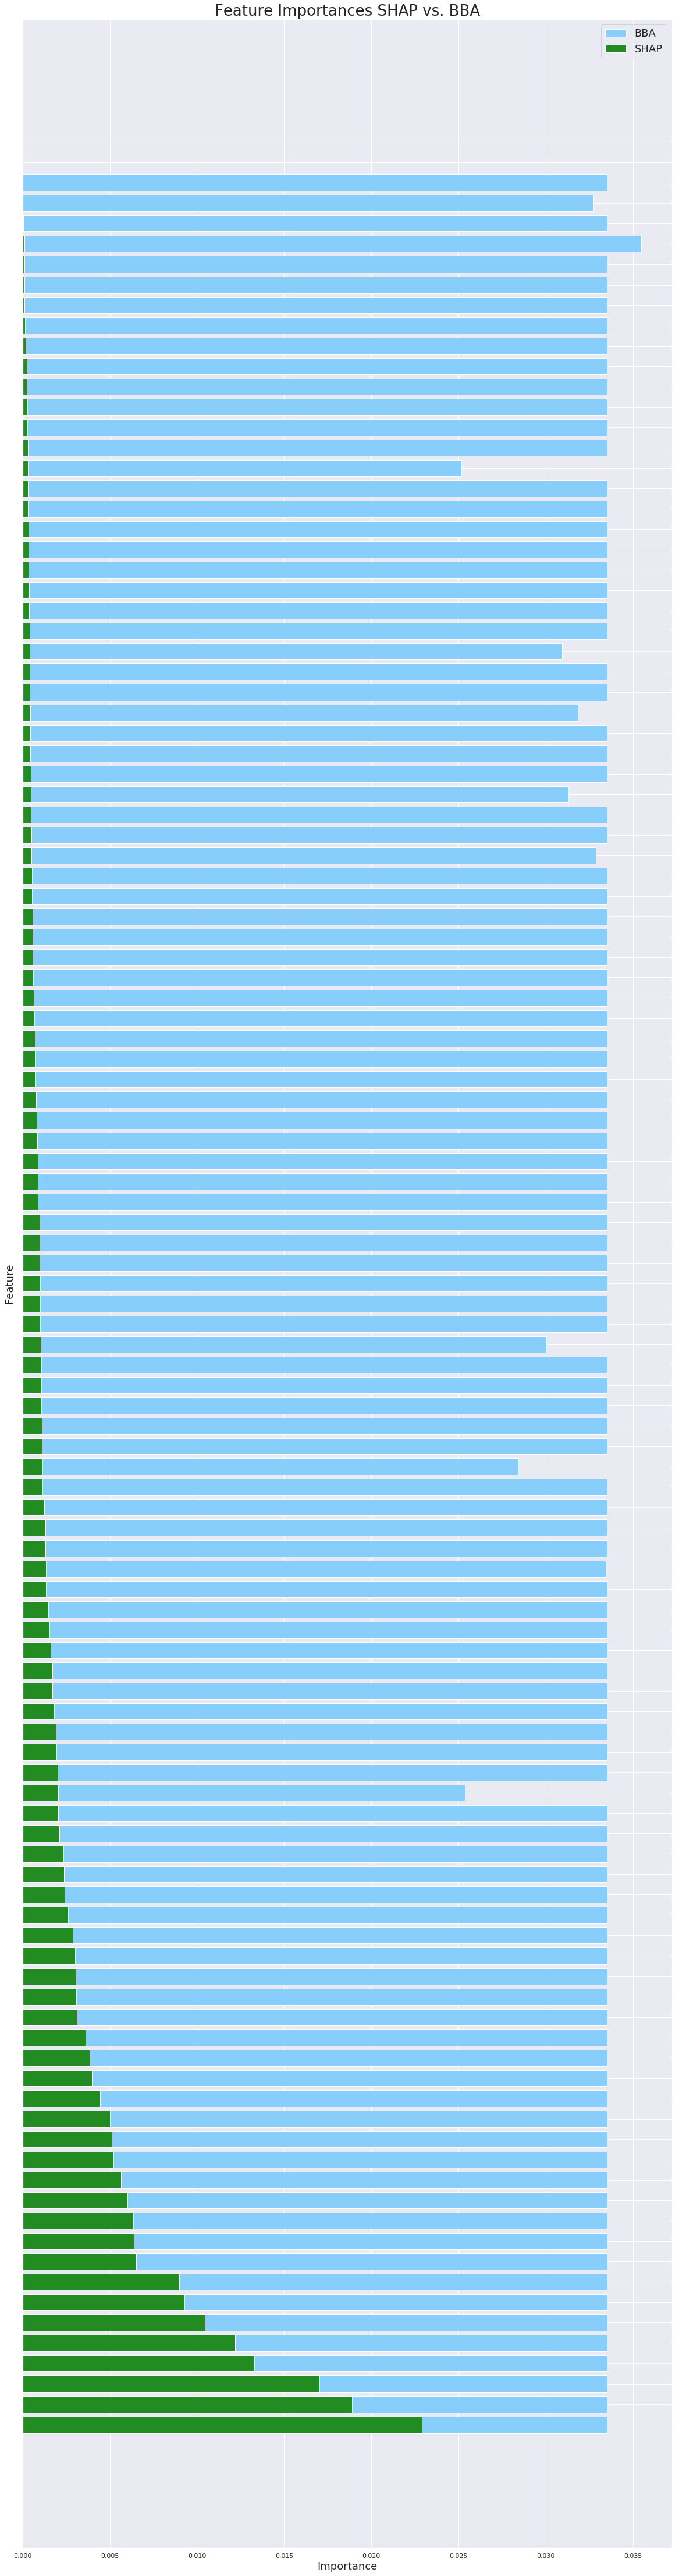

In [105]:
f, ax = plt.subplots(figsize=[20,80])
df = merged_dataframe[merged_dataframe['is_rosetta']==True].sort_values(by='Importance SHAP',ascending=False)
plt.barh(y=df['Feature'],width=df['Importance BBA'],color='lightskyblue',label='BBA')
plt.barh(y=df['Feature'],width=df['Importance SHAP'],color='forestgreen',label='SHAP')

plt.legend(fontsize='18')
ax.set_yticklabels(ax.get_yticklabels(),fontsize='16')
ax.set_title("Feature Importances SHAP vs. BBA",fontsize='26')
ax.set_ylabel('Feature', fontsize='18')
ax.set_xlabel('Importance',fontsize='18')
plt.show()

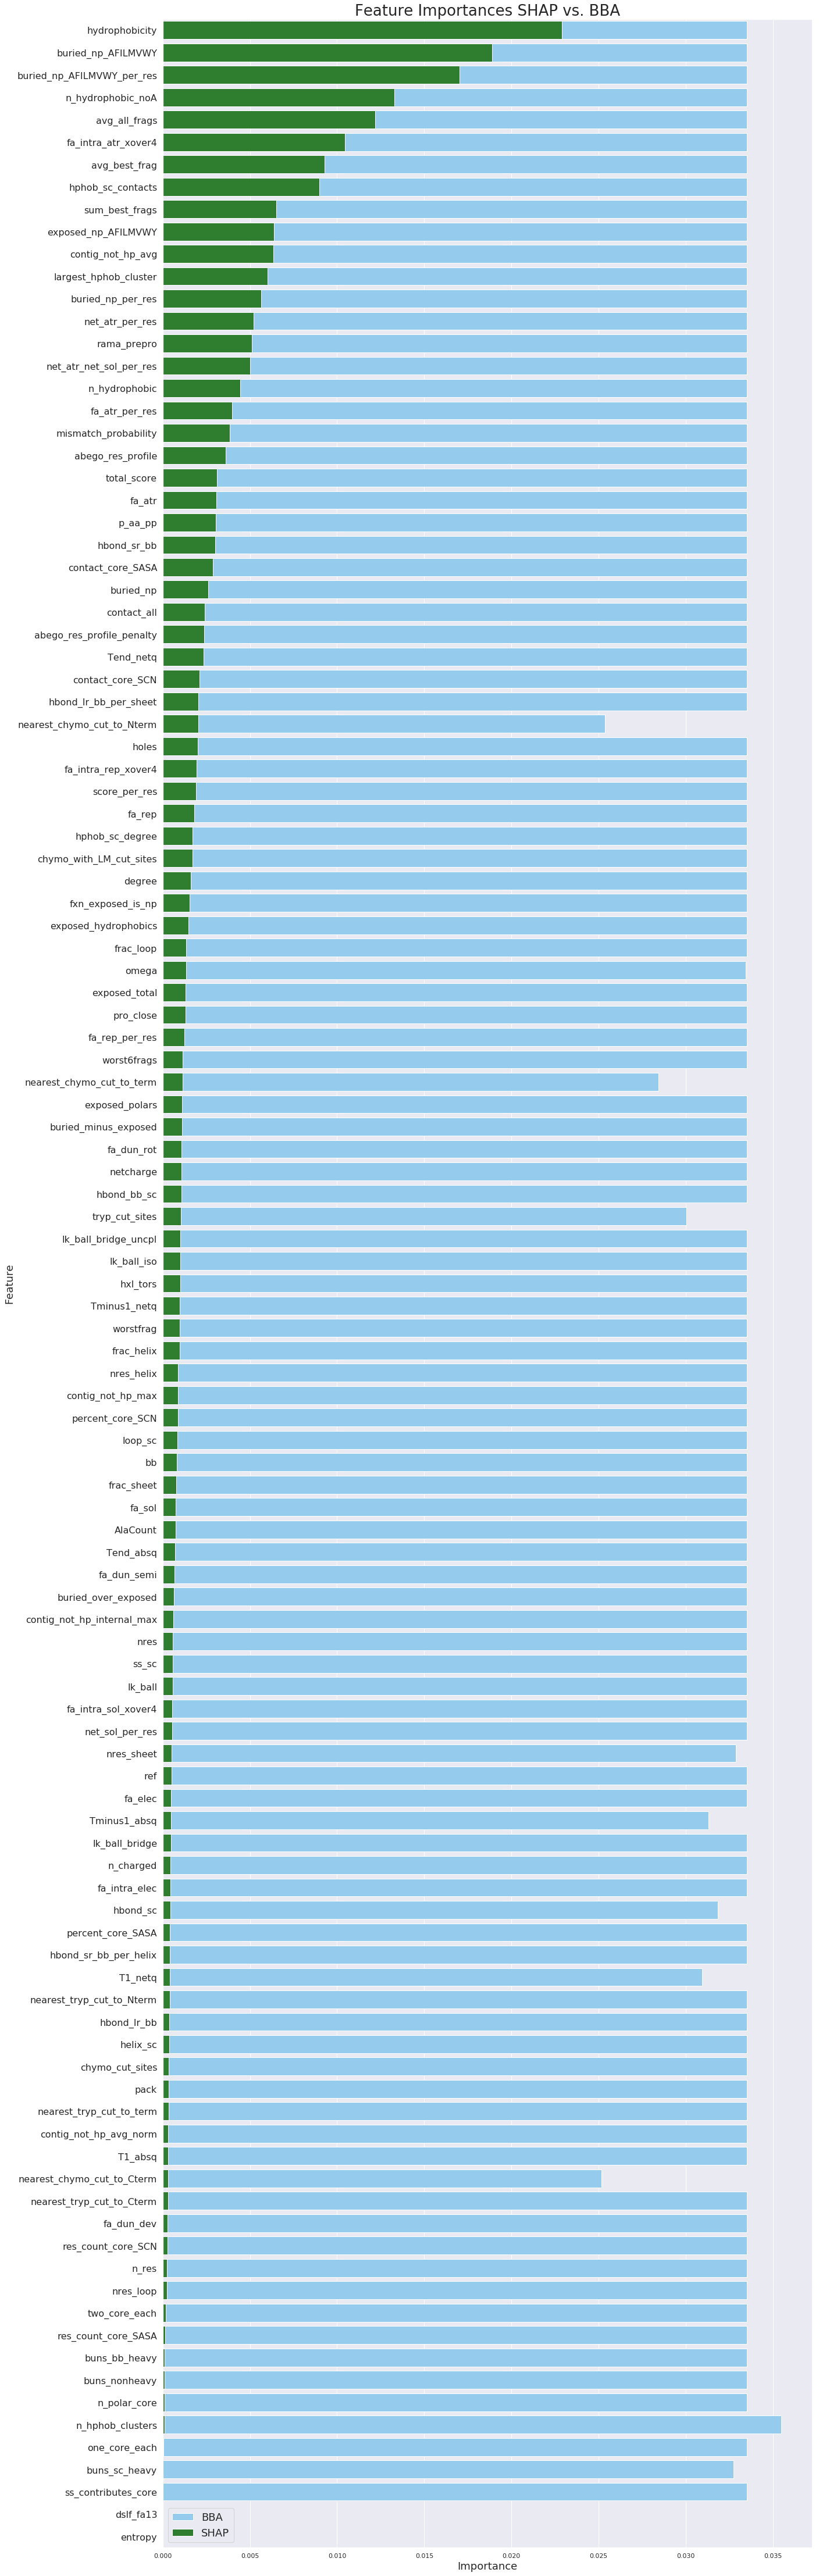

In [106]:
# sorted_shap = dataframe_shap.sort_values('Importance',ascending=False)
# sorted_bba = dataframe_bba.iloc[sorted_shap.index,:]


f, ax = plt.subplots(figsize=[20,80])

sns.barplot(data=merged_dataframe[merged_dataframe['is_rosetta']==True].sort_values(by='Importance SHAP',ascending=False), y='Feature',x='Importance BBA',color='lightskyblue',label='BBA')
sns.barplot(data=merged_dataframe[merged_dataframe['is_rosetta']==True].sort_values(by='Importance SHAP',ascending=False), y='Feature',x='Importance SHAP',color='forestgreen',label='SHAP')
#sns.barplot(x=sorted_bba['Importance'],y=sorted_bba['Feature'])

plt.legend(fontsize='18')
ax.set_yticklabels(ax.get_yticklabels(),fontsize='16')
ax.set_title("Feature Importances SHAP vs. BBA",fontsize='26')
ax.set_ylabel('Feature', fontsize='18')
ax.set_xlabel('Importance',fontsize='18')
plt.show()

## CLF Analysis similar to RGR analysis done below

In [107]:
audit_4h_clf = pd.read_csv('./estrada_runs/model_audits/4h/test_harness_results/runs/run_EQPgYkRE7XRD1/feature_importances.csv')
audit_betag_clf = pd.read_csv('./estrada_runs/model_audits/beta_grasp/test_harness_results/runs/run_66xNOEGmqrGGG/feature_importances.csv')
audit_coil_clf = pd.read_csv('./estrada_runs/model_audits/coil/test_harness_results/runs/run_5dpl1YPjv57v8/feature_importances.csv')
audit_EEHEE_clf = pd.read_csv('./estrada_runs/model_audits/EEHEE/test_harness_results/runs/run_ERpoEeAXRZ6XP/feature_importances.csv')
audit_EHEE_clf = pd.read_csv('./estrada_runs/model_audits/EHEE/test_harness_results/runs/run_QRNalPjE8wo69/feature_importances.csv')
audit_ferr_clf = pd.read_csv('./estrada_runs/model_audits/ferredoxin/test_harness_results/runs/run_66BdwjqxbgoLN/feature_importances.csv')
audit_fold2_clf = pd.read_csv('./estrada_runs/model_audits/fold2/test_harness_results/runs/run_aMQ1ZwmZyedOk/feature_importances.csv')
audit_fold4_clf = pd.read_csv('./estrada_runs/model_audits/fold4/test_harness_results/runs/run_ErE8XRYVro1Ae/feature_importances.csv')
audit_HEEH_clf = pd.read_csv('./estrada_runs/model_audits/HEEH/test_harness_results/runs/run_aAkGWBkpDAZDm/feature_importances.csv')
audit_HHH_clf = pd.read_csv('./estrada_runs/model_audits/HHH/test_harness_results/runs/run_6OJQOZBgO8k6N/feature_importances.csv')
audit_thio_clf = pd.read_csv('./estrada_runs/model_audits/thio/test_harness_results/runs/run_6bwd2RajVkr6q/feature_importances.csv')

audit_df_list = [
    audit_4h_clf,audit_betag_clf,audit_coil_clf,audit_EEHEE_clf,
    audit_EHEE_clf,audit_ferr_clf,audit_fold2_clf,audit_fold4_clf,
    audit_HEEH_clf,audit_HHH_clf,audit_thio_clf
]
audit_df_list_names = ['4h','beta_grasp','coil','EEHEE','EHEE','ferredoxin','fold2','fold4','HEEH','HHH','thio']

In [108]:
for i in range(len(audit_df_list)):
    print("Topology: %s"%audit_df_list_names[i])
    print(rank_features(audit_df_list[i],just_entropy=True))
    print("")

index = audit_df_list_names
data = []
for df in audit_df_list:
    data.append(get_count_percentiles_list(df))
    
summary_df = pd.DataFrame(data=data,index=index,columns=['35th','50th','75th','85th'])

summary_df

Topology: 4h


NameError: name 'rank_features' is not defined

In [ ]:
plt.close('all')
ax = summary_df.plot(kind='bar',facecolor='none',edgecolor='black')

sns.set_style('whitegrid')
ax.grid(False)
plt.xticks(rotation=0,fontsize='25')
plt.yticks(fontsize='15')
plt.ylabel('Number of features in given percentile',fontsize='25')
plt.title('Importance of entropy features for topology specific model per SHAP',fontsize='35')

bars = ax.patches


# Define some hatches
hatches = ['-', '\\', 'x',"*"]

blue_bars_inx = list(range(11))
orange_bars_inx = list(range(11,22))
green_bars_inx = list(range(22,33))
red_bars_inx = list(range(33,44))

inx_list = [blue_bars_inx,orange_bars_inx,green_bars_inx,red_bars_inx]

for i in range(len(inx_list)):
    hatch_type = hatches[i]
    for j in inx_list[i]:
        bars[j].set_hatch(hatch_type)
        
plt.legend(fontsize='18')

plt.show()


# REGRESSORS

In [ ]:
rgr_scores_names = ['R-Squared','RMSE']

In [ ]:
combined_data_rgr = pd.read_html('/home/jupyter/tacc-work/model_building/estrada_runs/leave_one_out_runs/test_harness_results/loo_detailed_regression_leaderboard.html')[0]
combined_data_rgr

In [ ]:
combined_data_rgr['Test Group'].value_counts()

In [ ]:
rgr_rs = combined_data_rgr[combined_data_rgr['Data and Split Description']=='RS']
rgr_r =  combined_data_rgr[combined_data_rgr['Data and Split Description']=='R']
rgr_s =  combined_data_rgr[combined_data_rgr['Data and Split Description']=='S']

In [ ]:
def leave_one_out_plot(dataframe):
#visualize trends in data


    rgr_rs = dataframe[dataframe['Data and Split Description']=='RS']
    rgr_r =  dataframe[dataframe['Data and Split Description']=='R']
    rgr_s =  dataframe[dataframe['Data and Split Description']=='S']

    # reduce rs dataframe to have same groups using Rosetta as the baseline
    sub_groups = rgr_s.sort_values(by='Samples In Test')['Test Group'].values #get subgroup that both have inx

    rgr_rs = rgr_rs[rgr_rs['Test Group'].isin(sub_groups)] #reduce df to subgroup
    rgr_r = rgr_r[rgr_r['Test Group'].isin(sub_groups)]
    # sort dataframes for plots



    rgr_rs = rgr_rs.sort_values(by='Samples In Test',ascending=False)
    rgr_r = rgr_r.sort_values(by='Samples In Test',ascending=False)
    rgr_s = rgr_s.sort_values(by='Samples In Test',ascending=False)

    for i in range(len(rgr_scores_names)):
            sns.set_style('white')

            fig,ax = plt.subplots()

            score_rs = rgr_rs[rgr_scores_names[i]].values
            score_r = rgr_r[rgr_scores_names[i]].values
            score_s = rgr_s[rgr_scores_names[i]].values

            sns.set(rc={'figure.figsize':(35,15)})


            sns.barplot(x=rgr_rs['Test Group'].values,y=rgr_rs['Samples In Test'],ax=ax,color='.75')
            sns.barplot(x=rgr_r['Test Group'].values,y=rgr_r['Samples In Test'],ax=ax,color='.75')
            sns.barplot(x=rgr_s['Test Group'].values,y=rgr_s['Samples In Test'],ax=ax,color='.75')
            ax2 = ax.twinx()


            sns.pointplot(x=rgr_rs['Test Group'].values,y=score_rs,color='blue',join=False,scale=2)
            sns.pointplot(x=rgr_r['Test Group'].values,y=score_r,color='orange',join=False,scale=2)
            sns.pointplot(x=rgr_s['Test Group'].values,y=score_s,color='green',join=False,scale=2)


            #ax2.legend(handles=ax2.collections, labels=["R+S","R","S"],prop={'size':'20'})
            ax2.legend(handles=ax2.collections, labels=["R+S","R"],prop={'size':'20'})

            plt.title("%s per left out group"%rgr_scores_names[i],fontsize=30)
            ax.set_xlabel("Topology Left Out",fontsize=22)
            ax.set_xticklabels(ax2.get_xticklabels(),rotation=90,fontsize=20)
            plt.ylabel("%s"%rgr_scores_names[i],fontsize=22)
            ax.set_ylabel("Samples in Test Group",fontsize=22)
            plt.show()
            #plt.close('all')

In [ ]:
leave_one_out_plot(combined_data_rgr)

## Topology Specific Runs

In [ ]:
rgr_top_leaderboard = pd.read_html("/home/jupyter/tacc-work/model_building/topology_specific_runs/test_harness_results/custom_regression_leaderboard.html")[0]
rgr_top_leaderboard

In [ ]:
rgr_top_leaderboard['topology'] = [i.split()[1] for i in rgr_top_leaderboard['Data and Split Description']]
rgr_top_leaderboard['model'] = [i.split()[0] for i in rgr_top_leaderboard['Data and Split Description']]

rgr_top_leaderboard['topology'].value_counts()

In [ ]:
top_4h_rgr = rgr_top_leaderboard[rgr_top_leaderboard['topology']=='4h']

top_ferredoxin_rgr = rgr_top_leaderboard[rgr_top_leaderboard['topology']=='ferredoxin']

top_HHH_rgr = rgr_top_leaderboard[rgr_top_leaderboard['topology']=='HHH']

top_EEHEE_rgr = rgr_top_leaderboard[rgr_top_leaderboard['topology']=='EEHEE']

top_EHEE_rgr = rgr_top_leaderboard[rgr_top_leaderboard['topology']=='EHEE']

top_HEEH_rgr = rgr_top_leaderboard[rgr_top_leaderboard['topology']=='HEEH']

top_beta_grasp_rgr = rgr_top_leaderboard[rgr_top_leaderboard['topology']=='beta_grasp']

top_fold2_rgr = rgr_top_leaderboard[rgr_top_leaderboard['topology']=='fold2']

top_coil_rgr = rgr_top_leaderboard[rgr_top_leaderboard['topology']=='coil']

top_thio_rgr = rgr_top_leaderboard[rgr_top_leaderboard['topology']=='thio']

top_fold4_rgr = rgr_top_leaderboard[rgr_top_leaderboard['topology']=='fold4']

topology_df_list_rgr = [top_4h_rgr,top_ferredoxin_rgr,top_HHH_rgr,top_EEHEE_rgr,top_EHEE_rgr,top_HEEH_rgr,top_beta_grasp_rgr,top_fold2_rgr,top_coil_rgr,top_thio_rgr,top_fold4_rgr]



df_topology_rgr = pd.concat(topology_df_list_rgr)

In [ ]:
boop = df_topology_rgr[df_topology_rgr['topology']=='ferredoxin']
boop_RS = boop[boop['model']=='RS']
boop_R = boop[boop['model']=='R']
boop_S = boop[boop['model']=='S']

print(boop_RS.describe())
print(boop_R.describe())
print(boop_S.describe())


In [ ]:
topology_specified_plot(df_topology,score_metric='clf')

In [ ]:
topology_specified_plot(df_topology_rgr,score_metric='rgr')

## Audits

given the improvement in `4h`,`ferredoxin`, `HHH`,`EEHEE`, `thio`, and `coil`,a SHAP audit was made on the models in order to see what they were learning from

In [ ]:
audit_4h_rgr = pd.read_csv('./estrada_runs/model_audits/4h/test_harness_results/runs/run_Ev8zVMd1zD3gM/feature_importances.csv')
audit_ferr_rgr = pd.read_csv('./estrada_runs/model_audits/ferredoxin/test_harness_results/runs/run_63jmGmzWwLxq/feature_importances.csv')
audit_HHH_rgr = pd.read_csv('./estrada_runs/model_audits/HHH/test_harness_results/runs/run_Q7jRowzx5zWV9/feature_importances.csv')
audit_EEHEE_rgr = pd.read_csv('./estrada_runs/model_audits/EEHEE/test_harness_results/runs/run_QzM3qpV72ogR3/feature_importances.csv')
audit_thio_rgr = pd.read_csv('./estrada_runs/model_audits/thio/test_harness_results/runs/run_am1OmbQd3YQwd/feature_importances.csv')
audit_coil_rgr = pd.read_csv('./estrada_runs/model_audits/coil/test_harness_results/runs/run_Q77XPPX86LGgq/feature_importances.csv')

audit_df_list = [audit_4h_rgr,audit_EEHEE_rgr,audit_HHH_rgr,audit_coil_rgr,audit_ferr_rgr,audit_thio_rgr]
audit_df_list_names = ['4h','EEHEE','HHH','coil','ferredoxin','thio']

In [ ]:
def rank_features(audit_df,just_entropy=False):
    df = audit_df.copy()
    if just_entropy:
        return df[df['Feature'].isin(entropy_features)]
    df['Importance'] = df['Importance'].round(3)
    return df
    

In [ ]:
for i in range(len(audit_df_list)):
    print("Topology: %s"%audit_df_list_names[i])
    print(rank_features(audit_df_list[i],just_entropy=True))
    print("")

In [ ]:
index = audit_df_list_names
data = []
for df in audit_df_list:
    data.append(get_count_percentiles_list(df))
    
summary_df = pd.DataFrame(data=data,index=index,columns=['35th','50th','75th','85th'])

In [ ]:
summary_df

In [ ]:
plt.subplots()
for i in range(len(summary_df)):
    sub = summary_df.iloc[i,:]
    plt.scatter(x=sub.index,y=sub.values,s=200,label=audit_df_list_names[i])
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xlabel('Percentile',fontsize='25')
plt.ylabel('Number of entropy features in percentile',fontsize='25')
plt.title('Really cool Title for this plot.',fontsize='40')
plt.legend(fontsize='15')
plt.ylim((.5,16))
plt.show()


In [ ]:
plt.close('all')
ax = summary_df.plot(kind='bar',facecolor='none',edgecolor='black')

sns.set_style('whitegrid')
ax.grid(False)
plt.xticks(rotation=0,fontsize='25')
plt.yticks(fontsize='15')
plt.ylabel('Number of features in given percentile',fontsize='25')
plt.title('Importance of entropy features for topology specific model per SHAP',fontsize='35')

bars = ax.patches


# Define some hatches
hatches = ['-', '\\', 'x',"*"]

blue_bars_inx = list(range(6))
orange_bars_inx = list(range(6,12))
green_bars_inx = list(range(12,18))
red_bars_inx = list(range(18,24))

inx_list = [blue_bars_inx,orange_bars_inx,green_bars_inx,red_bars_inx]

for i in range(len(inx_list)):
    hatch_type = hatches[i]
    for j in inx_list[i]:
        bars[j].set_hatch(hatch_type)
        
plt.legend(fontsize='18')

plt.show()

### Make the dictionary for the Feature Subset Runs

In [ ]:
topology_list = ['4h','EEHEE', 'HHH', 'coil', 'ferredoxin', 'thio']
    
    
topology_spc_features_dict = {}
topology_ros_features_dict = {}


In [ ]:
for i in range(len(audit_df_list)):

    df = audit_df_list[i]
    top = audit_df_list_names[i]

    top10_entropy = list(df[df['Feature'].isin(entropy_features)]['Feature'][:10])
    top10_rosetta = list(df[df['Feature'].isin(rosetta_features)]['Feature'][:10])

    topology_spc_features_dict[top] = top10_entropy
    topology_ros_features_dict[top] = top10_rosetta

In [ ]:
print(topology_ros_features_dict)

### Results for Feature Subset Runs

In [ ]:
fsr_results = pd.read_html('./estrada_runs/hamed_suggestion/test_harness_results/custom_regression_leaderboard.html')[0]

In [ ]:
fsr_results['topology'] = [i.split()[1] for i in fsr_results['Data and Split Description']]
fsr_results['model'] = [i.split()[0] for i in fsr_results['Data and Split Description']]

fsr_results['topology'].value_counts()


fsr_4h_rgr = fsr_results[fsr_results['topology']=='4h']

fsr_ferredoxin_rgr = fsr_results[fsr_results['topology']=='ferredoxin']

fsr_HHH_rgr = fsr_results[fsr_results['topology']=='HHH']

fsr_EEHEE_rgr = fsr_results[fsr_results['topology']=='EEHEE']

fsr_EHEE_rgr = fsr_results[fsr_results['topology']=='EHEE']

fsr_HEEH_rgr = fsr_results[fsr_results['topology']=='HEEH']

fsr_beta_grasp_rgr = fsr_results[fsr_results['topology']=='beta_grasp']

fsr_fold2_rgr = fsr_results[fsr_results['topology']=='fold2']

fsr_coil_rgr = fsr_results[fsr_results['topology']=='coil']

fsr_thio_rgr = fsr_results[fsr_results['topology']=='thio']

fsr_fold4_rgr = fsr_results[fsr_results['topology']=='fold4']

fsr_topology_df_list_rgr = [fsr_4h_rgr,fsr_ferredoxin_rgr,fsr_HHH_rgr,fsr_EEHEE_rgr,fsr_EHEE_rgr,fsr_HEEH_rgr,fsr_beta_grasp_rgr,fsr_fold2_rgr,fsr_coil_rgr,fsr_thio_rgr,fsr_fold4_rgr]



fsr_df_topology_rgr = pd.concat(fsr_topology_df_list_rgr)

In [ ]:
topology_specified_plot(fsr_df_topology_rgr,'rgr')

In [ ]:
for i in range(len(topology_list)):
    top = topology_list[i]
    
    df = fsr_df_topology_rgr[fsr_df_topology_rgr['topology']==top]
    df_rs = df[df['model']=='RS']
    df_r = df[df['model']== 'R']
    df_s = df[df['model']== 'S']
    print("Topology: %s"%top)
    print("\t RS:")
    print(df_rs.describe().iloc[1:3,:2])
    
    print('\t R:')
    print(df_r.describe().iloc[1:3,:2])
    
    print('\t S:')
    print(df_s.describe().iloc[1:3,:2])
    print('')
    

In [ ]:
fsr_df_topology_rgr['topology'].value_counts()

# Generalized Model Results

In [ ]:
genModel_results = pd.read_html("./estrada_runs/generalized_model_runs/test_harness_results/custom_regression_leaderboard.html")[0]

In [ ]:
genModel_results['Data and Split Description'].value_counts()

In [ ]:
genModel_rs = genModel_results[genModel_results['Data and Split Description']=='RS']
genModel_r = genModel_results[genModel_results['Data and Split Description']=='R']
genModel_s = genModel_results[genModel_results['Data and Split Description']=='S']

In [ ]:
print("\t RS:")
print(genModel_rs.describe().iloc[1:3,:2])

print('\t R:')
print(genModel_r.describe().iloc[1:3,:2])

print('\t S:')
print(genModel_s.describe().iloc[1:3,:2])
print('')



In [ ]:
f,ax = plt.subplots(figsize=[10,10])
sns.pointplot(x=['RS']*len(genModel_rs['R-Squared'].values),y=genModel_rs['R-Squared'].values,join=False,color='blue')
sns.pointplot(x=['R']*len(genModel_r['R-Squared'].values),y=genModel_r['R-Squared'].values,join=False,color='orange')
plt.title("R-Squared of Random Forest Regressor Across 35 Iterations",fontsize='23')
plt.xlabel("Average across 35 Iterations",fontsize='18')
plt.ylabel("R-Squared",fontsize='18')
plt.legend(ax.collections,['RS','R'],fontsize='18')
plt.show()

In [ ]:
f,ax = plt.subplots(figsize=[10,10])
sns.pointplot(x=['RS']*len(genModel_rs['RMSE'].values),y=genModel_rs['RMSE'].values,join=False,color='blue')
sns.pointplot(x=['R']*len(genModel_r['RMSE'].values),y=genModel_r['RMSE'].values,join=False,color='orange')
plt.title("RMSE of Random Forest Regressor Across 35 Iterations",fontsize='23')
plt.xlabel("Average across 35 Iterations",fontsize='18')
plt.ylabel("RMSE",fontsize='18')
plt.legend(ax.collections,['RS','R'],fontsize='18')
plt.show()

##  Audits

In [ ]:
genModel_shap = pd.read_csv('/home/jupyter/tacc-work/model_building/estrada_runs/generalized_model_runs/test_harness_results/runs/run_6EwEv3oNkXgJ/feature_importances.csv')

In [ ]:
genModel_shap['is_rosetta'] = genModel_shap['Feature'].isin(rosetta_features)

In [ ]:
genModel_shap[genModel_shap['is_rosetta']==False]